## Overview

This notebook provides a comprehensive demonstration of several baseline algorithms used in First-Price Auction (FPA) and VCG (Vickrey–Clarke–Groves) auction scenarios. We showcase both individual performances and comparative analyses of the following algorithms:

1. ALM
2. TA-PID
3. M-PID
4. Mystique
5. BROI

## Purpose

The main objectives of this notebook are:

1. To illustrate the implementation and behavior of each baseline algorithm
2. To compare the performance of these algorithms

Feel free to add your own bidding algorithms to our benchmark 😊


In [1]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2
    
import pandas as pd
import numpy as np
import optuna
import pickle
import matplotlib.pyplot as plt

from functools import partial

from simulator.simulation.modules import Campaign
from simulator.simulation.utils_visualization import data_prep_vis, plot_history_article
from simulator.simulation.simulate import simulate_campaign
from simulator.validation.check_results import autobidder_check

# import baselines:
from simulator.model.linear_bidder import LinearBidder
from simulator.model.ta_pid import TAPIDBidder
from simulator.model.m_pid import MPIDBidder
from simulator.model.mystique import Mystique
from simulator.model.broi_bidder import BROI
from simulator.model.traffic import Traffic
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

/Users/easolodneva/Documents/GitHub/RaRe/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [4]:
auction_mode = 'FPA' # you may also choose the 'VCG' mode

# data paths
campaigns_path = f"../../data/{auction_mode.lower()}/campaigns_{auction_mode.lower()}_filtered_train_final.csv"
stats_path = f"../data/{auction_mode.lower()}/stats_{auction_mode.lower()}_filtered_train_final.csv"

In [3]:
campaign_df = pd.read_csv(campaigns_path)
stats_df = pd.read_csv(stats_path)

FileNotFoundError: [Errno 2] No such file or directory: '../data/fpa/campaigns_fpa_filtered_train_final.csv'

In [4]:
campaign_df.sample(1)

,campaign_id,loc_id,item_id,campaign_start_date,campaign_start,campaign_end,auction_budget,microcat_ext,logical_category,region_id,campaign_end_date
254,72901483,645660,4513111600,1986-10-13,529563310,529649710,253.44,2278181,5.26,645530,1986-10-14


In [13]:
stats_df.sample(3)

,campaign_id,period,item_id,contact_price_bin,AuctionVisibilitySurplus,AuctionClicksSurplus,AuctionContactsSurplus,AuctionWinBidSurplus,CTRPredicts,CRPredicts,AuctionCount,platform_p
126869,72877167,529596000,4008114800,35.0,0.030091,0.009221,0.000642,1.58,0.097540,0.080451,4,[0.25 0. 0.25 0.5 ]
124026,72899633,529574400,4196985700,40.0,1.116506,0.081127,0.001886,33.38,0.014347,0.029946,19,NaN
138863,72808275,529603200,2728504400,27.0,0.043306,0.020747,0.005330,0.84,0.152496,0.296935,3,NaN


# One campaign's example

In [6]:
campaign_data = campaign_df.sample(1).iloc[0]
campaign_stats = stats_df[stats_df.campaign_id == campaign_data["campaign_id"]].copy()
print(campaign_data.shape, campaign_stats.shape)

(11,) (177, 11)


## Linear Bidder

In [19]:
campaign_example = Campaign(
    item_id= campaign_data['item_id'],
    campaign_id=int(campaign_data['campaign_id']),
    loc_id=int(campaign_data["loc_id"]),
    region_id=int(campaign_data["region_id"]),
    logical_category=campaign_data["logical_category"],
    microcat_ext=int(campaign_data["microcat_ext"]),
    campaign_start=int(campaign_data["campaign_start"]),
    campaign_end=int(campaign_data["campaign_end"]),
    initial_balance=campaign_data['auction_budget'],
    balance=campaign_data['auction_budget'],
    curr_time=int(campaign_data["campaign_start"]),
    prev_time=int(campaign_data["campaign_start"]),
    prev_balance=campaign_data['auction_budget'],
)
print("Budget ", campaign_data['auction_budget']) 
print("Length hours ", (campaign_data['campaign_end'] - campaign_data['campaign_start']) // 3600)

Budget  987.84
Length hours  24


In [20]:
simulation_history = simulate_campaign(
    campaign=campaign_example,
    bidder=LinearBidder(),
    stats_file=campaign_stats,
    auction_mode=auction_mode
)

In [21]:
df = simulation_history.to_data_frame()
viz_data_linear = data_prep_vis(df)
df.head(2)

AttributeError: 'DataFrame' object has no attribute 'spend'

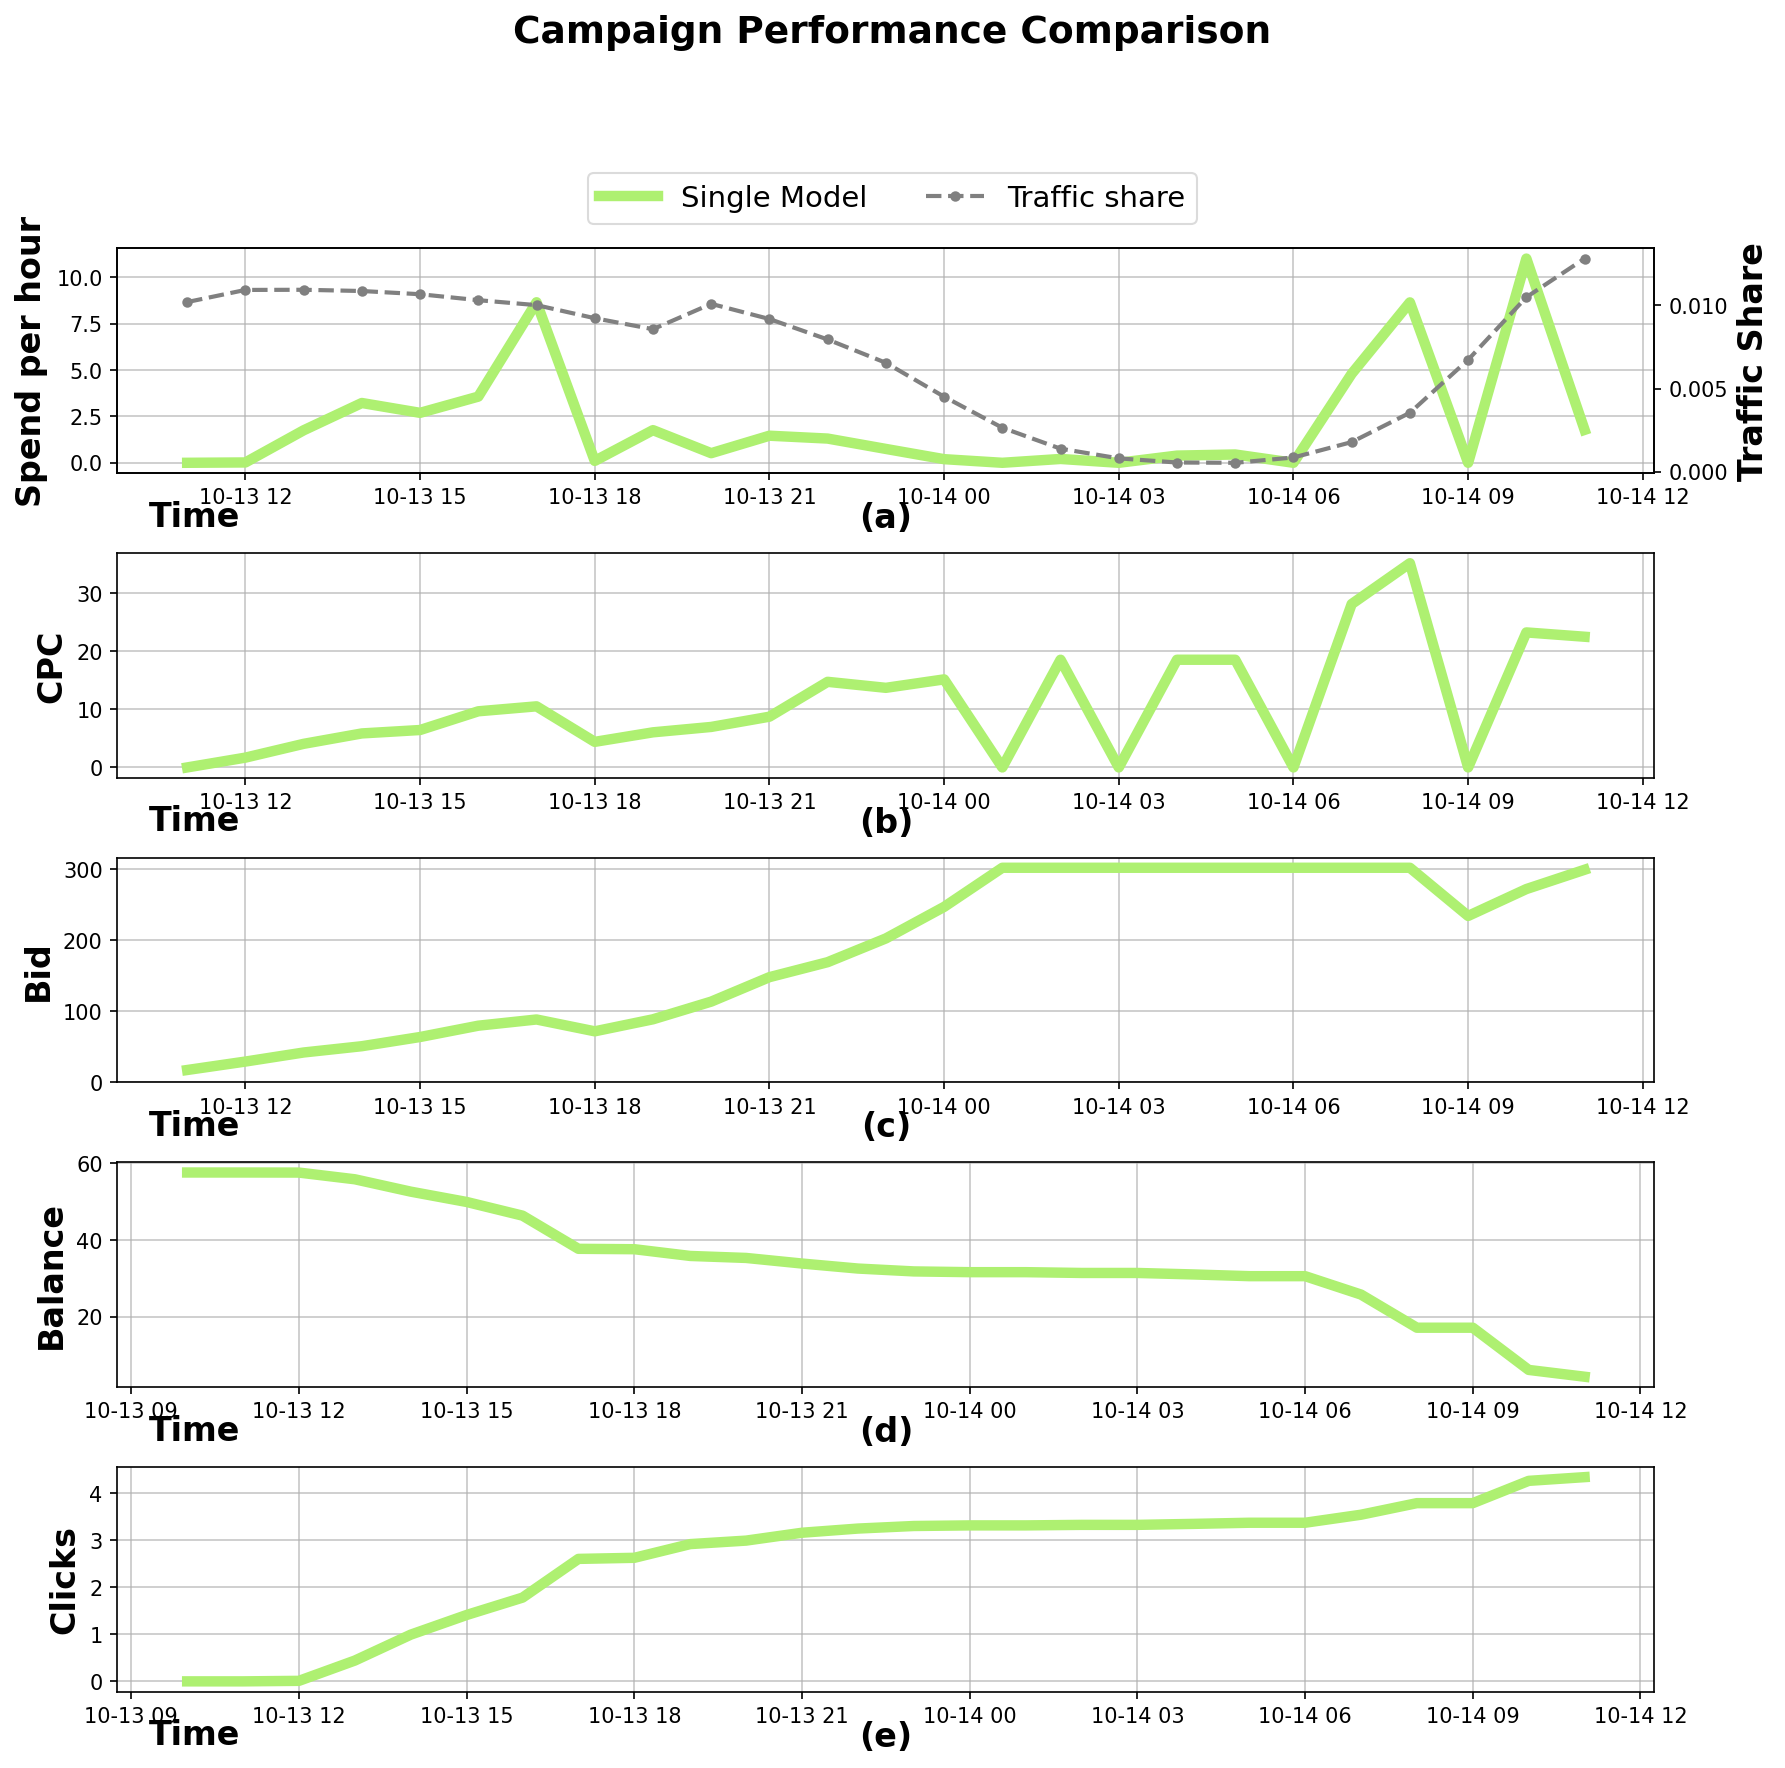

In [10]:
fig = plot_history_article(viz_data_linear)

#Slivkins

In [15]:
campaign_example = Campaign(
    item_id= campaign_data['item_id'],
    campaign_id=int(campaign_data['campaign_id']),
    loc_id=int(campaign_data["loc_id"]),
    region_id=int(campaign_data["region_id"]),
    logical_category=campaign_data["logical_category"],
    microcat_ext=int(campaign_data["microcat_ext"]),
    campaign_start=int(campaign_data["campaign_start"]),
    campaign_end=int(campaign_data["campaign_end"]),
    initial_balance=campaign_data['auction_budget'],
    balance=campaign_data['auction_budget'],
    curr_time=int(campaign_data["campaign_start"]),
    prev_time=int(campaign_data["campaign_start"]),
    prev_balance=campaign_data['auction_budget'],
)
print("Budget ", campaign_data['auction_budget']) 
print("Length hours ", (campaign_data['campaign_end'] - campaign_data['campaign_start']) // 3600)

Budget  987.84
Length hours  24


In [16]:
simulation_history = simulate_campaign(
    campaign=campaign_example,
    bidder=SlivkinsBidder(),
    stats_file=campaign_stats,
    auction_mode=auction_mode
)

In [17]:
df = simulation_history.to_data_frame()
viz_data_slivkins = data_prep_vis(df)
df.head(2)

/Users/aikhiryanova/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AttributeError: 'DataFrame' object has no attribute 'spend'

In [18]:
fig = plot_history_article(viz_data_slivkins)

NameError: name 'viz_data_slivkins' is not defined

## TA-PID Bidder

In [152]:
# refreshing Campaign
campaign_example = Campaign(
    item_id=campaign_data['item_id'],
    campaign_id=int(campaign_data['campaign_id']),
    loc_id=int(campaign_data["loc_id"]),
    region_id=int(campaign_data["region_id"]),
    logical_category=campaign_data["logical_category"],
    microcat_ext=int(campaign_data["microcat_ext"]),
    campaign_start=int(campaign_data["campaign_start"]),
    campaign_end=int(campaign_data["campaign_end"]),
    initial_balance=campaign_data['auction_budget'],
    balance=campaign_data['auction_budget'],
    curr_time=int(campaign_data["campaign_start"]),
    prev_time=int(campaign_data["campaign_start"]),
    prev_balance=campaign_data['auction_budget'],
)
print("Budget ", campaign_data['auction_budget']) 
print("Length hours ", (campaign_data['campaign_end'] - campaign_data['campaign_start']) // 3600)

Budget  489.6
Length hours  24


In [153]:
simulation_history = simulate_campaign(
    campaign=campaign_example,
    bidder=TAPIDBidder(),
    stats_file=campaign_stats,
    auction_mode=auction_mode
)

In [154]:
df = simulation_history.to_data_frame()
viz_data_ta_pid = data_prep_vis(df)
df.head(2)

,curr_time,curr_timestamp,campaign_start_time,campaign_end_time,campaign_id,balance,initial_balance,clicks,contacts,bid,loc_id,region_id,logical_category,microcat_ext,prev_timestamp,desired_clicks,desired_time,spend,tr_share,tr_share_cs,price_bin,cpc
0,1986-10-13 10:00:00,529570800,529570357,529656757,72804227,489.600000,489.6,0.00000,0.00000,181.152,653240,653240,1.2,293,529567200,0,0,0.000000,0.006500,0.006500,28.517398,0.000000
1,1986-10-13 11:00:00,529574400,529570357,529656757,72804227,488.994892,489.6,0.07367,0.00334,181.152,653240,653240,1.2,293,529570800,0,0,0.605108,0.009438,0.015938,28.517398,8.213803


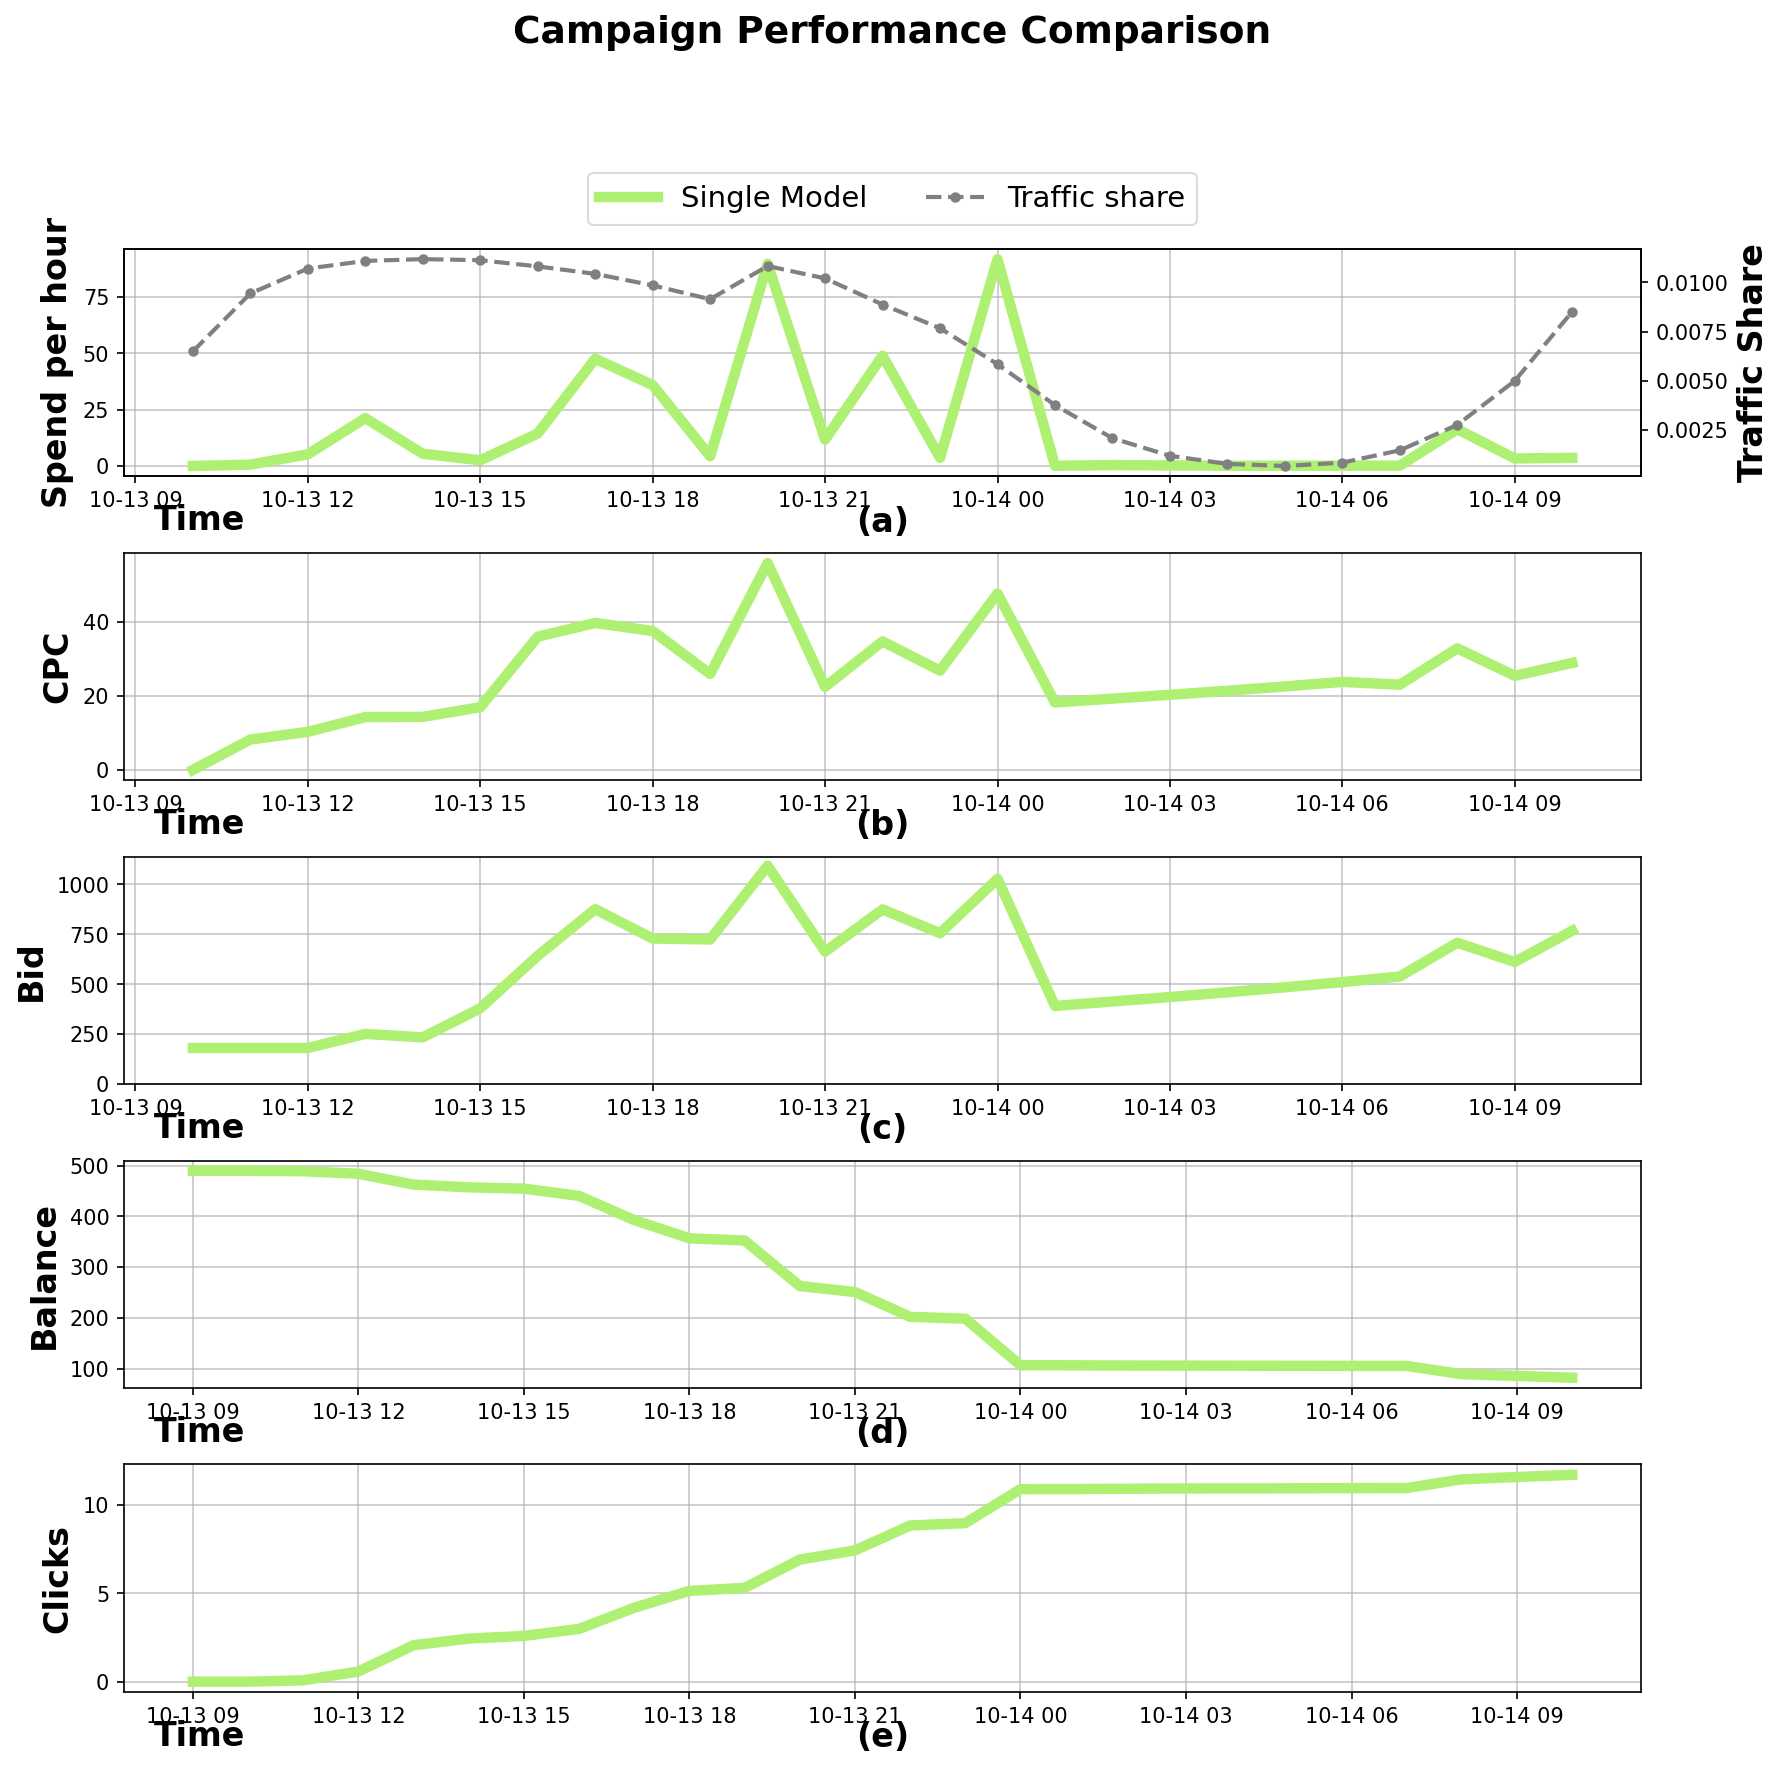

In [155]:
fig = plot_history_article(viz_data_ta_pid)

## M-PID Bidder

In [17]:
# refreshing Campaign
campaign_example = Campaign(
    item_id=campaign_data['item_id'],
    campaign_id=int(campaign_data['campaign_id']),
    loc_id=int(campaign_data["loc_id"]),
    region_id=int(campaign_data["region_id"]),
    logical_category=campaign_data["logical_category"],
    microcat_ext=int(campaign_data["microcat_ext"]),
    campaign_start=int(campaign_data["campaign_start"]),
    campaign_end=int(campaign_data["campaign_end"]),
    initial_balance=campaign_data['auction_budget'],
    balance=campaign_data['auction_budget'],
    curr_time=int(campaign_data["campaign_start"]),
    prev_time=int(campaign_data["campaign_start"]),
    prev_balance=campaign_data['auction_budget'],
)
print("Budget ", campaign_data['auction_budget']) 
print("Length hours ", (campaign_data['campaign_end'] - campaign_data['campaign_start']) // 3600)

Budget  163.2
Length hours  24


In [18]:
simulation_history = simulate_campaign(
    campaign=campaign_example,
    bidder=MPIDBidder(),
    stats_file=campaign_stats,
    auction_mode=auction_mode,
)

In [19]:
df = simulation_history.to_data_frame()
viz_data_m_pid = data_prep_vis(df)
df.head(10)

,curr_time,curr_timestamp,campaign_start_time,campaign_end_time,campaign_id,balance,initial_balance,clicks,contacts,bid,loc_id,region_id,logical_category,microcat_ext,prev_timestamp,desired_clicks,desired_time,spend,tr_share,tr_share_cs,price_bin,cpc
0,1986-10-13 12:00:00,529578000,529576733,529663133,73265286,163.004711,163.2,0.020400,0.000528,370.000000,653240,653240,1.1,799,529574400,0,0,0.195289,0.010700,0.010700,32.434470,9.573006
1,1986-10-13 13:00:00,529581600,529576733,529663133,73265286,161.786009,163.2,0.338639,0.007115,185.000000,653240,653240,1.1,799,529578000,0,0,1.218701,0.011088,0.021788,28.632686,3.829518
2,1986-10-13 14:00:00,529585200,529576733,529663133,73265286,160.402336,163.2,0.811756,0.017088,138.750000,653240,653240,1.1,799,529581600,0,0,1.383674,0.011179,0.032967,27.054803,2.924587
3,1986-10-13 15:00:00,529588800,529576733,529663133,73265286,159.845575,163.2,1.042620,0.021903,115.625000,653240,653240,1.1,799,529585200,0,0,0.556761,0.011124,0.044091,26.054803,2.411645
4,1986-10-13 16:00:00,529592400,529576733,529663133,73265286,159.001124,163.2,1.363998,0.030250,101.171875,653240,653240,1.1,799,529588800,0,0,0.844451,0.010810,0.054901,25.322408,2.627596
5,1986-10-13 17:00:00,529596000,529576733,529663133,73265286,158.867528,163.2,1.432219,0.031659,94.801381,653240,653240,1.1,799,529592400,0,0,0.133595,0.010431,0.065332,24.965693,1.958280
6,1986-10-13 18:00:00,529599600,529576733,529663133,73265286,158.391031,163.2,1.612222,0.036506,98.297112,653240,653240,1.1,799,529596000,0,0,0.476497,0.009849,0.075181,25.164302,2.647150
7,1986-10-13 19:00:00,529603200,529576733,529663133,73265286,158.244800,163.2,1.692220,0.038361,78.831812,653240,653240,1.1,799,529599600,0,0,0.146232,0.009145,0.084326,23.953923,1.827944
8,1986-10-13 20:00:00,529606800,529576733,529663133,73265286,157.873762,163.2,1.838606,0.042001,101.949948,653240,653240,1.1,799,529603200,0,0,0.371038,0.010829,0.095155,25.364428,2.534657
9,1986-10-13 21:00:00,529610400,529576733,529663133,73265286,157.540325,163.2,1.982246,0.045354,99.451553,653240,653240,1.1,799,529606800,0,0,0.333437,0.010202,0.105357,25.228342,2.321341


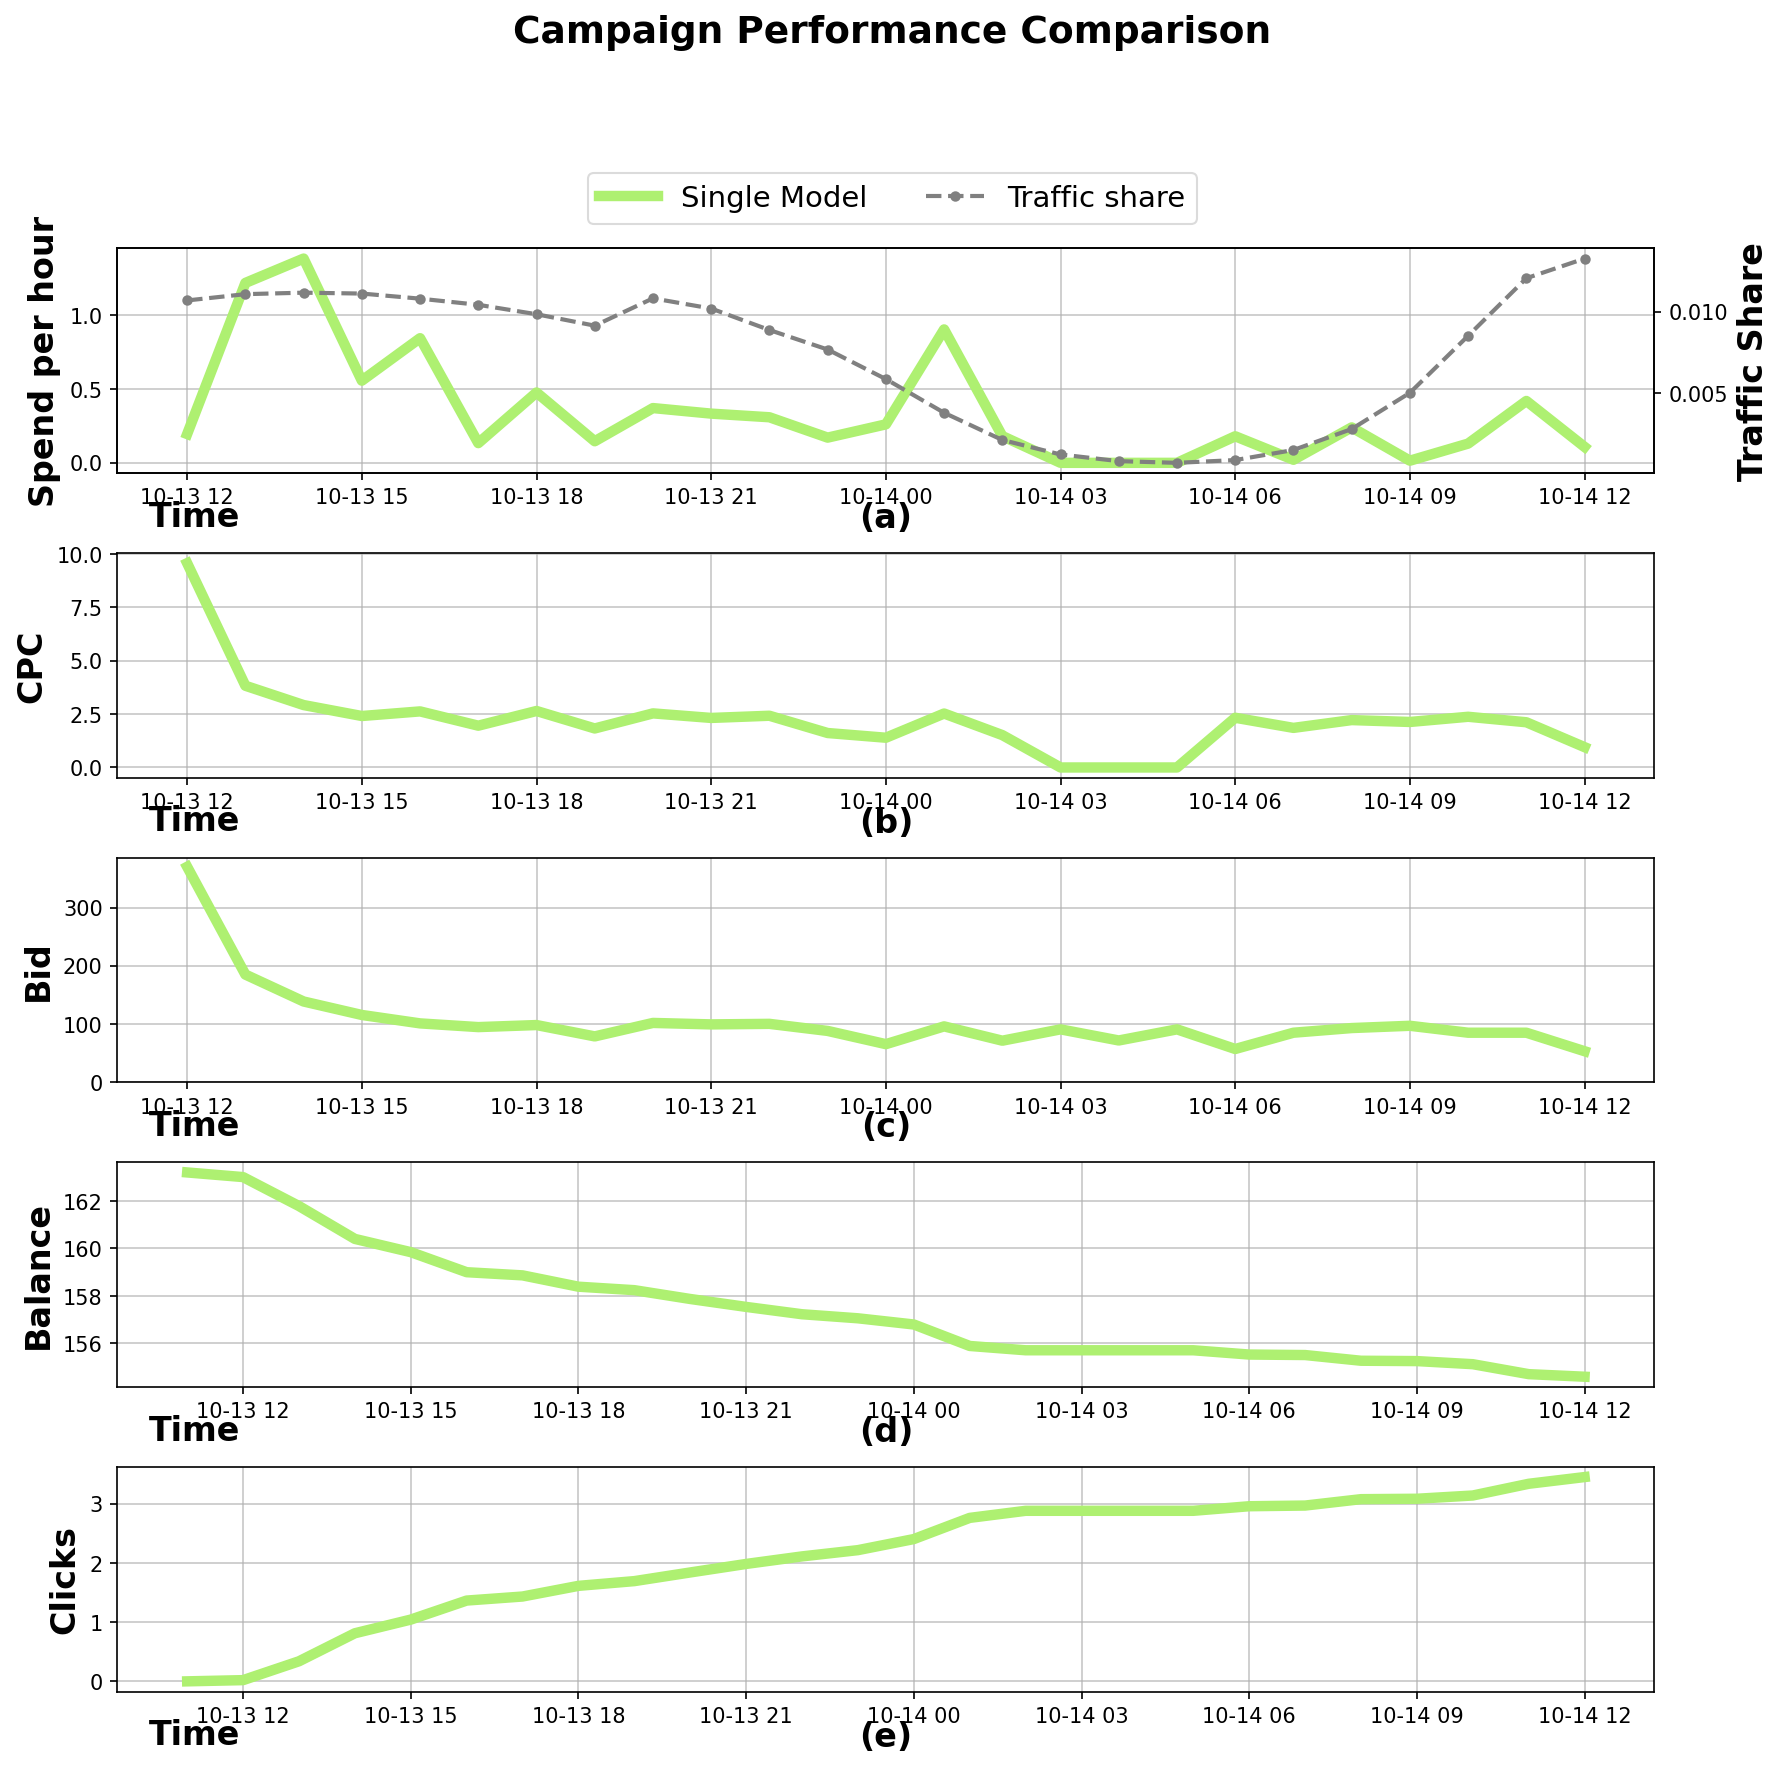

In [20]:
fig = plot_history_article(viz_data_m_pid)

In [ ]:
# refreshing Campaign
campaign_example = Campaign(
    item_id=campaign_data['item_id'],
    campaign_id=int(campaign_data['campaign_id']),
    loc_id=int(campaign_data["loc_id"]),
    region_id=int(campaign_data["region_id"]),
    logical_category=campaign_data["logical_category"],
    microcat_ext=int(campaign_data["microcat_ext"]),
    campaign_start=int(campaign_data["campaign_start"]),
    campaign_end=int(campaign_data["campaign_end"]),
    initial_balance=campaign_data['auction_budget'],
    balance=campaign_data['auction_budget'],
    curr_time=int(campaign_data["campaign_start"]),
    prev_time=int(campaign_data["campaign_start"]),
    prev_balance=campaign_data['auction_budget'],
)
print("Budget ", campaign_data['auction_budget']) 
print("Length hours ", (campaign_data['campaign_end'] - campaign_data['campaign_start']) // 3600)

In [12]:
simulation_history = simulate_campaign(
    campaign=campaign_example,
    bidder=SlivkinsBidder(),
    stats_file=campaign_stats,
    auction_mode=auction_mode,
)

In [14]:
df = simulation_history.to_data_frame()
viz_data_slivkins = data_prep_vis(df)
df.head(10)

/Users/aikhiryanova/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AttributeError: 'DataFrame' object has no attribute 'spend'

In [ ]:
fig = plot_history_article(viz_data_slivkins)

## You may also compare the performance of all the baselines:

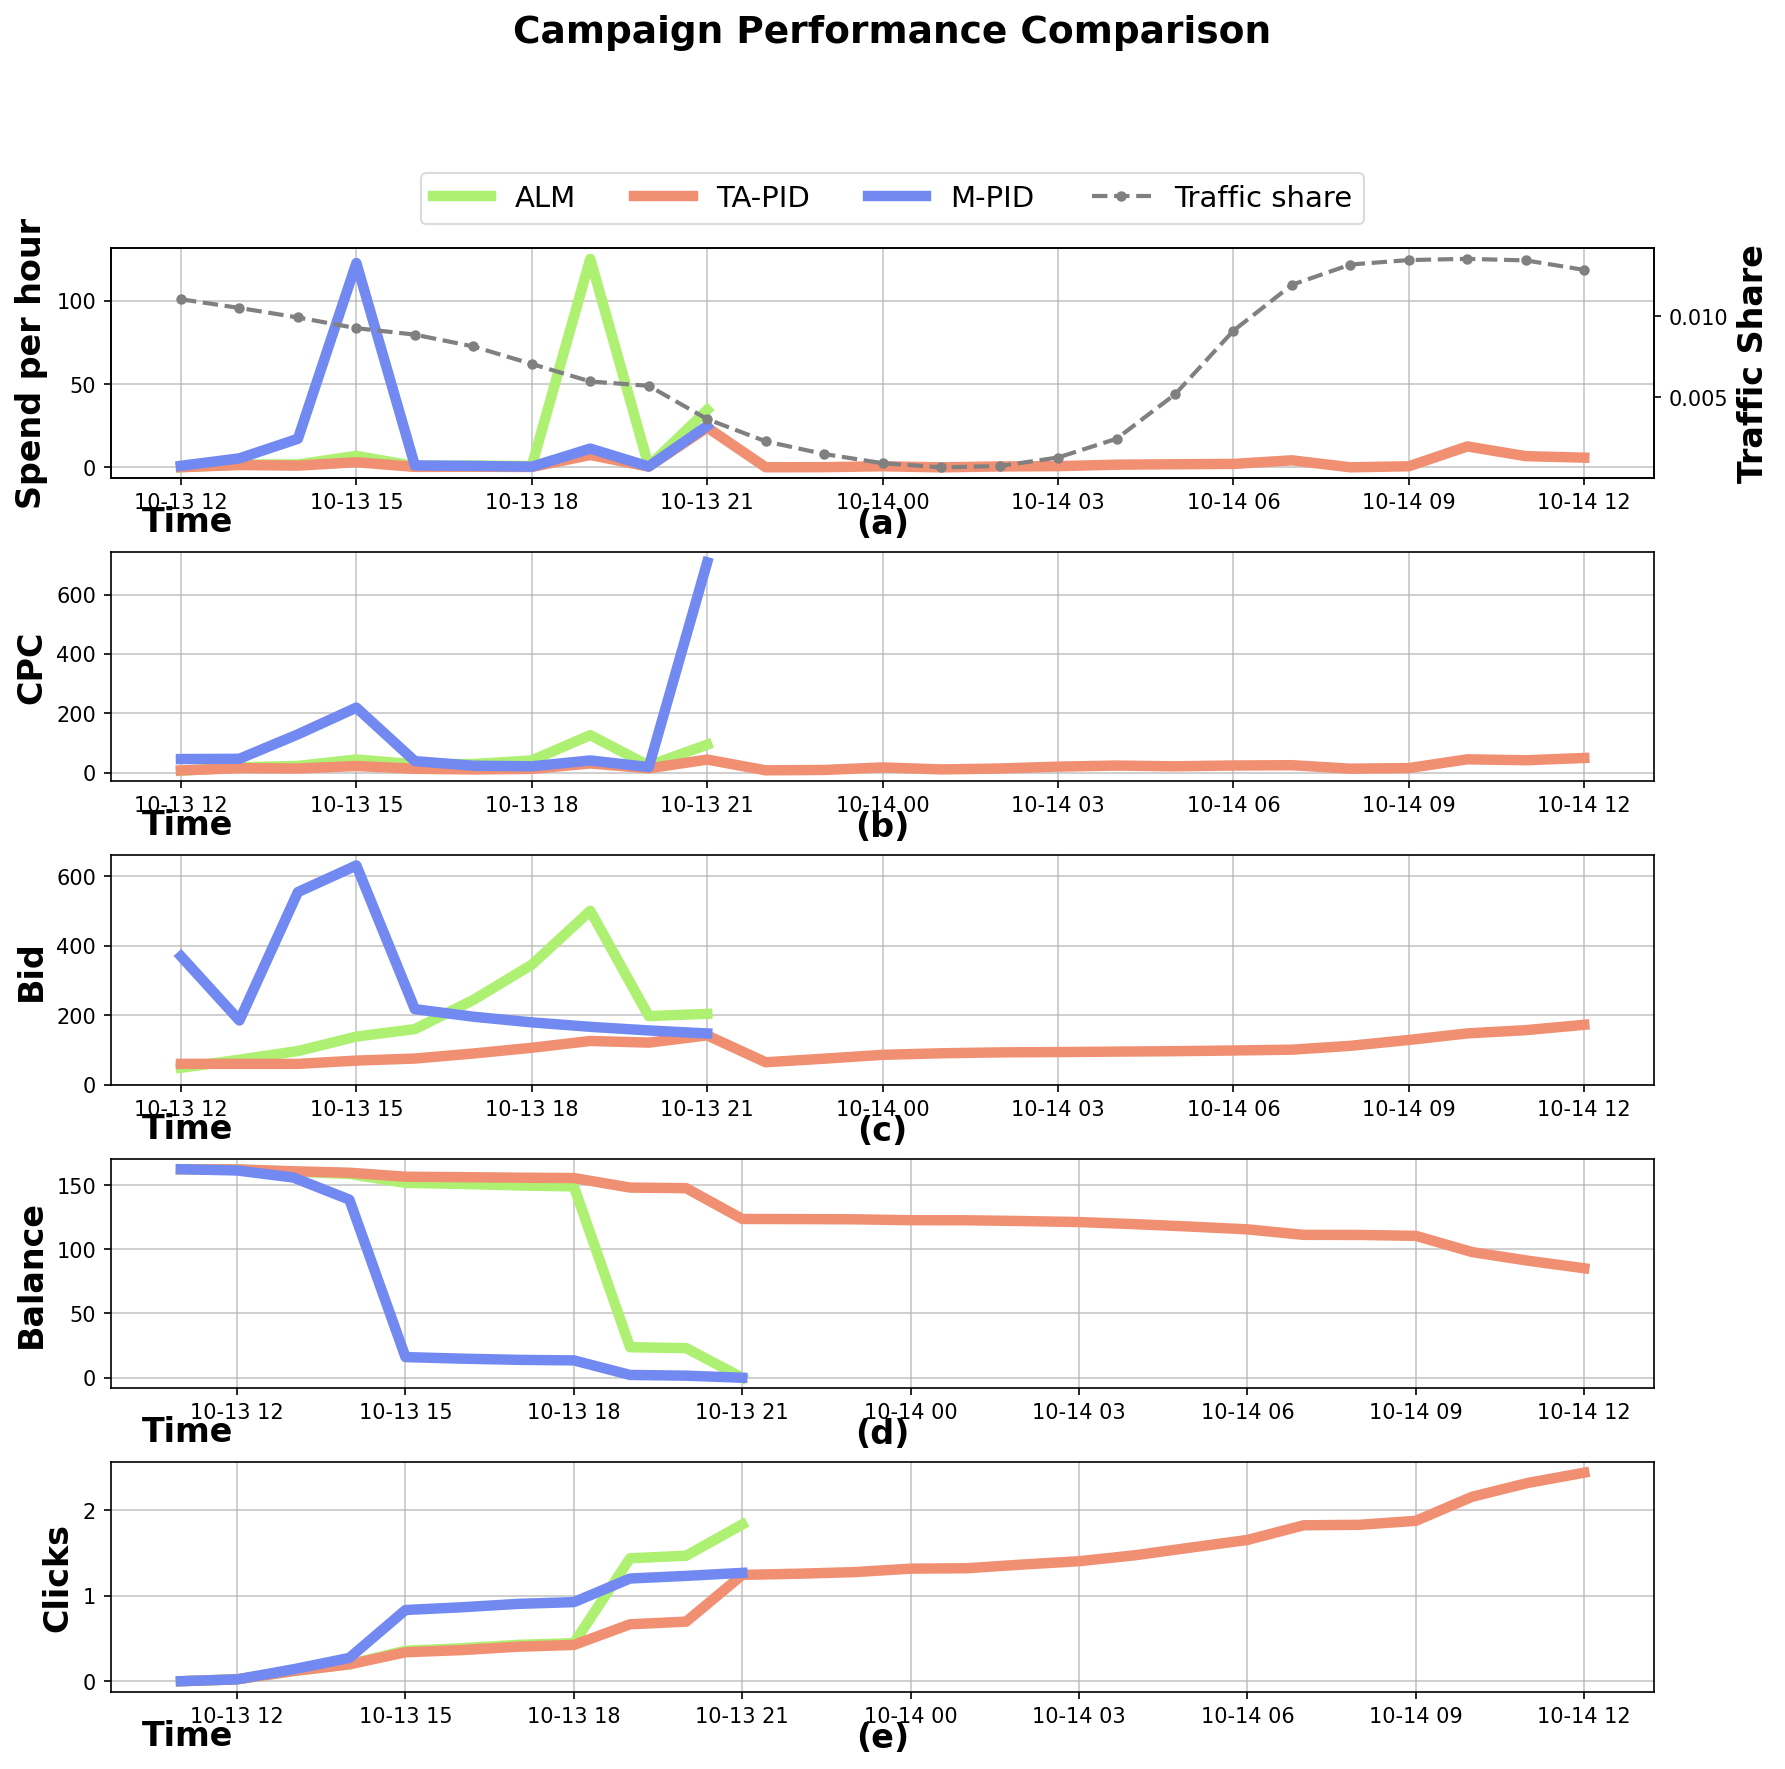

In [30]:
f = plot_history_article([viz_data_linear, viz_data_ta_pid, viz_data_m_pid], single_plot=False)

# Metrics

In [5]:
best_metrics = np.ones((3, 3)) * 100000

In [6]:
best_metrics

array([[100000., 100000., 100000.],
       [100000., 100000., 100000.],
       [100000., 100000., 100000.]])

### Mean 

## Linear Bidder

In [7]:
def objective_linear(trial, metric='RMSE_T', auction_mode='FPA'):
    coef = trial.suggest_float('coef', 0.001, 0.999, log=True) # Cold start coefficient
    lower_clip = trial.suggest_int('lower_clip', 1, 20, log=True)
    upper_clip = trial.suggest_int('upper_clip', 1, 20, log=True)
    factor = trial.suggest_float('factor', 1.1, 10.0, log=True)
   
    res = autobidder_check(
        bidder=LinearBidder,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            "cold_start_coef": coef,
            "lower_clip": lower_clip,
            "upper_clip": upper_clip,
            "factor": factor # slope
        },
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
      
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 

    
def opt_search_linear(n_trials=100, metric='RMSE_T', auction_mode='FPA'):
    # Create pruner
    pruner = optuna.pruners.MedianPruner(
        n_startup_trials=5,
        n_warmup_steps=10,
        interval_steps=1
    )

    # Create study with pruner
    study = optuna.create_study(
        direction='maximize' if (metric == 'MCR') else 'minimize',
        pruner=pruner
    )

    # Optimization
    study.optimize(
        partial(objective_linear, metric=metric, auction_mode=auction_mode),
        n_trials=n_trials,
        catch=(Exception,)
    )

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/linear_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [8]:
n = 1000
metric = 'RMSE_T' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_linear(n, metric, auction_mode)

[I 2024-10-31 16:34:48,658] A new study created in memory with name: no-name-885efa15-adc1-44dd-95cd-b7abf6e6690d
[I 2024-10-31 16:34:59,752] Trial 0 finished with value: 2.3990271320695054 and parameters: {'coef': 0.051087160070959654, 'lower_clip': 1, 'upper_clip': 19, 'factor': 5.757788401381393}. Best is trial 0 with value: 2.3990271320695054.


CPC_REL: 24.212268785141152, rmse: 2.3990271320695054, SCR: 5047.207533376468


[I 2024-10-31 16:35:14,650] Trial 1 finished with value: 1.4619794918002693 and parameters: {'coef': 0.006216288504709339, 'lower_clip': 7, 'upper_clip': 12, 'factor': 2.3549160901399624}. Best is trial 1 with value: 1.4619794918002693.


CPC_REL: 83.52972524455633, rmse: 1.4619794918002693, SCR: 4055.642286337693


[W 2024-10-31 16:35:16,549] Trial 2 failed with parameters: {'coef': 0.002466443463603678, 'lower_clip': 1, 'upper_clip': 2, 'factor': 6.462560889270315} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/aikhiryanova/.local/lib/python3.11/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/hn/_f12wh253y71417xnvbkht680000gn/T/ipykernel_54638/1150633028.py", line 7, in objective_linear
    res = autobidder_check(
          ^^^^^^^^^^^^^^^^^
  File "/Users/aikhiryanova/work/Avito/Autobidding/AutoBidding_23September/example_notebooks/../simulator/validation/check_results.py", line 42, in autobidder_check
    sim_hist = simulate_campaign(
               ^^^^^^^^^^^^^^^^^^
  File "/Users/aikhiryanova/work/Avito/Autobidding/AutoBidding_23September/example_notebooks/../simulator/simulation/simulate.py", line 109, in simulate_campaign
    bi

KeyboardInterrupt: 

In [8]:
n = 50
metric = 'CPC_REL' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_linear(n, metric, auction_mode)

[I 2024-10-13 14:10:47,444] A new study created in memory with name: no-name-64a1ee0b-a00a-4002-8e32-ef6b052197d7
[I 2024-10-13 14:10:51,317] Trial 0 finished with value: 6.386512985238791 and parameters: {'coef': 0.4890350825406485, 'lower_clip': 4, 'upper_clip': 3, 'factor': 2.0418778506808253}. Best is trial 0 with value: 6.386512985238791.


CPC_REL: 6.386512985238791, rmse: 2.380694604577022, SCR: 25074.283190585258


[I 2024-10-13 14:10:54,587] Trial 1 finished with value: 14.834506216723309 and parameters: {'coef': 0.5442383960332817, 'lower_clip': 4, 'upper_clip': 4, 'factor': 4.265970352068355}. Best is trial 0 with value: 6.386512985238791.


CPC_REL: 14.834506216723309, rmse: 38.867196298368825, SCR: 22235.292339274354


[I 2024-10-13 14:10:58,640] Trial 2 finished with value: 2.104364476451001 and parameters: {'coef': 0.39429420484419114, 'lower_clip': 3, 'upper_clip': 18, 'factor': 1.1517521844645182}. Best is trial 2 with value: 2.104364476451001.


CPC_REL: 2.104364476451001, rmse: 1.6589935624918746, SCR: 27096.860124663628


[I 2024-10-13 14:11:02,638] Trial 3 finished with value: 1.450796468142295 and parameters: {'coef': 0.24593096166238557, 'lower_clip': 3, 'upper_clip': 1, 'factor': 2.4988205223670654}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 1.450796468142295, rmse: 1.5427269863812416, SCR: 33144.108733313136


[I 2024-10-13 14:11:06,474] Trial 4 finished with value: 6.265792384499928 and parameters: {'coef': 0.13129986019980153, 'lower_clip': 18, 'upper_clip': 13, 'factor': 2.7428055646246157}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 6.265792384499928, rmse: 2.816266184933766, SCR: 23592.42857456551


[I 2024-10-13 14:11:10,106] Trial 5 finished with value: 6.90191996496608 and parameters: {'coef': 0.28555219031169465, 'lower_clip': 13, 'upper_clip': 6, 'factor': 2.663611151827683}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 6.90191996496608, rmse: 3.7442375391702667, SCR: 24489.697334204593


[I 2024-10-13 14:11:14,052] Trial 6 finished with value: 4.84614021001043 and parameters: {'coef': 0.1473471925221227, 'lower_clip': 1, 'upper_clip': 2, 'factor': 2.178813007965965}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 4.84614021001043, rmse: 2.106744246891327, SCR: 27922.96805527609


[I 2024-10-13 14:11:17,940] Trial 7 finished with value: 6.273299197968924 and parameters: {'coef': 0.4278729042749967, 'lower_clip': 2, 'upper_clip': 2, 'factor': 2.1057105262444566}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 6.273299197968924, rmse: 2.513139510155345, SCR: 23970.230739036073


[I 2024-10-13 14:11:21,849] Trial 8 finished with value: 5.220190651680326 and parameters: {'coef': 0.22692074266120446, 'lower_clip': 2, 'upper_clip': 4, 'factor': 1.9653715214143723}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 5.220190651680326, rmse: 1.8993993390333839, SCR: 22968.02963763193


[I 2024-10-13 14:11:25,044] Trial 9 finished with value: 14.029486121478763 and parameters: {'coef': 0.15464550401713903, 'lower_clip': 2, 'upper_clip': 4, 'factor': 4.178801742145346}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 14.029486121478763, rmse: 14.373240840804199, SCR: 17636.602941549347


[I 2024-10-13 14:11:29,061] Trial 10 finished with value: 3.926010239150044 and parameters: {'coef': 0.7886561938118196, 'lower_clip': 8, 'upper_clip': 1, 'factor': 1.4599750020689846}. Best is trial 3 with value: 1.450796468142295.


CPC_REL: 3.926010239150044, rmse: 1.8490823455980958, SCR: 28987.088044840137


[I 2024-10-13 14:11:33,074] Trial 11 finished with value: 1.3391146509932317 and parameters: {'coef': 0.21502736530368355, 'lower_clip': 1, 'upper_clip': 14, 'factor': 1.1042678974242306}. Best is trial 11 with value: 1.3391146509932317.


CPC_REL: 1.3391146509932317, rmse: 1.4076362070806607, SCR: 33080.12178723314


[I 2024-10-13 14:11:37,085] Trial 12 finished with value: 1.2771640761300012 and parameters: {'coef': 0.22170345104788625, 'lower_clip': 1, 'upper_clip': 1, 'factor': 3.1790465257205267}. Best is trial 12 with value: 1.2771640761300012.


CPC_REL: 1.2771640761300012, rmse: 1.5285884553471407, SCR: 32973.258058933374


[I 2024-10-13 14:11:40,539] Trial 13 finished with value: 14.034898209603597 and parameters: {'coef': 0.1930258581720726, 'lower_clip': 1, 'upper_clip': 9, 'factor': 3.332642665336517}. Best is trial 12 with value: 1.2771640761300012.


CPC_REL: 14.034898209603597, rmse: 3.1894482834820095, SCR: 20018.70965187127


[I 2024-10-13 14:11:44,621] Trial 14 finished with value: 0.6795623275806445 and parameters: {'coef': 0.10022509794583974, 'lower_clip': 1, 'upper_clip': 1, 'factor': 1.589319321744104}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 0.6795623275806445, rmse: 1.3209808906703444, SCR: 33096.189936684896


[I 2024-10-13 14:11:48,679] Trial 15 finished with value: 0.8377590699127476 and parameters: {'coef': 0.11011853585525488, 'lower_clip': 1, 'upper_clip': 1, 'factor': 1.6031156167149585}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 0.8377590699127476, rmse: 1.3335680358222812, SCR: 33130.73544915969


[I 2024-10-13 14:11:52,731] Trial 16 finished with value: 3.4964981748263413 and parameters: {'coef': 0.10160251310651035, 'lower_clip': 7, 'upper_clip': 2, 'factor': 1.5632581869228614}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 3.4964981748263413, rmse: 1.8485701457859613, SCR: 27067.74433995334


[I 2024-10-13 14:11:56,792] Trial 17 finished with value: 0.7232293816122559 and parameters: {'coef': 0.10498350809054963, 'lower_clip': 2, 'upper_clip': 1, 'factor': 1.6167637915576267}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 0.7232293816122559, rmse: 1.3210346343849495, SCR: 33108.43108900564


[I 2024-10-13 14:12:00,863] Trial 18 finished with value: 0.887799579244483 and parameters: {'coef': 0.1254479823928448, 'lower_clip': 2, 'upper_clip': 2, 'factor': 1.3829474288907604}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 0.887799579244483, rmse: 1.330901170490947, SCR: 33220.46101600628


[I 2024-10-13 14:12:04,873] Trial 19 finished with value: 1.1353680371109316 and parameters: {'coef': 0.16130518152080753, 'lower_clip': 6, 'upper_clip': 1, 'factor': 1.7378142449801892}. Best is trial 14 with value: 0.6795623275806445.


CPC_REL: 1.1353680371109316, rmse: 1.362758242387245, SCR: 33336.64026467387


[I 2024-10-13 14:12:08,902] Trial 20 finished with value: 0.6584356928907847 and parameters: {'coef': 0.10193522084506614, 'lower_clip': 2, 'upper_clip': 3, 'factor': 1.357061600475633}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.6584356928907847, rmse: 1.3195538925363415, SCR: 33093.50736841711


[I 2024-10-13 14:12:13,006] Trial 21 finished with value: 0.6701970345802907 and parameters: {'coef': 0.10213100395426447, 'lower_clip': 2, 'upper_clip': 3, 'factor': 1.2715316171142168}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.6701970345802907, rmse: 1.3194353638589986, SCR: 33095.9790258621


[I 2024-10-13 14:12:17,062] Trial 22 finished with value: 1.1820442870677863 and parameters: {'coef': 0.17236027188793093, 'lower_clip': 3, 'upper_clip': 6, 'factor': 1.2716652260504078}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 1.1820442870677863, rmse: 1.3619876496622247, SCR: 33330.5288083332


[I 2024-10-13 14:12:21,120] Trial 23 finished with value: 0.8924882858795794 and parameters: {'coef': 0.12674734592659778, 'lower_clip': 5, 'upper_clip': 3, 'factor': 1.2917250459644198}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8924882858795794, rmse: 1.3385662082889243, SCR: 33233.900545174816


[I 2024-10-13 14:12:25,070] Trial 24 finished with value: 3.715942378766001 and parameters: {'coef': 0.10062477573790987, 'lower_clip': 2, 'upper_clip': 6, 'factor': 1.7769673519443132}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 3.715942378766001, rmse: 1.9444737194131247, SCR: 27004.467031884273


[I 2024-10-13 14:12:29,103] Trial 25 finished with value: 0.9305052070409916 and parameters: {'coef': 0.13050991583171875, 'lower_clip': 10, 'upper_clip': 3, 'factor': 1.2540401160844763}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.9305052070409916, rmse: 1.3504843582327042, SCR: 33245.616210197695


[I 2024-10-13 14:12:33,135] Trial 26 finished with value: 0.8472755986857174 and parameters: {'coef': 0.11971544951411095, 'lower_clip': 4, 'upper_clip': 2, 'factor': 1.4209473111695148}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8472755986857174, rmse: 1.3264125741514385, SCR: 33201.85742803197


[I 2024-10-13 14:12:37,083] Trial 27 finished with value: 4.709006843949692 and parameters: {'coef': 0.18111809781379867, 'lower_clip': 3, 'upper_clip': 9, 'factor': 1.8511071741651097}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.709006843949692, rmse: 1.912177832156103, SCR: 23072.700772333552


[I 2024-10-13 14:12:41,112] Trial 28 finished with value: 1.0438281104867344 and parameters: {'coef': 0.1448330616519662, 'lower_clip': 1, 'upper_clip': 8, 'factor': 1.1623132693858775}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 1.0438281104867344, rmse: 1.3634457300955054, SCR: 33079.13031377718


[I 2024-10-13 14:12:44,211] Trial 29 finished with value: 15.080448452143278 and parameters: {'coef': 0.30604627712352717, 'lower_clip': 4, 'upper_clip': 5, 'factor': 4.909000245979333}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 15.080448452143278, rmse: 41.74469272915353, SCR: 21146.558310485776


[I 2024-10-13 14:12:48,183] Trial 30 finished with value: 3.487466951702445 and parameters: {'coef': 0.6041934858143448, 'lower_clip': 5, 'upper_clip': 3, 'factor': 1.4678351568470407}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 3.487466951702445, rmse: 1.703822959246078, SCR: 27789.426512315455


[I 2024-10-13 14:12:52,164] Trial 31 finished with value: 3.7569201720636918 and parameters: {'coef': 0.10894867228101125, 'lower_clip': 2, 'upper_clip': 2, 'factor': 1.6184343546737494}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 3.7569201720636918, rmse: 1.876340448848145, SCR: 27097.13386639553


[I 2024-10-13 14:12:56,188] Trial 32 finished with value: 0.8475744884215212 and parameters: {'coef': 0.11645973622338072, 'lower_clip': 2, 'upper_clip': 3, 'factor': 1.2934963269269817}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8475744884215212, rmse: 1.3270480946236969, SCR: 33151.89401913295


[I 2024-10-13 14:13:00,271] Trial 33 finished with value: 3.602386171378847 and parameters: {'coef': 0.1018265184467172, 'lower_clip': 3, 'upper_clip': 5, 'factor': 1.641636657328323}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 3.602386171378847, rmse: 1.8577781862738747, SCR: 27066.453504989477


[I 2024-10-13 14:13:04,234] Trial 34 finished with value: 4.441500148633585 and parameters: {'coef': 0.14101780776231615, 'lower_clip': 4, 'upper_clip': 4, 'factor': 1.9152915541869426}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.441500148633585, rmse: 2.0461208426201316, SCR: 27416.71530568495


[I 2024-10-13 14:13:08,270] Trial 35 finished with value: 0.8630971125639586 and parameters: {'coef': 0.11376398849526279, 'lower_clip': 3, 'upper_clip': 1, 'factor': 1.1907667931572172}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8630971125639586, rmse: 1.3313160830347912, SCR: 33132.48827878961


[I 2024-10-13 14:13:12,238] Trial 36 finished with value: 4.637737514965844 and parameters: {'coef': 0.13444343632937908, 'lower_clip': 2, 'upper_clip': 12, 'factor': 2.3531530013696993}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.637737514965844, rmse: 1.9882489193108084, SCR: 27629.296469537254


[I 2024-10-13 14:13:16,275] Trial 37 finished with value: 1.784919532901694 and parameters: {'coef': 0.33601313362640683, 'lower_clip': 3, 'upper_clip': 18, 'factor': 1.3606259196993389}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 1.784919532901694, rmse: 1.660939988397031, SCR: 26269.680413468202


[I 2024-10-13 14:13:20,259] Trial 38 finished with value: 4.286467036663368 and parameters: {'coef': 0.16032778735066677, 'lower_clip': 18, 'upper_clip': 5, 'factor': 1.531751194189659}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.286467036663368, rmse: 1.7330251592915722, SCR: 27596.45172905529


[I 2024-10-13 14:13:24,230] Trial 39 finished with value: 4.979925502508631 and parameters: {'coef': 0.19629376656404565, 'lower_clip': 4, 'upper_clip': 7, 'factor': 1.6963204581274118}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.979925502508631, rmse: 1.7791556125632857, SCR: 23100.600795553386


[I 2024-10-13 14:13:28,151] Trial 40 finished with value: 5.582722916659178 and parameters: {'coef': 0.2563518393962641, 'lower_clip': 5, 'upper_clip': 4, 'factor': 2.1675366024363694}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 5.582722916659178, rmse: 2.1165963082022685, SCR: 24019.390808189266


[I 2024-10-13 14:13:32,183] Trial 41 finished with value: 0.8379328660777644 and parameters: {'coef': 0.11097207836645723, 'lower_clip': 1, 'upper_clip': 1, 'factor': 1.5625352282165368}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8379328660777644, rmse: 1.3335542706425683, SCR: 33132.712365452004


[I 2024-10-13 14:13:36,178] Trial 42 finished with value: 0.849605384986343 and parameters: {'coef': 0.11331818803013524, 'lower_clip': 1, 'upper_clip': 2, 'factor': 1.3567079889880995}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.849605384986343, rmse: 1.3335906862531948, SCR: 33134.213025722805


[I 2024-10-13 14:13:40,220] Trial 43 finished with value: 0.664474990596099 and parameters: {'coef': 0.10021370225302619, 'lower_clip': 2, 'upper_clip': 1, 'factor': 1.9690628749241834}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.664474990596099, rmse: 1.3166034737933054, SCR: 33094.58122080458


[I 2024-10-13 14:13:44,280] Trial 44 finished with value: 0.8985854482360708 and parameters: {'coef': 0.12613927448679269, 'lower_clip': 2, 'upper_clip': 1, 'factor': 2.0825096671103305}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.8985854482360708, rmse: 1.3279454032240594, SCR: 33228.1867070638


[I 2024-10-13 14:13:48,248] Trial 45 finished with value: 3.8717439177157127 and parameters: {'coef': 0.10002451680233958, 'lower_clip': 2, 'upper_clip': 2, 'factor': 1.8203381230976234}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 3.8717439177157127, rmse: 1.8879526156854065, SCR: 27053.84537169562


[I 2024-10-13 14:13:51,984] Trial 46 finished with value: 7.005177728959363 and parameters: {'coef': 0.14682250217751078, 'lower_clip': 3, 'upper_clip': 3, 'factor': 2.6522313707200613}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 7.005177728959363, rmse: 3.26646228160331, SCR: 23745.855011055577


[I 2024-10-13 14:13:55,791] Trial 47 finished with value: 6.659728549268377 and parameters: {'coef': 0.5407245932046036, 'lower_clip': 2, 'upper_clip': 15, 'factor': 1.9511835636861146}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 6.659728549268377, rmse: 2.4952570066128827, SCR: 25376.54310656699


[I 2024-10-13 14:13:59,785] Trial 48 finished with value: 4.042077182517754 and parameters: {'coef': 0.11950717666309336, 'lower_clip': 15, 'upper_clip': 4, 'factor': 2.3232696947880993}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 4.042077182517754, rmse: 2.0120792041449804, SCR: 27515.55587495015


[I 2024-10-13 14:14:03,842] Trial 49 finished with value: 0.9499215857989737 and parameters: {'coef': 0.1347199302822189, 'lower_clip': 4, 'upper_clip': 10, 'factor': 1.1084441153621187}. Best is trial 20 with value: 0.6584356928907847.


CPC_REL: 0.9499215857989737, rmse: 1.3465015112667553, SCR: 33241.211802034806
Best trial:
  Value: 0.6584356928907847
  Params: 
    coef: 0.10193522084506614
    lower_clip: 2
    upper_clip: 3
    factor: 1.357061600475633


In [24]:
n = 50
metric = 'MCR' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_linear(n, metric, auction_mode)

[I 2024-10-13 18:19:48,454] A new study created in memory with name: no-name-ef3888c1-945e-424e-a6f7-bd93b4fa0399
[I 2024-10-13 18:20:01,691] Trial 0 finished with value: 82762.96100856931 and parameters: {'coef': 0.35455329546333936, 'lower_clip': 9, 'upper_clip': 1, 'factor': 3.891949900671268}. Best is trial 0 with value: 82762.96100856931.


CPC_REL: 28.68899447323971, rmse: 1.34631144477968, SCR: 82762.96100856931


[I 2024-10-13 18:20:14,830] Trial 1 finished with value: 83438.10705661192 and parameters: {'coef': 0.3360153223476196, 'lower_clip': 10, 'upper_clip': 2, 'factor': 4.660129949479602}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.32151103736423, rmse: 1.7229911307646162, SCR: 83438.10705661192


[I 2024-10-13 18:20:25,306] Trial 2 finished with value: 58126.61668280173 and parameters: {'coef': 0.31051412544657875, 'lower_clip': 1, 'upper_clip': 4, 'factor': 3.8149520360163476}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 27.175770720069735, rmse: 1.8738799178551704, SCR: 58126.61668280173


[I 2024-10-13 18:20:38,351] Trial 3 finished with value: 74341.08071963879 and parameters: {'coef': 0.35572186727380406, 'lower_clip': 16, 'upper_clip': 1, 'factor': 1.2842796160825278}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 27.540359826763925, rmse: 1.2763650512854081, SCR: 74341.08071963879


[I 2024-10-13 18:20:50,563] Trial 4 finished with value: 69867.11714447601 and parameters: {'coef': 0.42979894472689967, 'lower_clip': 3, 'upper_clip': 2, 'factor': 2.119167469576009}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.278134835100957, rmse: 1.5761966371331415, SCR: 69867.11714447601


[I 2024-10-13 18:21:03,672] Trial 5 finished with value: 79562.69327178091 and parameters: {'coef': 0.32535320779892674, 'lower_clip': 15, 'upper_clip': 4, 'factor': 1.5614032951919792}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 30.919190351639482, rmse: 1.3245976100403147, SCR: 79562.69327178091


[I 2024-10-13 18:21:15,639] Trial 6 finished with value: 61095.939026133485 and parameters: {'coef': 0.7760911408512717, 'lower_clip': 3, 'upper_clip': 1, 'factor': 4.406726365858606}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 28.927005066703078, rmse: 1.7501705175192188, SCR: 61095.939026133485


[I 2024-10-13 18:21:28,068] Trial 7 finished with value: 59494.850378848554 and parameters: {'coef': 0.6472848141406435, 'lower_clip': 8, 'upper_clip': 1, 'factor': 1.1229698599986642}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 27.67967483316861, rmse: 1.4930793294268776, SCR: 59494.850378848554


[I 2024-10-13 18:21:40,710] Trial 8 finished with value: 79427.16243624214 and parameters: {'coef': 0.52985793693001, 'lower_clip': 20, 'upper_clip': 4, 'factor': 2.0545577421211805}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.017299641477706, rmse: 1.607717995831901, SCR: 79427.16243624214


[I 2024-10-13 18:21:52,512] Trial 9 finished with value: 53088.467640659765 and parameters: {'coef': 0.5131712324386287, 'lower_clip': 1, 'upper_clip': 15, 'factor': 1.4672339483041208}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 27.56378126490007, rmse: 1.5382986310228006, SCR: 53088.467640659765


[I 2024-10-13 18:22:05,152] Trial 10 finished with value: 81066.35169446099 and parameters: {'coef': 0.15420889362584284, 'lower_clip': 6, 'upper_clip': 9, 'factor': 2.994068500922112}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.770044309676173, rmse: 1.6579355741657211, SCR: 81066.35169446099


[I 2024-10-13 18:22:17,947] Trial 11 finished with value: 81858.67891431806 and parameters: {'coef': 0.18081598845234342, 'lower_clip': 7, 'upper_clip': 2, 'factor': 4.994057601237194}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 30.694904104112634, rmse: 1.730662358182466, SCR: 81858.67891431806


[I 2024-10-13 18:22:30,692] Trial 12 finished with value: 80589.49241986024 and parameters: {'coef': 0.22417633026610745, 'lower_clip': 6, 'upper_clip': 2, 'factor': 3.2917368207202653}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 32.05604356911552, rmse: 1.6428801408248548, SCR: 80589.49241986024


[I 2024-10-13 18:22:43,572] Trial 13 finished with value: 79390.54676247555 and parameters: {'coef': 0.10833437938481782, 'lower_clip': 10, 'upper_clip': 2, 'factor': 3.1093394047406138}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.543436767981266, rmse: 1.655549801992903, SCR: 79390.54676247555


[I 2024-10-13 18:22:56,671] Trial 14 finished with value: 78574.92674744593 and parameters: {'coef': 0.2527597988474315, 'lower_clip': 2, 'upper_clip': 1, 'factor': 4.017995173831207}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 27.572117256298075, rmse: 1.3233689637226067, SCR: 78574.92674744593


[I 2024-10-13 18:23:09,471] Trial 15 finished with value: 81613.62846392457 and parameters: {'coef': 0.3950092958851978, 'lower_clip': 11, 'upper_clip': 3, 'factor': 2.6704886648266015}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 31.766751412186647, rmse: 1.6075125184336658, SCR: 81613.62846392457


[I 2024-10-13 18:23:21,438] Trial 16 finished with value: 81209.80785583383 and parameters: {'coef': 0.23112481105153712, 'lower_clip': 4, 'upper_clip': 7, 'factor': 4.826159021655874}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 29.472816790525634, rmse: 1.8211332014727486, SCR: 81209.80785583383


[I 2024-10-13 18:23:32,627] Trial 17 finished with value: 62542.931802554405 and parameters: {'coef': 0.47947743409123655, 'lower_clip': 2, 'upper_clip': 3, 'factor': 3.657929943917715}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 28.810080596344157, rmse: 1.8154888660341246, SCR: 62542.931802554405


[I 2024-10-13 18:23:44,128] Trial 18 finished with value: 58629.27674098962 and parameters: {'coef': 0.8849695534566512, 'lower_clip': 4, 'upper_clip': 8, 'factor': 2.438803426677949}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 29.296019212425627, rmse: 1.9821483232048467, SCR: 58629.27674098962


[I 2024-10-13 18:23:57,026] Trial 19 finished with value: 80439.21413425247 and parameters: {'coef': 0.17800940480153093, 'lower_clip': 11, 'upper_clip': 2, 'factor': 4.37914376223608}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 30.804792571361112, rmse: 1.725353280615372, SCR: 80439.21413425247


[I 2024-10-13 18:24:08,899] Trial 20 finished with value: 71500.3498414605 and parameters: {'coef': 0.6223385958115928, 'lower_clip': 5, 'upper_clip': 18, 'factor': 3.7074386307679186}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 28.97060646646086, rmse: 1.9190914396072258, SCR: 71500.3498414605


[I 2024-10-13 18:24:21,826] Trial 21 finished with value: 81882.69785338608 and parameters: {'coef': 0.14991069542205973, 'lower_clip': 8, 'upper_clip': 2, 'factor': 4.884796713436464}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 30.63599609360388, rmse: 1.7560282970447314, SCR: 81882.69785338608


[I 2024-10-13 18:24:35,238] Trial 22 finished with value: 77539.65992850631 and parameters: {'coef': 0.11084312756301329, 'lower_clip': 9, 'upper_clip': 1, 'factor': 4.410034293405259}. Best is trial 1 with value: 83438.10705661192.


CPC_REL: 22.62870329138762, rmse: 1.2379204451758463, SCR: 77539.65992850631


[I 2024-10-13 18:24:47,971] Trial 23 finished with value: 84135.25740716192 and parameters: {'coef': 0.2637187788832564, 'lower_clip': 12, 'upper_clip': 3, 'factor': 4.9677359659467015}. Best is trial 23 with value: 84135.25740716192.


CPC_REL: 30.2598658148689, rmse: 1.774407049888508, SCR: 84135.25740716192


[I 2024-10-13 18:25:00,921] Trial 24 finished with value: 82633.92295757367 and parameters: {'coef': 0.2694234932500692, 'lower_clip': 13, 'upper_clip': 5, 'factor': 3.5267250174778924}. Best is trial 23 with value: 84135.25740716192.


CPC_REL: 31.31190786758644, rmse: 1.6316282346346476, SCR: 82633.92295757367


[I 2024-10-13 18:25:13,842] Trial 25 finished with value: 81875.81168981397 and parameters: {'coef': 0.3833585652930549, 'lower_clip': 20, 'upper_clip': 3, 'factor': 2.801835215487672}. Best is trial 23 with value: 84135.25740716192.


CPC_REL: 31.205923890070043, rmse: 1.6183083989012363, SCR: 81875.81168981397


[I 2024-10-13 18:25:26,760] Trial 26 finished with value: 84427.65342684084 and parameters: {'coef': 0.28774906647954834, 'lower_clip': 14, 'upper_clip': 6, 'factor': 4.176862996403553}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.274148036396713, rmse: 1.7190886791491238, SCR: 84427.65342684084


[I 2024-10-13 18:25:39,472] Trial 27 finished with value: 82065.7083783106 and parameters: {'coef': 0.20324274294585945, 'lower_clip': 14, 'upper_clip': 11, 'factor': 4.175400458744795}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.19709610160173, rmse: 1.7623658072035286, SCR: 82065.7083783106


[I 2024-10-13 18:25:52,727] Trial 28 finished with value: 81056.05512526957 and parameters: {'coef': 0.2842463588083625, 'lower_clip': 16, 'upper_clip': 6, 'factor': 1.8122984403516602}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 32.090250785454934, rmse: 1.4148602981155924, SCR: 81056.05512526957


[I 2024-10-13 18:26:05,772] Trial 29 finished with value: 82163.03525894793 and parameters: {'coef': 0.3060866058284513, 'lower_clip': 12, 'upper_clip': 5, 'factor': 3.4118275355727463}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.769977839254008, rmse: 1.658349390204274, SCR: 82163.03525894793


[I 2024-10-13 18:26:16,692] Trial 30 finished with value: 65767.85970502748 and parameters: {'coef': 0.34892339093841496, 'lower_clip': 2, 'upper_clip': 11, 'factor': 4.54323686305789}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 27.395974769511902, rmse: 1.8728442931536788, SCR: 65767.85970502748


[I 2024-10-13 18:26:29,548] Trial 31 finished with value: 82920.31401537934 and parameters: {'coef': 0.2744397378033225, 'lower_clip': 9, 'upper_clip': 3, 'factor': 3.932022253051136}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.55213570666525, rmse: 1.657238425001777, SCR: 82920.31401537934


[I 2024-10-13 18:26:42,300] Trial 32 finished with value: 82599.01529173557 and parameters: {'coef': 0.2582605369330135, 'lower_clip': 7, 'upper_clip': 3, 'factor': 3.8396627256510345}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 31.101448740099666, rmse: 1.6481854922476287, SCR: 82599.01529173557


[I 2024-10-13 18:26:55,101] Trial 33 finished with value: 82511.24257628091 and parameters: {'coef': 0.30399627781019184, 'lower_clip': 18, 'upper_clip': 4, 'factor': 3.993247923560515}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.361593368455324, rmse: 1.7081342361697347, SCR: 82511.24257628091


[I 2024-10-13 18:27:07,381] Trial 34 finished with value: 80044.8217773483 and parameters: {'coef': 0.4370324301065485, 'lower_clip': 10, 'upper_clip': 5, 'factor': 4.713220909749584}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 28.397451608726552, rmse: 1.9571755307193914, SCR: 80044.8217773483


[I 2024-10-13 18:27:20,005] Trial 35 finished with value: 82365.2561056421 and parameters: {'coef': 0.21750971501912045, 'lower_clip': 14, 'upper_clip': 4, 'factor': 4.152458856801937}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.299390952113278, rmse: 1.7591207678220055, SCR: 82365.2561056421


[I 2024-10-13 18:27:32,486] Trial 36 finished with value: 79971.13350411919 and parameters: {'coef': 0.3555195416791015, 'lower_clip': 5, 'upper_clip': 6, 'factor': 3.2500054718305065}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 31.121110668832685, rmse: 1.6417678557381454, SCR: 79971.13350411919


[I 2024-10-13 18:27:45,397] Trial 37 finished with value: 83789.0750555323 and parameters: {'coef': 0.32625359111534924, 'lower_clip': 16, 'upper_clip': 3, 'factor': 4.399013846976438}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.972510362577296, rmse: 1.748500768140819, SCR: 83789.0750555323


[I 2024-10-13 18:27:58,274] Trial 38 finished with value: 83372.87496822121 and parameters: {'coef': 0.41643801623419147, 'lower_clip': 18, 'upper_clip': 4, 'factor': 4.433401110930378}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.169247987896604, rmse: 1.7916806222244326, SCR: 83372.87496822121


[I 2024-10-13 18:28:10,996] Trial 39 finished with value: 82852.15459942506 and parameters: {'coef': 0.33107458701739717, 'lower_clip': 16, 'upper_clip': 5, 'factor': 4.908073170139705}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 27.93123722354987, rmse: 1.863996604906666, SCR: 82852.15459942506


[I 2024-10-13 18:28:24,236] Trial 40 finished with value: 81788.45159424999 and parameters: {'coef': 0.24478766052442785, 'lower_clip': 13, 'upper_clip': 7, 'factor': 2.178599648511754}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 31.982676539945455, rmse: 1.5028898484425663, SCR: 81788.45159424999


[I 2024-10-13 18:28:37,052] Trial 41 finished with value: 83343.88041960716 and parameters: {'coef': 0.4026469045487165, 'lower_clip': 20, 'upper_clip': 4, 'factor': 4.312085172913752}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.584435512589053, rmse: 1.7803777012462385, SCR: 83343.88041960716


[I 2024-10-13 18:28:49,600] Trial 42 finished with value: 80989.76465129801 and parameters: {'coef': 0.4737566516796666, 'lower_clip': 17, 'upper_clip': 4, 'factor': 4.609834451245991}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.348299404593487, rmse: 1.9084191886442707, SCR: 80989.76465129801


[I 2024-10-13 18:29:01,889] Trial 43 finished with value: 79235.82855929177 and parameters: {'coef': 0.6140921094847654, 'lower_clip': 15, 'upper_clip': 6, 'factor': 4.995020139521219}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 27.50593229172971, rmse: 2.098592675673242, SCR: 79235.82855929177


[I 2024-10-13 18:29:14,562] Trial 44 finished with value: 83402.29053166613 and parameters: {'coef': 0.30716590472951544, 'lower_clip': 12, 'upper_clip': 9, 'factor': 4.499843762575458}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.517768722422673, rmse: 1.798882280190079, SCR: 83402.29053166613


[I 2024-10-13 18:29:27,340] Trial 45 finished with value: 83047.31708769931 and parameters: {'coef': 0.30566337837222024, 'lower_clip': 7, 'upper_clip': 11, 'factor': 3.6417655915186034}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 31.179370426395224, rmse: 1.6795150244633563, SCR: 83047.31708769931


[I 2024-10-13 18:29:40,000] Trial 46 finished with value: 82461.49942710467 and parameters: {'coef': 0.19879281707593283, 'lower_clip': 11, 'upper_clip': 9, 'factor': 4.1317845630855885}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 30.512357194862968, rmse: 1.7595394353429146, SCR: 82461.49942710467


[I 2024-10-13 18:29:53,190] Trial 47 finished with value: 72483.67564978913 and parameters: {'coef': 0.37025110095438063, 'lower_clip': 9, 'upper_clip': 16, 'factor': 1.2109027062612967}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 27.54577218840421, rmse: 1.278980861328924, SCR: 72483.67564978913


[I 2024-10-13 18:30:06,057] Trial 48 finished with value: 64461.66015265575 and parameters: {'coef': 0.3291210643965901, 'lower_clip': 1, 'upper_clip': 9, 'factor': 1.480733881483909}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 27.832919535832115, rmse: 1.3342852190644428, SCR: 64461.66015265575


[I 2024-10-13 18:30:18,750] Trial 49 finished with value: 83559.2287950748 and parameters: {'coef': 0.23953861905773205, 'lower_clip': 12, 'upper_clip': 15, 'factor': 4.6134746030640645}. Best is trial 26 with value: 84427.65342684084.


CPC_REL: 29.450713137055494, rmse: 1.822028742278247, SCR: 83559.2287950748
Best trial:
  Value: 84427.65342684084
  Params: 
    coef: 0.28774906647954834
    lower_clip: 14
    upper_clip: 6
    factor: 4.176862996403553


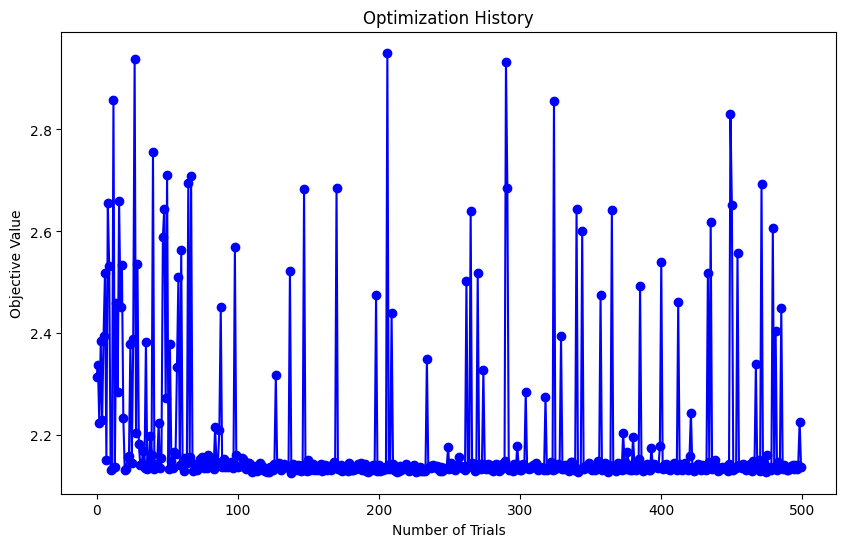

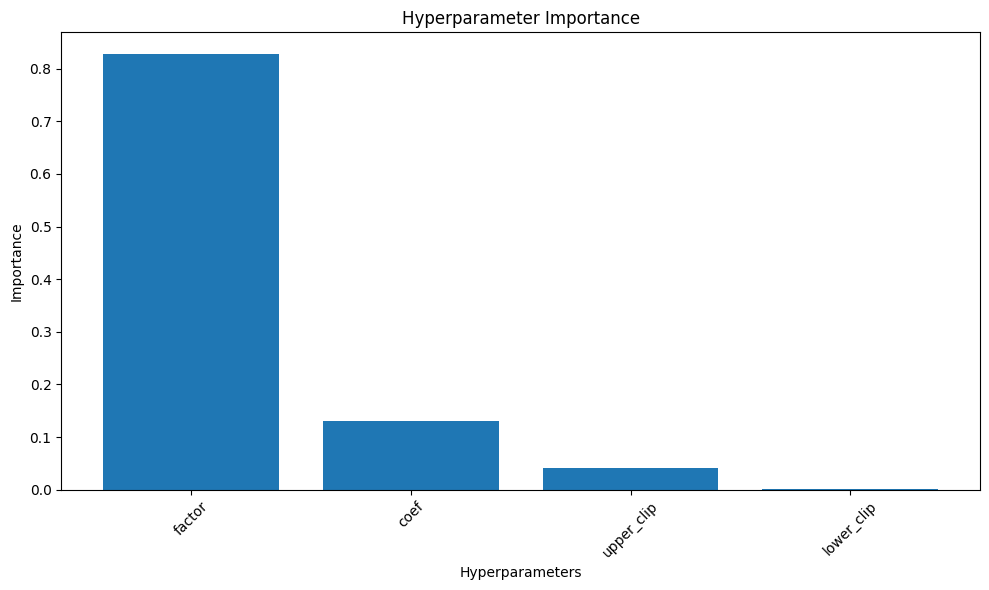

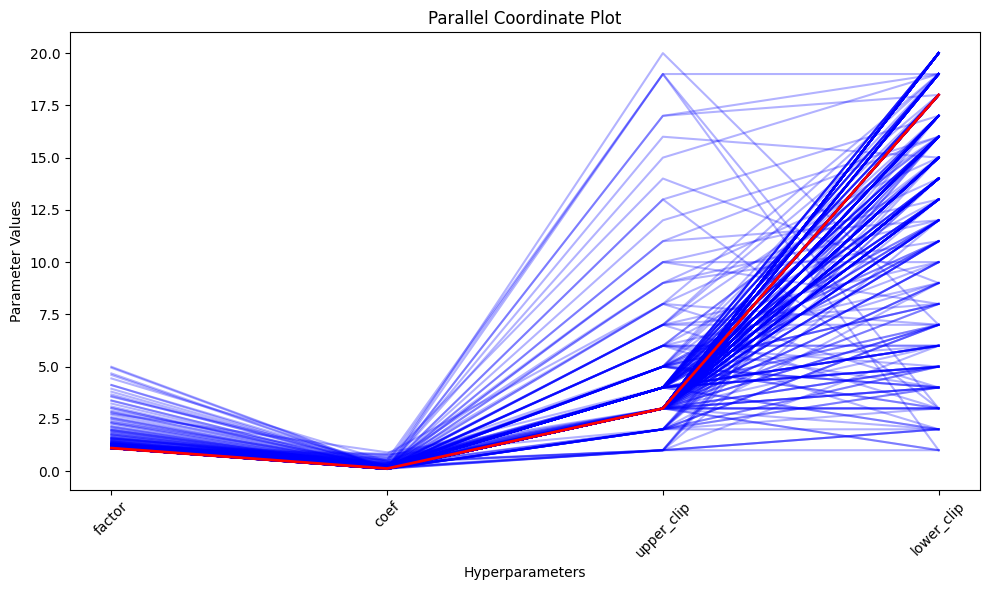

In [373]:
# Optimization history plot
plt.figure(figsize=(10, 6))
plt.plot([t.number for t in study_linear.trials], [t.value for t in study_linear.trials], 'bo-')
plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History')
plt.show()

# Feature importtance plot
if study_linear.best_trial is not None:
    importances = optuna.importance.get_param_importances(study_linear)
    importance_values = list(importances.values())
    param_names = list(importances.keys())

    plt.figure(figsize=(10, 6))
    plt.bar(param_names, importance_values)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Importance')
    plt.title('Hyperparameter Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Parallel coordinate plot
if study_linear.best_trial is not None:
    fig, ax = plt.subplots(figsize=(10, 6))
    params = [t.params for t in study_linear.trials if t.state == optuna.trial.TrialState.COMPLETE]
    for param in params:
        values = [param[name] for name in param_names]
        ax.plot(param_names, values, 'b-', alpha=0.3)
    best_params = study_linear.best_trial.params
    best_values = [best_params[name] for name in param_names]
    ax.plot(param_names, best_values, 'r-', linewidth=2)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Parameter Values')
    plt.title('Parallel Coordinate Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## TA-PID Bidder

In [25]:
def objective_tapid(trial, metric='RMSE_T', auction_mode='FPA'):
    k_p1 = trial.suggest_float('k_p1', 1e-4, 1, log=True)
    k_i1 = trial.suggest_float('k_i1', 1e-4, 1, log=True)
    k_d1 = trial.suggest_float('k_d1', 1e-4, 1, log=True)
    coef = trial.suggest_float('coef', 0.1, 0.9, log=True) # Cold start coefficient
    k_dict = {
        'k_p': k_p1,
        'k_i': k_i1,
        'k_d': k_d1
    }
   
    res = autobidder_check(
        bidder=TAPIDBidder,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            "k_dict": k_dict, 
            'cold_start_coef': coef,
        },
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
        print(f'PROBLEMS???{abs(1 - res["score"][0])}')
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 

def opt_search_tapid(n_trials, metric, auction_mode='FPA'):
    # if metric == 'RMSE_T':
    study = optuna.create_study(
        direction='maximize' if metric == 'MCR' else 'minimize'
    )
    # elif metric == 'MCR':
    #     study = optuna.create_study(direction='maximize')
    study.optimize(partial(objective_tapid, metric=metric, auction_mode=auction_mode), n_trials=n_trials)

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/ta_pid_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [26]:
n = 50
metric = 'RMSE_T' # for Mean Click Ratio use 'MCR'
study_ta_pid = opt_search_tapid(n, metric, auction_mode)

[I 2024-10-13 18:30:18,798] A new study created in memory with name: no-name-7ccf966d-7637-4eac-9d46-ce6dbe75a8c5
[I 2024-10-13 18:30:27,311] Trial 0 finished with value: 1.6137540167648363 and parameters: {'k_p1': 0.00014567337682603774, 'k_i1': 0.0015713109159261448, 'k_d1': 0.00032741922042247895, 'coef': 0.10020197381104559}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 14.51629168148033, rmse: 1.6137540167648363, SCR: 44582.53783316718


[I 2024-10-13 18:30:35,321] Trial 1 finished with value: 2.678256485919885 and parameters: {'k_p1': 0.007383919364490142, 'k_i1': 0.016071273717421078, 'k_d1': 0.0002024125936164851, 'coef': 0.847345139531894}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 21.241952613190826, rmse: 2.678256485919885, SCR: 61139.65774044258


[I 2024-10-13 18:30:43,767] Trial 2 finished with value: 2.600359868357377 and parameters: {'k_p1': 0.003708267564468211, 'k_i1': 0.2246619176795856, 'k_d1': 0.02537094590916853, 'coef': 0.2899297708793848}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 18.55729340614625, rmse: 2.600359868357377, SCR: 46575.61004999581


[I 2024-10-13 18:30:52,238] Trial 3 finished with value: 1.9901313679083585 and parameters: {'k_p1': 0.0034090516153080564, 'k_i1': 0.00012751573333142266, 'k_d1': 0.0011710233589945257, 'coef': 0.526880577239435}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 20.102174679539363, rmse: 1.9901313679083585, SCR: 48599.67588667572


[I 2024-10-13 18:30:59,127] Trial 4 finished with value: 3.828171426836384 and parameters: {'k_p1': 0.00041681213517489284, 'k_i1': 0.1462860888010877, 'k_d1': 0.00026951445232605047, 'coef': 0.23482254289700977}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 17.91068380860096, rmse: 3.828171426836384, SCR: 40473.11030026031


[I 2024-10-13 18:31:07,715] Trial 5 finished with value: 2.0988796747746887 and parameters: {'k_p1': 0.013319707963996515, 'k_i1': 0.0005806760773853076, 'k_d1': 0.7523933324637315, 'coef': 0.4467698468422361}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 15.41617786596187, rmse: 2.0988796747746887, SCR: 44181.078776972085


[I 2024-10-13 18:31:16,262] Trial 6 finished with value: 2.042290937083362 and parameters: {'k_p1': 0.0007501632449424999, 'k_i1': 0.25205253604051747, 'k_d1': 0.15050829057370535, 'coef': 0.4882691571430207}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 15.873558715763446, rmse: 2.042290937083362, SCR: 44686.46704002183


[I 2024-10-13 18:31:24,856] Trial 7 finished with value: 2.059845447771396 and parameters: {'k_p1': 0.021486682352883698, 'k_i1': 0.001212503763924816, 'k_d1': 0.12561149849303552, 'coef': 0.5064188112460768}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 16.083092487845352, rmse: 2.059845447771396, SCR: 44927.18007194558


[I 2024-10-13 18:31:33,169] Trial 8 finished with value: 2.1549202380678745 and parameters: {'k_p1': 0.010639812985293434, 'k_i1': 0.00018573730513171067, 'k_d1': 0.005112256517704473, 'coef': 0.41467592059033637}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 19.8621178955943, rmse: 2.1549202380678745, SCR: 48227.86048015124


[I 2024-10-13 18:31:41,105] Trial 9 finished with value: 3.968328535056571 and parameters: {'k_p1': 0.23314153437260654, 'k_i1': 0.011396156945728174, 'k_d1': 0.001840473776489499, 'coef': 0.16494769441958548}. Best is trial 0 with value: 1.6137540167648363.


CPC_REL: 20.282826992981672, rmse: 3.968328535056571, SCR: 57497.29738480694


[I 2024-10-13 18:31:49,770] Trial 10 finished with value: 1.5382739923986752 and parameters: {'k_p1': 0.00012196792798282862, 'k_i1': 0.0026299211308723736, 'k_d1': 0.0001033106285476446, 'coef': 0.1097133564990089}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 17.049036417385835, rmse: 1.5382739923986752, SCR: 46730.15204331277


[I 2024-10-13 18:31:58,495] Trial 11 finished with value: 1.5871615895515188 and parameters: {'k_p1': 0.00010934134010005853, 'k_i1': 0.0026569957199501708, 'k_d1': 0.0001420943526527884, 'coef': 0.10327558656257681}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 16.003241691209908, rmse: 1.5871615895515188, SCR: 46116.22287570759


[I 2024-10-13 18:32:07,263] Trial 12 finished with value: 1.5606232401528541 and parameters: {'k_p1': 0.00010704689761969441, 'k_i1': 0.0035443529435358412, 'k_d1': 0.00010604863611973069, 'coef': 0.10004068913443198}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 17.67686898710558, rmse: 1.5606232401528541, SCR: 46974.68124895898


[I 2024-10-13 18:32:15,593] Trial 13 finished with value: 2.0102308135716096 and parameters: {'k_p1': 0.000491376680004594, 'k_i1': 0.027996576458387868, 'k_d1': 0.000820378620300226, 'coef': 0.1499615111193891}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 20.51339146663235, rmse: 2.0102308135716096, SCR: 48659.00726168818


[I 2024-10-13 18:32:23,243] Trial 14 finished with value: 4.563916362412872 and parameters: {'k_p1': 0.10699656580175702, 'k_i1': 0.004315468724674964, 'k_d1': 0.00011938695247908745, 'coef': 0.15003413645538236}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 18.649213409761515, rmse: 4.563916362412872, SCR: 51774.51764908084


[I 2024-10-13 18:32:31,753] Trial 15 finished with value: 2.039576695935034 and parameters: {'k_p1': 0.0017616129524085135, 'k_i1': 0.04927049043046999, 'k_d1': 0.007769900264039077, 'coef': 0.1273316925592824}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 17.87365331065478, rmse: 2.039576695935034, SCR: 46715.33905970989


[I 2024-10-13 18:32:39,259] Trial 16 finished with value: 4.853707699501742 and parameters: {'k_p1': 0.9155276652005649, 'k_i1': 0.00474430035252881, 'k_d1': 0.0006429301732977212, 'coef': 0.20049728224276098}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 18.733132314072144, rmse: 4.853707699501742, SCR: 49067.67748538932


[I 2024-10-13 18:32:46,378] Trial 17 finished with value: 3.5694619734262165 and parameters: {'k_p1': 0.0002535207226923411, 'k_i1': 0.8475456573369703, 'k_d1': 0.003342744302672668, 'coef': 0.12002431886731722}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 20.832456383608612, rmse: 3.5694619734262165, SCR: 43705.11861337935


[I 2024-10-13 18:32:54,959] Trial 18 finished with value: 1.9750121733384136 and parameters: {'k_p1': 0.0011958635649874717, 'k_i1': 0.00035499250678443656, 'k_d1': 0.0270489157391367, 'coef': 0.20116162141162855}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 15.209175872070801, rmse: 1.9750121733384136, SCR: 44499.014933674756


[I 2024-10-13 18:33:03,606] Trial 19 finished with value: 1.6853502922700285 and parameters: {'k_p1': 0.0001032298034319617, 'k_i1': 0.0009509663426601754, 'k_d1': 0.0005009643319001516, 'coef': 0.3161790546031046}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 13.687806987267294, rmse: 1.6853502922700285, SCR: 44734.662562368016


[I 2024-10-13 18:33:11,372] Trial 20 finished with value: 4.03156801485138 and parameters: {'k_p1': 0.03737637232140746, 'k_i1': 0.006129683955803722, 'k_d1': 0.00010177285930461678, 'coef': 0.12501704802865912}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 19.117917986394694, rmse: 4.03156801485138, SCR: 55825.43210598163


[I 2024-10-13 18:33:20,053] Trial 21 finished with value: 1.582312429695547 and parameters: {'k_p1': 0.0002465042395250716, 'k_i1': 0.002249922378839269, 'k_d1': 0.00012197387127142478, 'coef': 0.10456239983025814}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 17.824689764068047, rmse: 1.582312429695547, SCR: 46982.41519817526


[I 2024-10-13 18:33:28,706] Trial 22 finished with value: 1.6540907466226342 and parameters: {'k_p1': 0.0002602144654064787, 'k_i1': 0.0019245723348831464, 'k_d1': 0.00032946872468418194, 'coef': 0.10481825911450471}. Best is trial 10 with value: 1.5382739923986752.


CPC_REL: 15.51651761818837, rmse: 1.6540907466226342, SCR: 45036.87140054238


[I 2024-10-13 18:33:37,357] Trial 23 finished with value: 1.5342672724230404 and parameters: {'k_p1': 0.00026862184548228377, 'k_i1': 0.0005060286530301044, 'k_d1': 0.00010115709735217121, 'coef': 0.16776446055145278}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 16.526295289690772, rmse: 1.5342672724230404, SCR: 46579.02187152795


[I 2024-10-13 18:33:45,894] Trial 24 finished with value: 1.7168338141084354 and parameters: {'k_p1': 0.0009859121121083675, 'k_i1': 0.0003606566601554778, 'k_d1': 0.001953073179406103, 'coef': 0.17442784321218258}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 15.999110042993756, rmse: 1.7168338141084354, SCR: 47029.468604730166


[I 2024-10-13 18:33:54,545] Trial 25 finished with value: 1.6646571555303227 and parameters: {'k_p1': 0.0002187645143638142, 'k_i1': 0.0007845486237325897, 'k_d1': 0.00045001780472291324, 'coef': 0.23355209492929452}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 14.381004703472117, rmse: 1.6646571555303227, SCR: 44678.34824008896


[I 2024-10-13 18:34:03,196] Trial 26 finished with value: 1.6234043170061376 and parameters: {'k_p1': 0.0005348098768095048, 'k_i1': 0.0002749410372875985, 'k_d1': 0.00020925559677511073, 'coef': 0.1368608286641302}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 17.147996188617732, rmse: 1.6234043170061376, SCR: 46728.002220752875


[I 2024-10-13 18:34:11,563] Trial 27 finished with value: 1.9626525254400722 and parameters: {'k_p1': 0.0022511715477885577, 'k_i1': 0.007221738607546652, 'k_d1': 0.0010216090297494413, 'coef': 0.18908308560050152}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 19.777813515597288, rmse: 1.9626525254400722, SCR: 48567.17969078501


[I 2024-10-13 18:34:20,171] Trial 28 finished with value: 1.5839470805341072 and parameters: {'k_p1': 0.00017151787251282863, 'k_i1': 0.00010037502553166942, 'k_d1': 0.00023830680178843957, 'coef': 0.1256574124547079}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 14.141334036344626, rmse: 1.5839470805341072, SCR: 44861.00683437768


[I 2024-10-13 18:34:28,716] Trial 29 finished with value: 1.954786532784299 and parameters: {'k_p1': 0.00010913567655376516, 'k_i1': 0.003036579641664863, 'k_d1': 0.014585686801853542, 'coef': 0.10046779785496213}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 14.932496860783553, rmse: 1.954786532784299, SCR: 44608.38863362108


[I 2024-10-13 18:34:37,417] Trial 30 finished with value: 1.661221013181317 and parameters: {'k_p1': 0.0005297027663690788, 'k_i1': 0.0005500066602885209, 'k_d1': 0.00038364920200854125, 'coef': 0.14473786240153086}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 16.030108721798648, rmse: 1.661221013181317, SCR: 45542.891019574454


[I 2024-10-13 18:34:46,025] Trial 31 finished with value: 1.5432987536895557 and parameters: {'k_p1': 0.0002566808909283207, 'k_i1': 0.0019064549897299173, 'k_d1': 0.00011385538573136131, 'coef': 0.11523970525085155}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 17.933026096297603, rmse: 1.5432987536895557, SCR: 46819.673421403284


[I 2024-10-13 18:34:54,684] Trial 32 finished with value: 1.5887006485044501 and parameters: {'k_p1': 0.00016373090590333093, 'k_i1': 0.0014306779139629843, 'k_d1': 0.0001815525564317233, 'coef': 0.11570882392956382}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 15.56057502557845, rmse: 1.5887006485044501, SCR: 46101.796991951174


[I 2024-10-13 18:35:02,900] Trial 33 finished with value: 2.2354895896059976 and parameters: {'k_p1': 0.00033460680966511413, 'k_i1': 0.01939004142447962, 'k_d1': 0.00010625041597162646, 'coef': 0.7993098048069588}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 23.492685244263452, rmse: 2.2354895896059976, SCR: 53100.54016511014


[I 2024-10-13 18:35:11,066] Trial 34 finished with value: 2.394375799187532 and parameters: {'k_p1': 0.0054111887581548695, 'k_i1': 0.010963996456158686, 'k_d1': 0.0002351095894880656, 'coef': 0.11582711727026075}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 22.156526279555873, rmse: 2.394375799187532, SCR: 60148.02563895956


[I 2024-10-13 18:35:19,731] Trial 35 finished with value: 1.7300553759074355 and parameters: {'k_p1': 0.0008385846464453437, 'k_i1': 0.00365809579120503, 'k_d1': 0.0004002741036861568, 'coef': 0.16359691458830347}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 19.3241946957731, rmse: 1.7300553759074355, SCR: 47297.70676840626


[I 2024-10-13 18:35:28,356] Trial 36 finished with value: 1.7852896636864526 and parameters: {'k_p1': 0.0017394957029587038, 'k_i1': 0.0014761817511484204, 'k_d1': 0.00019378258177195468, 'coef': 0.29803447281440637}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 22.148233423699583, rmse: 1.7852896636864526, SCR: 50626.00931728879


[I 2024-10-13 18:35:37,346] Trial 37 finished with value: 1.7319252164809729 and parameters: {'k_p1': 0.0001647195168336674, 'k_i1': 0.000573823280857505, 'k_d1': 0.0006530962536621513, 'coef': 0.2587644518869661}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 13.486116244784666, rmse: 1.7319252164809729, SCR: 45530.56059686704


[I 2024-10-13 18:35:45,976] Trial 38 finished with value: 1.6939181141063708 and parameters: {'k_p1': 0.00038246045339318616, 'k_i1': 0.00020578424925132903, 'k_d1': 0.0014899849051226931, 'coef': 0.14661043669571175}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 14.075318871618572, rmse: 1.6939181141063708, SCR: 45976.57057974396


[I 2024-10-13 18:35:54,562] Trial 39 finished with value: 2.064268581629336 and parameters: {'k_p1': 0.0038425808648553375, 'k_i1': 0.055103149746511274, 'k_d1': 0.4607315838305566, 'coef': 0.35701254776595465}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 15.339126145411432, rmse: 2.064268581629336, SCR: 44174.49688440761


[I 2024-10-13 18:36:03,079] Trial 40 finished with value: 2.013172590087532 and parameters: {'k_p1': 0.0006932724306111676, 'k_i1': 0.0008089697143593463, 'k_d1': 0.07622218108328825, 'coef': 0.7058290027033877}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 15.184322593984449, rmse: 2.013172590087532, SCR: 44193.474856690984


[I 2024-10-13 18:36:11,753] Trial 41 finished with value: 1.6111668577416853 and parameters: {'k_p1': 0.0002547878645892799, 'k_i1': 0.002224161305503365, 'k_d1': 0.00015014224139077645, 'coef': 0.1102048217626687}. Best is trial 23 with value: 1.5342672724230404.


CPC_REL: 17.558601819813244, rmse: 1.6111668577416853, SCR: 46816.3312619551


[I 2024-10-13 18:36:20,455] Trial 42 finished with value: 1.519359413283189 and parameters: {'k_p1': 0.00010231537298489881, 'k_i1': 0.0022205797767868296, 'k_d1': 0.00010306885162467578, 'coef': 0.13444354357967891}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 16.406788701247255, rmse: 1.519359413283189, SCR: 46431.99750055182


[I 2024-10-13 18:36:29,262] Trial 43 finished with value: 1.6562745085764135 and parameters: {'k_p1': 0.0001099255183048828, 'k_i1': 0.007168185996713859, 'k_d1': 0.00010280991080662185, 'coef': 0.13657738066892475}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 21.084468724930428, rmse: 1.6562745085764135, SCR: 48687.482810702124


[I 2024-10-13 18:36:37,819] Trial 44 finished with value: 1.596265891597676 and parameters: {'k_p1': 0.00014950449603804393, 'k_i1': 0.0010987176413341769, 'k_d1': 0.0002957257238057409, 'coef': 0.16808565700416828}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 14.41782626297723, rmse: 1.596265891597676, SCR: 44958.61351139594


[I 2024-10-13 18:36:46,454] Trial 45 finished with value: 1.636942683275669 and parameters: {'k_p1': 0.00037474502881182777, 'k_i1': 0.003094195248692212, 'k_d1': 0.00017649799973970458, 'coef': 0.13358202738070818}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 18.778209079502275, rmse: 1.636942683275669, SCR: 47635.406190788024


[I 2024-10-13 18:36:54,888] Trial 46 finished with value: 1.9601664146606235 and parameters: {'k_p1': 0.00017699104880904926, 'k_i1': 0.01574890298507943, 'k_d1': 0.0002647780008484555, 'coef': 0.11461614349884965}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 22.086887589461988, rmse: 1.9601664146606235, SCR: 48470.50359361277


[I 2024-10-13 18:37:03,418] Trial 47 finished with value: 1.664607522226851 and parameters: {'k_p1': 0.0003343926290625167, 'k_i1': 0.005250414106146305, 'k_d1': 0.00016103269169896837, 'coef': 0.2214411210669741}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 20.275312792573327, rmse: 1.664607522226851, SCR: 48270.99366738372


[I 2024-10-13 18:37:11,893] Trial 48 finished with value: 1.7157311937814121 and parameters: {'k_p1': 0.00010023176069913744, 'k_i1': 0.0018485404361495976, 'k_d1': 0.0005555926752793365, 'coef': 0.16095888145141843}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 13.956391684607157, rmse: 1.7157311937814121, SCR: 44990.912030938736


[I 2024-10-13 18:37:20,455] Trial 49 finished with value: 1.8396085590778262 and parameters: {'k_p1': 0.0006373071797529564, 'k_i1': 0.0005135538742611158, 'k_d1': 0.002915449124023646, 'coef': 0.11126437366450911}. Best is trial 42 with value: 1.519359413283189.


CPC_REL: 15.376427422502942, rmse: 1.8396085590778262, SCR: 46302.94658995287
Best trial:
  Value: 1.519359413283189
  Params: 
    k_p1: 0.00010231537298489881
    k_i1: 0.0022205797767868296
    k_d1: 0.00010306885162467578
    coef: 0.13444354357967891


In [12]:
n = 50
metric = 'CPC_REL' # for Mean Click Ratio use 'MCR'
study_ta_pid = opt_search_tapid(n, metric, auction_mode)

[I 2024-10-13 14:40:25,825] A new study created in memory with name: no-name-732c0429-6595-4a36-a67a-58a90468a931
[I 2024-10-13 14:40:28,283] Trial 0 finished with value: 10.655203520723402 and parameters: {'k_p1': 0.041611952419922084, 'k_i1': 0.5893722252436469, 'k_d1': 0.03442314904942147, 'coef': 0.1257710121551616}. Best is trial 0 with value: 10.655203520723402.


CPC_REL: 10.655203520723402, rmse: 7.310822154820814, SCR: 15801.627539313677
PROBLEMS???9.655203520723402


[I 2024-10-13 14:40:31,053] Trial 1 finished with value: 5.6737063868989805 and parameters: {'k_p1': 0.0012757529093714057, 'k_i1': 0.0025814579945397753, 'k_d1': 0.02965369895196176, 'coef': 0.1573610886572153}. Best is trial 1 with value: 5.6737063868989805.


CPC_REL: 5.6737063868989805, rmse: 3.253993131265739, SCR: 30139.307050432686
PROBLEMS???4.6737063868989805


[I 2024-10-13 14:40:33,753] Trial 2 finished with value: 6.714559208028908 and parameters: {'k_p1': 0.0028980094510301403, 'k_i1': 0.00011442427005366313, 'k_d1': 0.011003917078078816, 'coef': 0.14658839682425465}. Best is trial 1 with value: 5.6737063868989805.


CPC_REL: 6.714559208028908, rmse: 4.386319372072089, SCR: 22029.67970028377
PROBLEMS???5.714559208028908


[I 2024-10-13 14:40:36,549] Trial 3 finished with value: 5.400165888428437 and parameters: {'k_p1': 0.00044836224482855364, 'k_i1': 0.00895161923638227, 'k_d1': 0.29604483178067575, 'coef': 0.7162115537446536}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 5.400165888428437, rmse: 3.054192846431646, SCR: 22015.08492079817
PROBLEMS???4.400165888428437


[I 2024-10-13 14:40:39,038] Trial 4 finished with value: 9.970530840017064 and parameters: {'k_p1': 0.06113040134778438, 'k_i1': 0.08285238342075442, 'k_d1': 0.15863808999811527, 'coef': 0.8281930539616967}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 9.970530840017064, rmse: 6.198502007758458, SCR: 19291.703880878707
PROBLEMS???8.970530840017064


[I 2024-10-13 14:40:41,427] Trial 5 finished with value: 7.407968773143368 and parameters: {'k_p1': 0.14364839986191064, 'k_i1': 0.00018809014474650894, 'k_d1': 0.00023948766300313046, 'coef': 0.1350155954028619}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 7.407968773143368, rmse: 6.99878595598548, SCR: 15103.541423328414
PROBLEMS???6.407968773143368


[I 2024-10-13 14:40:44,001] Trial 6 finished with value: 9.504661260124541 and parameters: {'k_p1': 0.00037601876910028947, 'k_i1': 0.2414603268948772, 'k_d1': 0.5832205208081137, 'coef': 0.48076413903870546}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 9.504661260124541, rmse: 5.818041807737505, SCR: 21290.016836855026
PROBLEMS???8.504661260124541


[I 2024-10-13 14:40:46,630] Trial 7 finished with value: 8.240291414543298 and parameters: {'k_p1': 0.004151107523758807, 'k_i1': 0.00075059012286062, 'k_d1': 0.008910792152831288, 'coef': 0.64136461072106}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 8.240291414543298, rmse: 4.531460996599171, SCR: 17852.896548873545
PROBLEMS???7.240291414543298


[I 2024-10-13 14:40:49,210] Trial 8 finished with value: 9.338043284699998 and parameters: {'k_p1': 0.004007856280853479, 'k_i1': 0.008413231359334526, 'k_d1': 0.0005403673395599821, 'coef': 0.35514341824639717}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 9.338043284699998, rmse: 4.875706986479154, SCR: 18059.966045657857
PROBLEMS???8.338043284699998


[I 2024-10-13 14:40:51,792] Trial 9 finished with value: 9.708820227549921 and parameters: {'k_p1': 0.00013617021652928993, 'k_i1': 0.054489342416097424, 'k_d1': 0.0003048015447507013, 'coef': 0.29371796549651674}. Best is trial 3 with value: 5.400165888428437.


CPC_REL: 9.708820227549921, rmse: 4.1360553010517425, SCR: 16388.969434502393
PROBLEMS???8.708820227549921


[I 2024-10-13 14:40:54,594] Trial 10 finished with value: 4.637914264634005 and parameters: {'k_p1': 0.0001098939531604093, 'k_i1': 0.010214288193155728, 'k_d1': 0.718104154850691, 'coef': 0.22496235164281336}. Best is trial 10 with value: 4.637914264634005.


CPC_REL: 4.637914264634005, rmse: 3.15333363058396, SCR: 21865.152745833886
PROBLEMS???3.637914264634005


[I 2024-10-13 14:40:57,566] Trial 11 finished with value: 5.265452813027035 and parameters: {'k_p1': 0.00015597308384609723, 'k_i1': 0.012553910591403837, 'k_d1': 0.8662544234510878, 'coef': 0.21509915025212478}. Best is trial 10 with value: 4.637914264634005.


CPC_REL: 5.265452813027035, rmse: 3.4123864146800003, SCR: 21765.050641480426
PROBLEMS???4.265452813027035


[I 2024-10-13 14:40:59,993] Trial 12 finished with value: 10.231006819771308 and parameters: {'k_p1': 0.8986670691416264, 'k_i1': 0.02131297982986052, 'k_d1': 0.7656279314827915, 'coef': 0.20829852428992843}. Best is trial 10 with value: 4.637914264634005.


CPC_REL: 10.231006819771308, rmse: 8.94512083431645, SCR: 15663.819008019458
PROBLEMS???9.231006819771308


[I 2024-10-13 14:41:02,884] Trial 13 finished with value: 3.1141084757105917 and parameters: {'k_p1': 0.00013133626472495028, 'k_i1': 0.0016671195949904106, 'k_d1': 0.11199714462078669, 'coef': 0.23460294190816328}. Best is trial 13 with value: 3.1141084757105917.


CPC_REL: 3.1141084757105917, rmse: 2.319606094995221, SCR: 29264.179780533468
PROBLEMS???2.1141084757105917


[I 2024-10-13 14:41:05,752] Trial 14 finished with value: 5.069554641937362 and parameters: {'k_p1': 0.0008150397096088371, 'k_i1': 0.0015151567506718297, 'k_d1': 0.0754390645988263, 'coef': 0.25961124245412576}. Best is trial 13 with value: 3.1141084757105917.


CPC_REL: 5.069554641937362, rmse: 2.844964944637662, SCR: 29488.78558479275
PROBLEMS???4.069554641937362


[I 2024-10-13 14:41:08,691] Trial 15 finished with value: 1.4201344716434998 and parameters: {'k_p1': 0.0001380476811505111, 'k_i1': 0.0006301708400164953, 'k_d1': 0.001904269602952094, 'coef': 0.3555894993172601}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 1.4201344716434998, rmse: 1.3556517338879717, SCR: 33026.815513570626
PROBLEMS???0.4201344716434998


[I 2024-10-13 14:41:11,147] Trial 16 finished with value: 10.873167595163066 and parameters: {'k_p1': 0.016605159453265378, 'k_i1': 0.0004600564443938905, 'k_d1': 0.0015251238687931262, 'coef': 0.39780012572005935}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 10.873167595163066, rmse: 6.166201664612858, SCR: 16305.430122974536
PROBLEMS???9.873167595163066


[I 2024-10-13 14:41:14,109] Trial 17 finished with value: 3.2081841742031263 and parameters: {'k_p1': 0.0003681553701433251, 'k_i1': 0.0019899490580944875, 'k_d1': 0.0022719624873816626, 'coef': 0.5049094074297834}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 3.2081841742031263, rmse: 2.3938721988354636, SCR: 33400.802079492205
PROBLEMS???2.2081841742031263


[I 2024-10-13 14:41:16,937] Trial 18 finished with value: 5.444861817452862 and parameters: {'k_p1': 0.001325392670701858, 'k_i1': 0.0003649528669900679, 'k_d1': 0.003699708438178547, 'coef': 0.36500510428387006}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 5.444861817452862, rmse: 3.117213182273806, SCR: 23084.199431770987
PROBLEMS???4.444861817452862


[I 2024-10-13 14:41:19,454] Trial 19 finished with value: 9.742860592448839 and parameters: {'k_p1': 0.011842375817632141, 'k_i1': 0.0026957245699689544, 'k_d1': 0.008065292660955339, 'coef': 0.1068031486955076}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 9.742860592448839, rmse: 5.585843384242466, SCR: 16560.80921192599
PROBLEMS???8.742860592448839


[I 2024-10-13 14:41:22,403] Trial 20 finished with value: 1.8303821805796923 and parameters: {'k_p1': 0.00027494519999217936, 'k_i1': 0.0007958194190942172, 'k_d1': 0.00010498455948546837, 'coef': 0.17433606499248816}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 1.8303821805796923, rmse: 1.3379635653901638, SCR: 33035.74892454922
PROBLEMS???0.8303821805796923


[I 2024-10-13 14:41:25,383] Trial 21 finished with value: 1.500249447713327 and parameters: {'k_p1': 0.0001997692443231192, 'k_i1': 0.0008019514243264182, 'k_d1': 0.00010330272712846996, 'coef': 0.20558654587064587}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 1.500249447713327, rmse: 1.351386704830258, SCR: 33233.929828184584
PROBLEMS???0.500249447713327


[I 2024-10-13 14:41:28,327] Trial 22 finished with value: 1.9023190907283245 and parameters: {'k_p1': 0.0002862194222041781, 'k_i1': 0.0007559536018603091, 'k_d1': 0.00010255922475747511, 'coef': 0.17554740399844995}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 1.9023190907283245, rmse: 1.4230317402888522, SCR: 33160.85391940343
PROBLEMS???0.9023190907283245


[I 2024-10-13 14:41:31,215] Trial 23 finished with value: 5.419348653769686 and parameters: {'k_p1': 0.0012140012925226944, 'k_i1': 0.00023710564286858016, 'k_d1': 0.00010026998871505922, 'coef': 0.17398416164904382}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 5.419348653769686, rmse: 2.3347963491056687, SCR: 27767.027358614927
PROBLEMS???4.419348653769686


[I 2024-10-13 14:41:34,114] Trial 24 finished with value: 4.557322760096998 and parameters: {'k_p1': 0.0006936037238958664, 'k_i1': 0.0042944248225398815, 'k_d1': 0.0009462900704535925, 'coef': 0.2955528588275665}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 4.557322760096998, rmse: 2.914360011144811, SCR: 23105.452277459568
PROBLEMS???3.557322760096998


[I 2024-10-13 14:41:37,070] Trial 25 finished with value: 1.9625980097865288 and parameters: {'k_p1': 0.00023893019995439255, 'k_i1': 0.0008450200861699174, 'k_d1': 0.0003206847868012081, 'coef': 0.19129003179745285}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 1.9625980097865288, rmse: 1.4157461180961446, SCR: 32882.563467886124
PROBLEMS???0.9625980097865288


[I 2024-10-13 14:41:39,864] Trial 26 finished with value: 5.48156671294278 and parameters: {'k_p1': 0.0017846176720268823, 'k_i1': 0.00010090093848490864, 'k_d1': 0.00017436031791357584, 'coef': 0.10211360023265549}. Best is trial 15 with value: 1.4201344716434998.


CPC_REL: 5.48156671294278, rmse: 2.9279160375985755, SCR: 23190.53870198702
PROBLEMS???4.48156671294278


[I 2024-10-13 14:41:42,823] Trial 27 finished with value: 1.1029731089571129 and parameters: {'k_p1': 0.00010298239445692207, 'k_i1': 0.00046313957511114295, 'k_d1': 0.0006128480220224316, 'coef': 0.2570726302666695}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 1.1029731089571129, rmse: 1.323137232443463, SCR: 32944.98736738106
PROBLEMS???0.10297310895711287


[I 2024-10-13 14:41:45,733] Trial 28 finished with value: 4.036220429608465 and parameters: {'k_p1': 0.0007313463005830657, 'k_i1': 0.0003193007583420724, 'k_d1': 0.0007225545925863223, 'coef': 0.4437401393333245}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 4.036220429608465, rmse: 2.1354862270489483, SCR: 33838.71269739184
PROBLEMS???3.0362204296084654


[I 2024-10-13 14:41:48,094] Trial 29 finished with value: 11.773787845309023 and parameters: {'k_p1': 0.0001916204257349784, 'k_i1': 0.9664637685432071, 'k_d1': 0.0036627542438000286, 'coef': 0.2616570486701138}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 11.773787845309023, rmse: 6.665341287372191, SCR: 15183.420043650065
PROBLEMS???10.773787845309023


[I 2024-10-13 14:41:51,014] Trial 30 finished with value: 2.4925090178240414 and parameters: {'k_p1': 0.00010237198724292731, 'k_i1': 0.004032411122211278, 'k_d1': 0.00048785488336332305, 'coef': 0.33479408156790424}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 2.4925090178240414, rmse: 1.6390508544015285, SCR: 33217.48895991657
PROBLEMS???1.4925090178240414


[I 2024-10-13 14:41:53,955] Trial 31 finished with value: 1.6845977807606376 and parameters: {'k_p1': 0.00023525118316881642, 'k_i1': 0.0008710102612201572, 'k_d1': 0.00016180037462364689, 'coef': 0.26989210972343725}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 1.6845977807606376, rmse: 1.3272817454126657, SCR: 33126.530117399605
PROBLEMS???0.6845977807606376


[I 2024-10-13 14:41:56,881] Trial 32 finished with value: 3.337582944130507 and parameters: {'k_p1': 0.00047985820478842455, 'k_i1': 0.0005304036767240906, 'k_d1': 0.001332879314229622, 'coef': 0.26073216790770154}. Best is trial 27 with value: 1.1029731089571129.


CPC_REL: 3.337582944130507, rmse: 2.159120977640279, SCR: 33380.48379686011
PROBLEMS???2.337582944130507


[I 2024-10-13 14:41:59,851] Trial 33 finished with value: 1.0160879437526549 and parameters: {'k_p1': 0.00021416852857682173, 'k_i1': 0.00017046080980588347, 'k_d1': 0.00016714321532757619, 'coef': 0.27854894413549414}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 1.0160879437526549, rmse: 1.327771904847983, SCR: 33157.45863328912
PROBLEMS???0.016087943752654876


[I 2024-10-13 14:42:02,757] Trial 34 finished with value: 2.359202957606662 and parameters: {'k_p1': 0.0005770025708296525, 'k_i1': 0.00017242223916516145, 'k_d1': 0.0003948486238375334, 'coef': 0.3048181892048711}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 2.359202957606662, rmse: 1.5070636416739476, SCR: 33546.516076325475
PROBLEMS???1.3592029576066622


[I 2024-10-13 14:42:05,689] Trial 35 finished with value: 1.5846522526186206 and parameters: {'k_p1': 0.00010510074153654882, 'k_i1': 0.0001345683738781763, 'k_d1': 0.016464161656698027, 'coef': 0.4216180259541329}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 1.5846522526186206, rmse: 1.4722938417990774, SCR: 30037.053123883186
PROBLEMS???0.5846522526186206


[I 2024-10-13 14:42:08,367] Trial 36 finished with value: 6.236124697991186 and parameters: {'k_p1': 0.0022403827682667063, 'k_i1': 0.0011893077655017934, 'k_d1': 0.00019913676966336078, 'coef': 0.5798453899450978}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 6.236124697991186, rmse: 3.445244918329741, SCR: 18834.46947382255
PROBLEMS???5.236124697991186


[I 2024-10-13 14:42:10,837] Trial 37 finished with value: 10.062973930132802 and parameters: {'k_p1': 0.04053812649974752, 'k_i1': 0.00027055175375977596, 'k_d1': 0.0007831443372056797, 'coef': 0.15468329950074167}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 10.062973930132802, rmse: 6.4994400713212315, SCR: 15807.642901503254
PROBLEMS???9.062973930132802


[I 2024-10-13 14:42:13,817] Trial 38 finished with value: 1.8632113198590567 and parameters: {'k_p1': 0.0001771194866087265, 'k_i1': 0.00018771513184540347, 'k_d1': 0.0027664017976671423, 'coef': 0.32472790924053263}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 1.8632113198590567, rmse: 1.396669634261914, SCR: 33339.975243739274
PROBLEMS???0.8632113198590567


[I 2024-10-13 14:42:16,350] Trial 39 finished with value: 9.957491999132593 and parameters: {'k_p1': 0.006727158173184076, 'k_i1': 0.00041707781491329805, 'k_d1': 0.0014947584328290763, 'coef': 0.1292445338307932}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 9.957491999132593, rmse: 5.52393646165555, SCR: 17303.043518286628
PROBLEMS???8.957491999132593


[I 2024-10-13 14:42:18,780] Trial 40 finished with value: 10.62046922250265 and parameters: {'k_p1': 0.254324385112846, 'k_i1': 0.0027795404747806654, 'k_d1': 0.005817328800184495, 'coef': 0.37025042523501067}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 10.62046922250265, rmse: 6.955521383702336, SCR: 15484.715996010347
PROBLEMS???9.62046922250265


[I 2024-10-13 14:42:21,682] Trial 41 finished with value: 3.283273571451794 and parameters: {'k_p1': 0.00037293247546217514, 'k_i1': 0.00014418316502746583, 'k_d1': 0.016977421491328044, 'coef': 0.42734393516167013}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 3.283273571451794, rmse: 2.3392198312711106, SCR: 29752.647755726623
PROBLEMS???2.283273571451794


[I 2024-10-13 14:42:24,588] Trial 42 finished with value: 1.7454315545141195 and parameters: {'k_p1': 0.0001037370096913689, 'k_i1': 0.00011315765189658962, 'k_d1': 0.023867327747038147, 'coef': 0.5093206398948883}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 1.7454315545141195, rmse: 1.5072747210882702, SCR: 29769.17143040528
PROBLEMS???0.7454315545141195


[I 2024-10-13 14:42:27,519] Trial 43 finished with value: 2.5008494016735607 and parameters: {'k_p1': 0.00017595549767590105, 'k_i1': 0.0005452968674090052, 'k_d1': 0.014093501118052649, 'coef': 0.23140104261770938}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 2.5008494016735607, rmse: 1.5152065279744962, SCR: 29811.04050790959
PROBLEMS???1.5008494016735607


[I 2024-10-13 14:42:30,442] Trial 44 finished with value: 2.089549984347767 and parameters: {'k_p1': 0.0003104977762598932, 'k_i1': 0.00025357946135212, 'k_d1': 0.0005445910723718921, 'coef': 0.5731866256365477}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 2.089549984347767, rmse: 1.4224960700607516, SCR: 33243.47839865405
PROBLEMS???1.0895499843477672


[I 2024-10-13 14:42:33,348] Trial 45 finished with value: 2.142137044543072 and parameters: {'k_p1': 0.00015651074045341647, 'k_i1': 0.00016801209893401944, 'k_d1': 0.04752391450445715, 'coef': 0.42211145998259514}. Best is trial 33 with value: 1.0160879437526549.


CPC_REL: 2.142137044543072, rmse: 1.8011070994939666, SCR: 29875.25711074313
PROBLEMS???1.1421370445430719


[I 2024-10-13 14:42:36,300] Trial 46 finished with value: 0.9484166084651549 and parameters: {'k_p1': 0.00010060452230821186, 'k_i1': 0.0011473598065250173, 'k_d1': 0.0002462145053784247, 'coef': 0.7290514991539742}. Best is trial 46 with value: 0.9484166084651549.


CPC_REL: 0.9484166084651549, rmse: 1.3257676129995761, SCR: 32970.74806244153
PROBLEMS???0.05158339153484515


[I 2024-10-13 14:42:39,204] Trial 47 finished with value: 2.8747075363785957 and parameters: {'k_p1': 0.0004791857035234372, 'k_i1': 0.0011227908013934046, 'k_d1': 0.00028502786743357124, 'coef': 0.6737841157304681}. Best is trial 46 with value: 0.9484166084651549.


CPC_REL: 2.8747075363785957, rmse: 1.7744099673418319, SCR: 33703.2241280125
PROBLEMS???1.8747075363785957


[I 2024-10-13 14:42:41,458] Trial 48 finished with value: 14.866703205569282 and parameters: {'k_p1': 0.0011974638465014615, 'k_i1': 0.20103754638370455, 'k_d1': 0.00023378721877272474, 'coef': 0.20036586799925318}. Best is trial 46 with value: 0.9484166084651549.


CPC_REL: 14.866703205569282, rmse: 7.056157805860226, SCR: 13329.676568432069
PROBLEMS???13.866703205569282


[I 2024-10-13 14:42:44,179] Trial 49 finished with value: 8.995367141715345 and parameters: {'k_p1': 0.00021084697768561367, 'k_i1': 0.026150775902796533, 'k_d1': 0.00014157619746889326, 'coef': 0.7246330489062371}. Best is trial 46 with value: 0.9484166084651549.


CPC_REL: 8.995367141715345, rmse: 3.1886884310765944, SCR: 20431.031277519338
PROBLEMS???7.995367141715345
Best trial:
  Value: 0.9484166084651549
  Params: 
    k_p1: 0.00010060452230821186
    k_i1: 0.0011473598065250173
    k_d1: 0.0002462145053784247
    coef: 0.7290514991539742


In [27]:
n = 50
metric = 'MCR' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_tapid(n, metric, auction_mode)

[I 2024-10-13 18:37:20,474] A new study created in memory with name: no-name-19f99339-e771-4118-a8e4-3f81f6815b4c
[I 2024-10-13 18:37:27,848] Trial 0 finished with value: 45105.57298516805 and parameters: {'k_p1': 0.0011915313241508622, 'k_i1': 0.10218438108235796, 'k_d1': 0.00045679185891337793, 'coef': 0.48540436844191165}. Best is trial 0 with value: 45105.57298516805.


CPC_REL: 20.87057732538374, rmse: 2.994039636584315, SCR: 45105.57298516805


[I 2024-10-13 18:37:35,875] Trial 1 finished with value: 49749.75166213713 and parameters: {'k_p1': 0.0043950593341396775, 'k_i1': 0.1253923785685253, 'k_d1': 0.001843532774448867, 'coef': 0.6620362470708309}. Best is trial 1 with value: 49749.75166213713.


CPC_REL: 24.8367411032012, rmse: 2.6755767866849753, SCR: 49749.75166213713


[I 2024-10-13 18:37:44,459] Trial 2 finished with value: 45133.24333940876 and parameters: {'k_p1': 0.00011056917999403338, 'k_i1': 0.00034302504616651056, 'k_d1': 0.005673003507339379, 'coef': 0.1043811077335722}. Best is trial 1 with value: 49749.75166213713.


CPC_REL: 14.516154487038873, rmse: 1.8571025043866851, SCR: 45133.24333940876


[I 2024-10-13 18:37:52,830] Trial 3 finished with value: 48741.848931071814 and parameters: {'k_p1': 0.00012121259900399368, 'k_i1': 0.34729875860918635, 'k_d1': 0.011269964420909578, 'coef': 0.24779369508202395}. Best is trial 1 with value: 49749.75166213713.


CPC_REL: 22.57249989529305, rmse: 2.570939003112847, SCR: 48741.848931071814


[I 2024-10-13 18:38:01,375] Trial 4 finished with value: 44772.33210150763 and parameters: {'k_p1': 0.00019987994767790742, 'k_i1': 0.0718080198413305, 'k_d1': 0.04195492810120592, 'coef': 0.4545162149344748}. Best is trial 1 with value: 49749.75166213713.


CPC_REL: 15.83407554530825, rmse: 2.0241589783642, SCR: 44772.33210150763


[I 2024-10-13 18:38:09,137] Trial 5 finished with value: 54173.51837302764 and parameters: {'k_p1': 0.36946703465090114, 'k_i1': 0.15847426020397934, 'k_d1': 0.0023722947789183465, 'coef': 0.20178861974272053}. Best is trial 5 with value: 54173.51837302764.


CPC_REL: 19.532029111263423, rmse: 4.059819388949675, SCR: 54173.51837302764


[I 2024-10-13 18:38:17,042] Trial 6 finished with value: 58440.17651132784 and parameters: {'k_p1': 0.04680761702137525, 'k_i1': 0.00011273343766302676, 'k_d1': 0.00018456555300241443, 'coef': 0.20593537570418383}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 19.44479271463302, rmse: 3.987718635987121, SCR: 58440.17651132784


[I 2024-10-13 18:38:23,727] Trial 7 finished with value: 37948.50378841019 and parameters: {'k_p1': 0.0003965816605517002, 'k_i1': 0.403857592418178, 'k_d1': 0.00020618670478153646, 'coef': 0.1959655876149168}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 15.853878920005394, rmse: 5.465982475997618, SCR: 37948.50378841019


[I 2024-10-13 18:38:31,660] Trial 8 finished with value: 49186.46135297174 and parameters: {'k_p1': 0.0037244184332721666, 'k_i1': 0.6423428962003935, 'k_d1': 0.00698680317005556, 'coef': 0.5279151998424517}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 25.274044204693226, rmse: 3.051117229679058, SCR: 49186.46135297174


[I 2024-10-13 18:38:39,103] Trial 9 finished with value: 48447.042174595204 and parameters: {'k_p1': 0.25156384952665845, 'k_i1': 0.4406730426133376, 'k_d1': 0.0003632213951003704, 'coef': 0.23216330663637183}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 17.867834515622338, rmse: 4.6079127213959445, SCR: 48447.042174595204


[I 2024-10-13 18:38:47,586] Trial 10 finished with value: 44917.67016893401 and parameters: {'k_p1': 0.06024151522272308, 'k_i1': 0.0002549300066006493, 'k_d1': 0.3197091957995494, 'coef': 0.11825480545587724}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 16.1204938476667, rmse: 2.053585461227881, SCR: 44917.67016893401


[I 2024-10-13 18:38:54,953] Trial 11 finished with value: 48281.54509483211 and parameters: {'k_p1': 0.738605760432918, 'k_i1': 0.004267442047869086, 'k_d1': 0.0001180831671574779, 'coef': 0.16824995030956502}. Best is trial 6 with value: 58440.17651132784.


CPC_REL: 18.640210829830373, rmse: 4.953912350102337, SCR: 48281.54509483211


[I 2024-10-13 18:39:02,839] Trial 12 finished with value: 58526.20046486718 and parameters: {'k_p1': 0.03851211678781037, 'k_i1': 0.006322040494099533, 'k_d1': 0.0012362864330091282, 'coef': 0.30787224431237276}. Best is trial 12 with value: 58526.20046486718.


CPC_REL: 22.642185710542364, rmse: 2.8749296181763278, SCR: 58526.20046486718


[I 2024-10-13 18:39:10,926] Trial 13 finished with value: 61425.57711614377 and parameters: {'k_p1': 0.03445796558267664, 'k_i1': 0.0018032372977526976, 'k_d1': 0.0009755381692551141, 'coef': 0.3297238973025179}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.59794499193516, rmse: 2.8232579842943055, SCR: 61425.57711614377


[I 2024-10-13 18:39:18,666] Trial 14 finished with value: 51828.09992804214 and parameters: {'k_p1': 0.028552168346314535, 'k_i1': 0.0033010565706668477, 'k_d1': 0.001407862365913601, 'coef': 0.35359327779374045}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.51019515728044, rmse: 2.7737274096685733, SCR: 51828.09992804214


[I 2024-10-13 18:39:27,046] Trial 15 finished with value: 45624.84303732759 and parameters: {'k_p1': 0.00894786495707034, 'k_i1': 0.018661894503463197, 'k_d1': 0.023893819642558763, 'coef': 0.3326033766946}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 16.733314216378798, rmse: 2.150635924343466, SCR: 45624.84303732759


[I 2024-10-13 18:39:35,103] Trial 16 finished with value: 57465.21483148819 and parameters: {'k_p1': 0.11483547568716794, 'k_i1': 0.0017583376564293792, 'k_d1': 0.0008141353230532265, 'coef': 0.8789932195782827}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 20.02228678514856, rmse: 3.9563590990078343, SCR: 57465.21483148819


[I 2024-10-13 18:39:43,683] Trial 17 finished with value: 44716.80615580007 and parameters: {'k_p1': 0.016331475536846544, 'k_i1': 0.015105347088533479, 'k_d1': 0.12582370871390677, 'coef': 0.29252730638582486}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 15.950236060009242, rmse: 2.0542919784044003, SCR: 44716.80615580007


[I 2024-10-13 18:39:51,442] Trial 18 finished with value: 53417.568121649136 and parameters: {'k_p1': 0.09576194964702946, 'k_i1': 0.0011447951484677618, 'k_d1': 0.0036498354376281465, 'coef': 0.38502386322388815}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.533861404871594, rmse: 2.949274421705363, SCR: 53417.568121649136


[I 2024-10-13 18:39:59,278] Trial 19 finished with value: 50516.25845002869 and parameters: {'k_p1': 0.009799358076088407, 'k_i1': 0.034247240269319724, 'k_d1': 0.0008132411898203435, 'coef': 0.14857329100848507}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 23.835564621204412, rmse: 2.592983337471886, SCR: 50516.25845002869


[I 2024-10-13 18:40:07,795] Trial 20 finished with value: 45097.407624342915 and parameters: {'k_p1': 0.00207399165496628, 'k_i1': 0.0054596347162366434, 'k_d1': 0.01599317084100848, 'coef': 0.2762097442951593}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 15.7936768612652, rmse: 1.9627510012599183, SCR: 45097.407624342915


[I 2024-10-13 18:40:15,601] Trial 21 finished with value: 55314.58635473364 and parameters: {'k_p1': 0.037988996302269526, 'k_i1': 0.0001396556039456885, 'k_d1': 0.000104419613801405, 'coef': 0.39522359265107526}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 18.95494741329969, rmse: 4.0834859386965485, SCR: 55314.58635473364


[I 2024-10-13 18:40:23,365] Trial 22 finished with value: 53188.01472192708 and parameters: {'k_p1': 0.17086672367743674, 'k_i1': 0.0007488864581607071, 'k_d1': 0.00035140736737630275, 'coef': 0.1518490529518756}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 19.11362734689474, rmse: 4.3762771853671945, SCR: 53188.01472192708


[I 2024-10-13 18:40:31,297] Trial 23 finished with value: 54472.076479426556 and parameters: {'k_p1': 0.01962612548079605, 'k_i1': 0.0001092544502202338, 'k_d1': 0.0008898848145845522, 'coef': 0.22575554865820016}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.35942528329634, rmse: 2.647019505063147, SCR: 54472.076479426556


[I 2024-10-13 18:40:39,153] Trial 24 finished with value: 56993.08942127484 and parameters: {'k_p1': 0.05788885989678018, 'k_i1': 0.0006405941081356829, 'k_d1': 0.00023879702147491834, 'coef': 0.30353674714494866}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 19.59092561154207, rmse: 4.139586820553321, SCR: 56993.08942127484


[I 2024-10-13 18:40:47,818] Trial 25 finished with value: 44347.74812918958 and parameters: {'k_p1': 0.05037963856169783, 'k_i1': 0.008605341353370235, 'k_d1': 0.9433563568628642, 'coef': 0.25864095876980386}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 15.621109631263401, rmse: 2.0797732649357132, SCR: 44347.74812918958


[I 2024-10-13 18:40:55,279] Trial 26 finished with value: 50459.59742403256 and parameters: {'k_p1': 0.500151758600134, 'k_i1': 0.0021492107533497627, 'k_d1': 0.0006111193410034791, 'coef': 0.18386999228038164}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 18.648939008313285, rmse: 4.781328094180453, SCR: 50459.59742403256


[I 2024-10-13 18:41:03,427] Trial 27 finished with value: 49182.78935176519 and parameters: {'k_p1': 0.016084144091731433, 'k_i1': 0.0003703127877884749, 'k_d1': 0.0027990886490272832, 'coef': 0.5919167738550457}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.47464993042313, rmse: 2.407245727687544, SCR: 49182.78935176519


[I 2024-10-13 18:41:11,812] Trial 28 finished with value: 49674.22390439788 and parameters: {'k_p1': 0.005753822337878653, 'k_i1': 0.008616133577891873, 'k_d1': 0.001259132917935751, 'coef': 0.4092227729108846}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 22.233645101184347, rmse: 2.283765878882774, SCR: 49674.22390439788


[I 2024-10-13 18:41:19,586] Trial 29 finished with value: 49673.2374371434 and parameters: {'k_p1': 0.0009431930849558867, 'k_i1': 0.041278959059599885, 'k_d1': 0.00022284888835071435, 'coef': 0.32416890709602875}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 21.264139105622093, rmse: 2.6683711543227506, SCR: 49673.2374371434


[I 2024-10-13 18:41:27,381] Trial 30 finished with value: 53548.91304440264 and parameters: {'k_p1': 0.17682605876643934, 'k_i1': 0.0018677030880899178, 'k_d1': 0.00043079333031341915, 'coef': 0.49020080667783883}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 18.97156778191518, rmse: 4.300670023479289, SCR: 53548.91304440264


[I 2024-10-13 18:41:35,327] Trial 31 finished with value: 56252.95122798806 and parameters: {'k_p1': 0.10331710531452597, 'k_i1': 0.0013093296843545005, 'k_d1': 0.0006695640776516186, 'coef': 0.8145853344054825}. Best is trial 13 with value: 61425.57711614377.


CPC_REL: 19.665765284726444, rmse: 3.9059746442594516, SCR: 56252.95122798806


[I 2024-10-13 18:41:43,411] Trial 32 finished with value: 61698.07450298556 and parameters: {'k_p1': 0.0921112976235156, 'k_i1': 0.00234047583118507, 'k_d1': 0.0013733692441455963, 'coef': 0.8423747533689987}. Best is trial 32 with value: 61698.07450298556.


CPC_REL: 20.93599445012317, rmse: 3.528487958191779, SCR: 61698.07450298556


[I 2024-10-13 18:41:51,527] Trial 33 finished with value: 49451.245326856435 and parameters: {'k_p1': 0.02957118648324335, 'k_i1': 0.0006981901947577646, 'k_d1': 0.003685967644511983, 'coef': 0.7246441607241442}. Best is trial 32 with value: 61698.07450298556.


CPC_REL: 23.308544662838717, rmse: 2.5148423328903426, SCR: 49451.245326856435


[I 2024-10-13 18:41:59,677] Trial 34 finished with value: 63024.630621087315 and parameters: {'k_p1': 0.08483504378910456, 'k_i1': 0.0032567705274012906, 'k_d1': 0.0015357337258093942, 'coef': 0.59352139206772}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 21.232093316807276, rmse: 3.083298319007978, SCR: 63024.630621087315


[I 2024-10-13 18:42:07,508] Trial 35 finished with value: 49486.100117209244 and parameters: {'k_p1': 0.08760116984022757, 'k_i1': 0.0032411231389708685, 'k_d1': 0.007199764220907041, 'coef': 0.6508229181734047}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 23.07872583664967, rmse: 2.68203927213096, SCR: 49486.100117209244


[I 2024-10-13 18:42:15,244] Trial 36 finished with value: 56456.57128298304 and parameters: {'k_p1': 0.25897131834567566, 'k_i1': 0.006370614895922486, 'k_d1': 0.00192987178425235, 'coef': 0.7557868389079504}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 20.114139496656726, rmse: 4.015640539803582, SCR: 56456.57128298304


[I 2024-10-13 18:42:23,422] Trial 37 finished with value: 48915.22467283401 and parameters: {'k_p1': 0.02360071285773093, 'k_i1': 0.01536674820500292, 'k_d1': 0.003945640796540031, 'coef': 0.624289194535468}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 23.050103015659182, rmse: 2.467073640701946, SCR: 48915.22467283401


[I 2024-10-13 18:42:31,048] Trial 38 finished with value: 51924.205225170546 and parameters: {'k_p1': 0.9430194011856012, 'k_i1': 0.002746123483539561, 'k_d1': 0.0014712540381279717, 'coef': 0.5804671241473581}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 18.639623811065157, rmse: 4.6624391226593715, SCR: 51924.205225170546


[I 2024-10-13 18:42:38,928] Trial 39 finished with value: 49085.0845429671 and parameters: {'k_p1': 0.15086397039508218, 'k_i1': 0.001115148071871126, 'k_d1': 0.01420724395989494, 'coef': 0.4346384835944387}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 23.419816661143518, rmse: 2.7375172656180653, SCR: 49085.0845429671


[I 2024-10-13 18:42:46,826] Trial 40 finished with value: 56483.334792616144 and parameters: {'k_p1': 0.06741158204621633, 'k_i1': 0.004924452565856138, 'k_d1': 0.002127544222276411, 'coef': 0.5026326844973463}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 22.645055643874436, rmse: 2.999609194348921, SCR: 56483.334792616144


[I 2024-10-13 18:42:54,679] Trial 41 finished with value: 57759.03172131212 and parameters: {'k_p1': 0.04327114205632271, 'k_i1': 0.00019850040416942267, 'k_d1': 0.00015520160340136844, 'coef': 0.8943392089804405}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 19.233965891741533, rmse: 3.974590486990513, SCR: 57759.03172131212


[I 2024-10-13 18:43:02,090] Trial 42 finished with value: 49818.24842191464 and parameters: {'k_p1': 0.29706557811512735, 'k_i1': 0.024403409141989758, 'k_d1': 0.000377249067597394, 'coef': 0.2166813121554027}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 18.68599438585468, rmse: 4.6008176080516145, SCR: 49818.24842191464


[I 2024-10-13 18:43:10,089] Trial 43 finished with value: 49933.84019147024 and parameters: {'k_p1': 0.014898202554495235, 'k_i1': 0.0004934628534293421, 'k_d1': 0.00126037885020487, 'coef': 0.7342643365697371}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 23.113337488728106, rmse: 2.5128320456603412, SCR: 49933.84019147024


[I 2024-10-13 18:43:18,079] Trial 44 finished with value: 49782.283314952874 and parameters: {'k_p1': 0.038942375132631296, 'k_i1': 0.20196261211399638, 'k_d1': 0.005490052921707743, 'coef': 0.5471734834393882}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 23.828396000605654, rmse: 2.7813115123240646, SCR: 49782.283314952874


[I 2024-10-13 18:43:25,851] Trial 45 finished with value: 56912.41761418592 and parameters: {'k_p1': 0.06541117540992938, 'k_i1': 0.08401722807160816, 'k_d1': 0.0005241682124633063, 'coef': 0.253179122138964}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 19.137249622994347, rmse: 4.026434866098869, SCR: 56912.41761418592


[I 2024-10-13 18:43:33,853] Trial 46 finished with value: 62226.48293397456 and parameters: {'k_p1': 0.006017496127273313, 'k_i1': 0.012982363236559281, 'k_d1': 0.0001726157658977832, 'coef': 0.34972652210223076}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 21.477403503426768, rmse: 2.554938598603549, SCR: 62226.48293397456


[I 2024-10-13 18:43:41,990] Trial 47 finished with value: 49989.17121531672 and parameters: {'k_p1': 0.007125261408917435, 'k_i1': 0.011648403646085244, 'k_d1': 0.0011352674533157184, 'coef': 0.4544250098493046}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 22.453491436856815, rmse: 2.329579991163376, SCR: 49989.17121531672


[I 2024-10-13 18:43:50,381] Trial 48 finished with value: 46937.015499372574 and parameters: {'k_p1': 0.0034576811175896552, 'k_i1': 0.04860036576204427, 'k_d1': 0.008677406817258163, 'coef': 0.34546350935099945}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 18.491625206539982, rmse: 2.1081553457313302, SCR: 46937.015499372574


[I 2024-10-13 18:43:58,831] Trial 49 finished with value: 44597.13716592501 and parameters: {'k_p1': 0.0026447313742011557, 'k_i1': 0.0071349102627089, 'k_d1': 0.03939178260308447, 'coef': 0.37181635550303416}. Best is trial 34 with value: 63024.630621087315.


CPC_REL: 15.483457556432233, rmse: 2.0079702710023, SCR: 44597.13716592501
Best trial:
  Value: 63024.630621087315
  Params: 
    k_p1: 0.08483504378910456
    k_i1: 0.0032567705274012906
    k_d1: 0.0015357337258093942
    coef: 0.59352139206772


In [179]:
best_metrics

array([[100000.       , 100000.       ,   4006.3350789],
       [100000.       , 100000.       , 100000.       ],
       [100000.       , 100000.       , 100000.       ]])

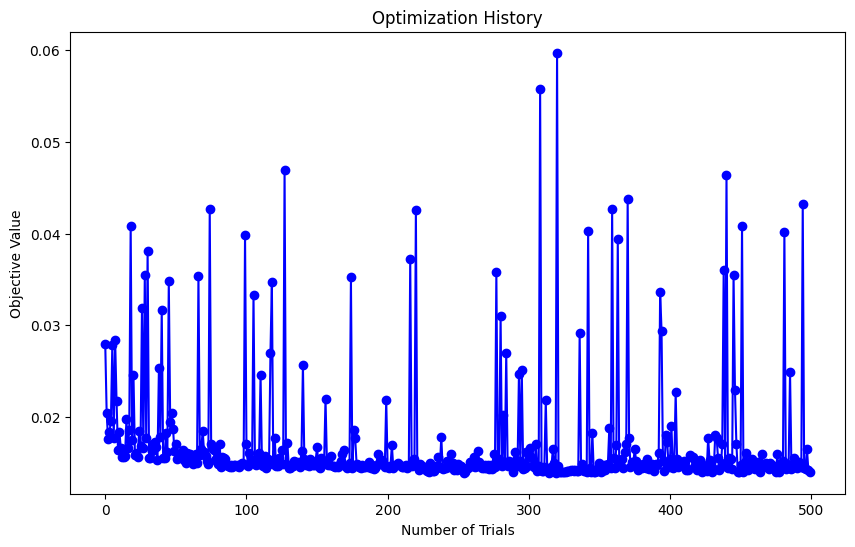

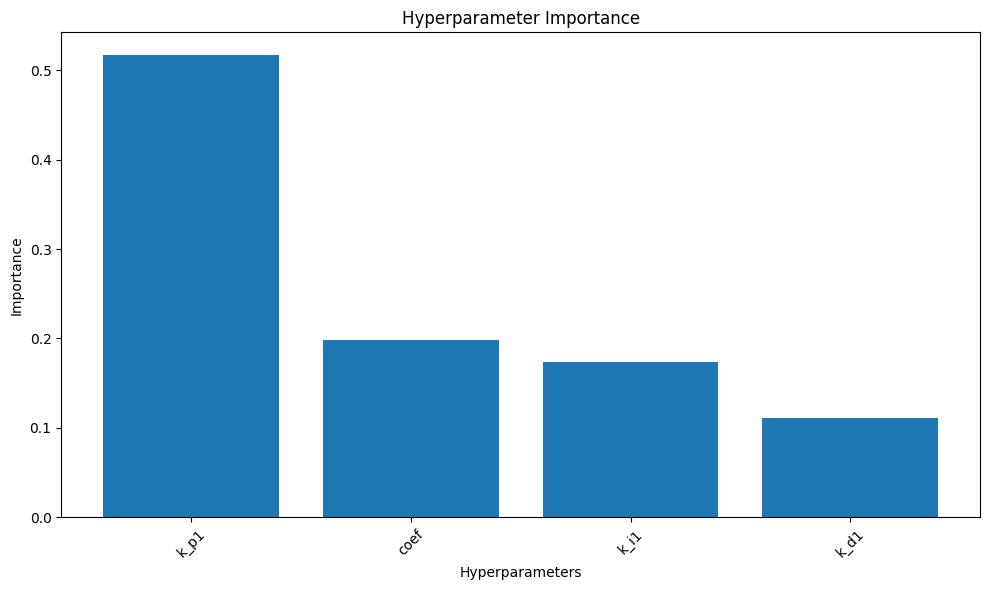

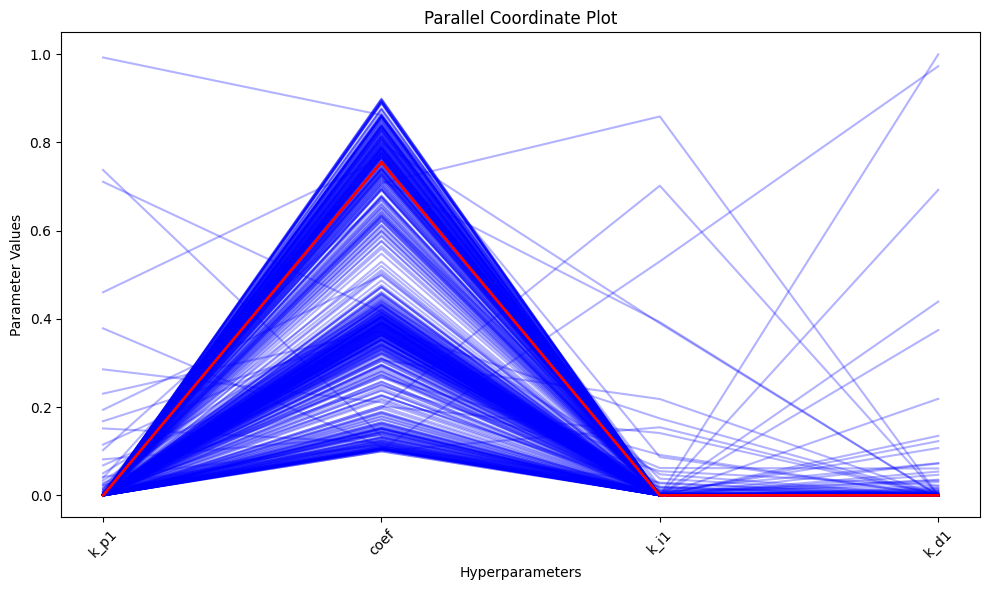

In [379]:
# Optimization history plot
plt.figure(figsize=(10, 6))
plt.plot([t.number for t in study_ta_pid.trials], [t.value for t in study_ta_pid.trials], 'bo-')
plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History')
plt.show()

# Feature importtance plot
if study_ta_pid.best_trial is not None:
    importances = optuna.importance.get_param_importances(study_ta_pid)
    importance_values = list(importances.values())
    param_names = list(importances.keys())

    plt.figure(figsize=(10, 6))
    plt.bar(param_names, importance_values)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Importance')
    plt.title('Hyperparameter Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Parallel coordinate plot
if study_ta_pid.best_trial is not None:
    fig, ax = plt.subplots(figsize=(10, 6))
    params = [t.params for t in study_ta_pid.trials if t.state == optuna.trial.TrialState.COMPLETE]
    for param in params:
        values = [param[name] for name in param_names]
        ax.plot(param_names, values, 'b-', alpha=0.3)
    best_params = study_ta_pid.best_trial.params
    best_values = [best_params[name] for name in param_names]
    ax.plot(param_names, best_values, 'r-', linewidth=2)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Parameter Values')
    plt.title('Parallel Coordinate Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## M-PID Bidder

In [7]:
def objective_mpid(trial, metric='RMSE_T', auction_mode='FPA'):
    k_p1 = trial.suggest_float('k_p1', 1e-4, 1, log=True)
    k_p2 = trial.suggest_float('k_p2', 1e-4, 1, log=True)
    k_i1 = trial.suggest_float('k_i1', 1e-4, 1, log=True)
    k_i2 = trial.suggest_float('k_i2', 1e-4, 1, log=True)
    k_d1 = trial.suggest_float('k_d1', 1e-4, 1, log=True)
    k_d2 = trial.suggest_float('k_d2', 1e-4, 1, log=True)
    alpha = trial.suggest_float('alpha', 0.1, 0.9, log=True)
    beta = trial.suggest_float('beta', 0.1, 0.9, log=True)
    coef = trial.suggest_float('coef', 0.1, 0.9, log=True) # Cold start coefficient
    lower_clip = trial.suggest_float('lower_clip', 0.1, 0.9, log=True)
    upper_clip = trial.suggest_float('upper_clip', 1.5, 10, log=True)
    bid_factor = trial.suggest_float('bid_factor', 0.5, 20.0, log=True)
    #temp_constr = trial.suggest_int('temp_constr', 1, 20)
    temp_coef = 1.0#trial.suggest_int('temp_coef', 1, 100, log=True)
    
    k_dict = {
        'k_p': (k_p1, k_p2),
        'k_i': (k_i1, k_i2),
        'k_d': (k_d1, k_d2)
    }
   
    res = autobidder_check(
        bidder=MPIDBidder,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            "k_dict": k_dict, 
            "correction": [alpha, beta],
            'cold_start_coef': coef,
            'lower_clip': lower_clip, 
            'upper_clip': upper_clip, 
            'bid_factor': bid_factor,
            #'temp_constr': temp_constr,
            'temp_coef': temp_coef},
        auction_mode=auction_mode,
    )
    print(f"rel_cpc: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[2, 0] = min(best_metrics[2, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[2, 1] = min(best_metrics[2, 1], res['score'][0])
        return res['score'][0]
    elif metric == 'weighted_sum':
        best_metrics[2, 2] = min(best_metrics[2, 2], res['score'][2])
        return res['score'][2]

def opt_search_mpid(n_trials, metric='RMSE_T', auction_mode='FPA'):
    # if metric == 'RMSE_T':
    study = optuna.create_study(direction='maximize' if metric == 'MCR' else 'minimize')
    # elif metric == 'MCR':
    #     study = optuna.create_study(direction='maximize')
    study.optimize(partial(objective_mpid, metric=metric, auction_mode=auction_mode), n_trials=n_trials, n_jobs=1)

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/m_pid_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [28]:
def objective_mpid(trial, metric='RMSE_T', auction_mode='FPA'):
    k_p1 = trial.suggest_float('k_p1', 1e-4, 1, log=True)
    k_p2 = trial.suggest_float('k_p2', 1e-4, 1, log=True)
    k_i1 = trial.suggest_float('k_i1', 1e-4, 1, log=True)
    k_i2 = trial.suggest_float('k_i2', 1e-4, 1, log=True)
    k_d1 = trial.suggest_float('k_d1', 1e-4, 1, log=True)
    k_d2 = trial.suggest_float('k_d2', 1e-4, 1, log=True)
    alpha = trial.suggest_float('alpha', 0.1, 0.9, log=True)
    beta = trial.suggest_float('beta', 0.1, 0.9, log=True)
    coef = trial.suggest_float('coef', 0.1, 0.9, log=True) # Cold start coefficient
    lower_clip = trial.suggest_float('lower_clip', 0.1, 0.9, log=True)
    upper_clip = trial.suggest_float('upper_clip', 1.5, 10, log=True)
    bid_factor = trial.suggest_float('bid_factor', 0.5, 20.0, log=True)
    
    k_dict = {
        'k_p': (k_p1, k_p2),
        'k_i': (k_i1, k_i2),
        'k_d': (k_d1, k_d2)
    }
   
    res = autobidder_check(
        bidder=MPIDBidder,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            "k_dict": k_dict, 
            "correction": [alpha, beta],
            'cold_start_coef': coef,
            'lower_clip': lower_clip, 
            'upper_clip': upper_clip, 
            'bid_factor': bid_factor},
        auction_mode=auction_mode,
    )
    
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    
    if metric == 'RMSE_T':
        best_metrics[2, 0] = min(best_metrics[2, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
       
        
        best_metrics[2, 1] = min(best_metrics[2, 1], res['score'][0])
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[2, 2] = max(best_metrics[2, 2], res['score'][2])
        return res['score'][2]

def opt_search_mpid(n_trials, metric='RMSE_T', auction_mode='FPA'):
    # if metric == 'RMSE_T':
    study = optuna.create_study(direction='maximize' if (metric == 'MCR') else 'minimize')
    # elif metric == 'MCR':
    #     study = optuna.create_study(direction='maximize')
    study.optimize(partial(objective_mpid, metric=metric, auction_mode=auction_mode), n_trials=n_trials, n_jobs=6)

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/m_pid_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [8]:
n = 10
metric = 'CPC_REL' # for Mean Click Ratio use 'MCR'
study_m_pid = opt_search_mpid(n, metric, auction_mode)

[I 2024-10-14 14:14:33,129] A new study created in memory with name: no-name-0f780d7e-c336-494a-a128-d02f80284436
[I 2024-10-14 14:14:46,768] Trial 0 finished with value: 50.60572550962387 and parameters: {'k_p1': 0.12598160699898453, 'k_p2': 0.03293744046111927, 'k_i1': 0.021084120731162392, 'k_i2': 0.003849760094231669, 'k_d1': 0.40485527181183867, 'k_d2': 0.05996953825179657, 'alpha': 0.20157953895072778, 'beta': 0.16006208467788774, 'coef': 0.14068042081141754, 'lower_clip': 0.4929629282967065, 'upper_clip': 5.441906582698266, 'bid_factor': 0.6400719709644205}. Best is trial 0 with value: 50.60572550962387.


rel_cpc: 50.60572550962387, rmse: 1.2510704336242096, SCR: 46541.943788698336


[I 2024-10-14 14:15:00,547] Trial 1 finished with value: 137.9840103061512 and parameters: {'k_p1': 0.0046028346376995564, 'k_p2': 0.06724585393837602, 'k_i1': 0.044395682440040475, 'k_i2': 0.09414290770755769, 'k_d1': 0.0033304547701516764, 'k_d2': 0.32210423495482854, 'alpha': 0.8950379790251143, 'beta': 0.6246245480248774, 'coef': 0.8442639089536227, 'lower_clip': 0.5773463965868018, 'upper_clip': 5.113299206368791, 'bid_factor': 0.5199016058462699}. Best is trial 0 with value: 50.60572550962387.


rel_cpc: 137.9840103061512, rmse: 1.6487954398018567, SCR: 51344.76273867269


[I 2024-10-14 14:15:14,549] Trial 2 finished with value: 29.285043280634724 and parameters: {'k_p1': 0.0008339066782922299, 'k_p2': 0.0003099341927711804, 'k_i1': 0.012404251444306206, 'k_i2': 0.0005402877286948463, 'k_d1': 0.001424375676326399, 'k_d2': 0.29094125402183163, 'alpha': 0.6168331966342553, 'beta': 0.3541852206958632, 'coef': 0.14559702116134432, 'lower_clip': 0.39596389637071033, 'upper_clip': 3.596229114376755, 'bid_factor': 1.1690681296991081}. Best is trial 2 with value: 29.285043280634724.


rel_cpc: 29.285043280634724, rmse: 1.2152597295882077, SCR: 45217.54735137418


[I 2024-10-14 14:15:28,446] Trial 3 finished with value: 6.327965020063227 and parameters: {'k_p1': 0.0014040589544241327, 'k_p2': 0.0016991135343600086, 'k_i1': 0.000808989124398853, 'k_i2': 0.061525789689097714, 'k_d1': 0.3224561471559211, 'k_d2': 0.5513559128891596, 'alpha': 0.5044321685247397, 'beta': 0.22719243112346083, 'coef': 0.45567485761154836, 'lower_clip': 0.42428359906566376, 'upper_clip': 1.9276946472331569, 'bid_factor': 0.9723586228366198}. Best is trial 3 with value: 6.327965020063227.


rel_cpc: 6.327965020063227, rmse: 1.2058642644402275, SCR: 44368.08808927443


[I 2024-10-14 14:15:41,872] Trial 4 finished with value: 105.53801339553715 and parameters: {'k_p1': 0.0019759692249056923, 'k_p2': 0.0005966132676648557, 'k_i1': 0.414817953160908, 'k_i2': 0.00841829954547931, 'k_d1': 0.1399086580730842, 'k_d2': 0.0006244501700327556, 'alpha': 0.40923662340247396, 'beta': 0.22781367166496028, 'coef': 0.12999292402427862, 'lower_clip': 0.4042831940683006, 'upper_clip': 7.134156775094574, 'bid_factor': 6.011185553020098}. Best is trial 3 with value: 6.327965020063227.


rel_cpc: 105.53801339553715, rmse: 1.4107895861222957, SCR: 60434.063959211795


[I 2024-10-14 14:15:55,398] Trial 5 finished with value: 91.87168741081344 and parameters: {'k_p1': 0.0002466674269936054, 'k_p2': 0.00026694360768150376, 'k_i1': 0.039913152680135004, 'k_i2': 0.005168479968449941, 'k_d1': 0.0006636121606541313, 'k_d2': 0.30322306848631553, 'alpha': 0.767858490192599, 'beta': 0.15411014652981744, 'coef': 0.12316732982195643, 'lower_clip': 0.24874732550006126, 'upper_clip': 9.019383581615871, 'bid_factor': 3.809812421885662}. Best is trial 3 with value: 6.327965020063227.


rel_cpc: 91.87168741081344, rmse: 1.3533406724726114, SCR: 52021.12423278503


[I 2024-10-14 14:16:08,788] Trial 6 finished with value: 115.3939619085077 and parameters: {'k_p1': 0.0025589435354598455, 'k_p2': 0.00031046499865453406, 'k_i1': 0.2231469388047881, 'k_i2': 0.0814254194863285, 'k_d1': 0.02251400730868266, 'k_d2': 0.060603010517875304, 'alpha': 0.24641648958290663, 'beta': 0.2324384376969906, 'coef': 0.19738110707805026, 'lower_clip': 0.11051144758765138, 'upper_clip': 8.24209873832969, 'bid_factor': 12.098330569795719}. Best is trial 3 with value: 6.327965020063227.


rel_cpc: 115.3939619085077, rmse: 1.5617553768264718, SCR: 56698.90147085993


[I 2024-10-14 14:16:22,443] Trial 7 finished with value: 4.981301008203689 and parameters: {'k_p1': 0.011135366553120002, 'k_p2': 0.0007823390915548164, 'k_i1': 0.000119739940144431, 'k_i2': 0.19475098818131276, 'k_d1': 0.005164526390950937, 'k_d2': 0.0015225252621685692, 'alpha': 0.1510712190668432, 'beta': 0.39883855692936354, 'coef': 0.3914283288815737, 'lower_clip': 0.5851127050531798, 'upper_clip': 9.365073860000281, 'bid_factor': 1.49981946834387}. Best is trial 7 with value: 4.981301008203689.


rel_cpc: 4.981301008203689, rmse: 1.208266225210791, SCR: 43686.10847307465


[I 2024-10-14 14:16:36,113] Trial 8 finished with value: 6.868603800573815 and parameters: {'k_p1': 0.005195148451013364, 'k_p2': 0.00018276597197486755, 'k_i1': 0.0012464499822455982, 'k_i2': 0.0009270847628208698, 'k_d1': 0.016908169672229214, 'k_d2': 0.00016781183194860272, 'alpha': 0.6476883247703791, 'beta': 0.23597009697971655, 'coef': 0.1489370398817393, 'lower_clip': 0.7095717932031976, 'upper_clip': 7.3483971689088134, 'bid_factor': 4.302725202613323}. Best is trial 7 with value: 4.981301008203689.


rel_cpc: 6.868603800573815, rmse: 1.2071326290990634, SCR: 43775.62626666215


[I 2024-10-14 14:16:49,863] Trial 9 finished with value: 9.603176155825263 and parameters: {'k_p1': 0.07807217260610352, 'k_p2': 0.08588437002311364, 'k_i1': 0.00024709800344133956, 'k_i2': 0.0003747970006705423, 'k_d1': 0.0005195539133579387, 'k_d2': 0.34043154649274615, 'alpha': 0.4059444607144425, 'beta': 0.18367896605236964, 'coef': 0.7245166624232956, 'lower_clip': 0.20695910725450992, 'upper_clip': 1.7575863824427171, 'bid_factor': 3.784110989972625}. Best is trial 7 with value: 4.981301008203689.


rel_cpc: 9.603176155825263, rmse: 1.2027125981570024, SCR: 45599.627653856536
Best trial:
  Value: 4.981301008203689
  Params: 
    k_p1: 0.011135366553120002
    k_p2: 0.0007823390915548164
    k_i1: 0.000119739940144431
    k_i2: 0.19475098818131276
    k_d1: 0.005164526390950937
    k_d2: 0.0015225252621685692
    alpha: 0.1510712190668432
    beta: 0.39883855692936354
    coef: 0.3914283288815737
    lower_clip: 0.5851127050531798
    upper_clip: 9.365073860000281
    bid_factor: 1.49981946834387


In [29]:
n = 50
metric = 'MCR' # for Mean Click Ratio use 'MCR'
study_m_pid = opt_search_mpid(n, metric, auction_mode)

[I 2024-10-13 18:43:58,926] A new study created in memory with name: no-name-6f0cda74-87b8-4ad8-8157-3a0ef62a15a1
[I 2024-10-13 18:45:16,588] Trial 0 finished with value: 21100.388525503895 and parameters: {'k_p1': 0.0006077242783077949, 'k_p2': 0.5864205066903989, 'k_i1': 0.005470423713358929, 'k_i2': 0.18743806703806268, 'k_d1': 0.565843856801594, 'k_d2': 0.003815975407733345, 'alpha': 0.12865541813934042, 'beta': 0.6936541753538672, 'coef': 0.46644734238289837, 'lower_clip': 0.6980647703411407, 'upper_clip': 8.705105510886861, 'bid_factor': 13.948625314855606}. Best is trial 0 with value: 21100.388525503895.


CPC_REL: 15.272811662046454, rmse: 4.974106460665588, SCR: 21100.388525503895


[I 2024-10-13 18:45:22,309] Trial 3 finished with value: 30246.086177083835 and parameters: {'k_p1': 0.36695977215744535, 'k_p2': 0.04467540250482988, 'k_i1': 0.29918538778622983, 'k_i2': 0.020467799157794547, 'k_d1': 0.8312883850829026, 'k_d2': 0.004095263300628544, 'alpha': 0.11823495977975414, 'beta': 0.3658918045611427, 'coef': 0.503064062630621, 'lower_clip': 0.16076357484933618, 'upper_clip': 4.050182904631827, 'bid_factor': 6.143515455559404}. Best is trial 3 with value: 30246.086177083835.


CPC_REL: 14.428423079018337, rmse: 5.527402486576775, SCR: 30246.086177083835


[I 2024-10-13 18:45:33,216] Trial 4 finished with value: 62029.371552813136 and parameters: {'k_p1': 0.4841707305410945, 'k_p2': 0.020369994676539396, 'k_i1': 0.08434530346841242, 'k_i2': 0.0014411137423370026, 'k_d1': 0.007777215127844153, 'k_d2': 0.009370959417056348, 'alpha': 0.25914678274471625, 'beta': 0.30442600496784217, 'coef': 0.11127007294235458, 'lower_clip': 0.440564960970842, 'upper_clip': 3.719915854685559, 'bid_factor': 1.099657605266549}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.265215129625245, rmse: 1.4272782859563602, SCR: 62029.371552813136


[I 2024-10-13 18:45:33,651] Trial 1 finished with value: 39064.63003588282 and parameters: {'k_p1': 0.05057736220126346, 'k_p2': 0.10036722310408139, 'k_i1': 0.013502886402838228, 'k_i2': 0.0012870841688812596, 'k_d1': 0.013409896391172745, 'k_d2': 0.2206060882414497, 'alpha': 0.4113799592308402, 'beta': 0.7309543978000745, 'coef': 0.17900109902292838, 'lower_clip': 0.43141068479945527, 'upper_clip': 8.68599021237896, 'bid_factor': 3.4042532179078067}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.232371125221352, rmse: 2.2548355141544993, SCR: 39064.63003588282


[I 2024-10-13 18:45:35,532] Trial 5 finished with value: 55293.36276810374 and parameters: {'k_p1': 0.1964094745729649, 'k_p2': 0.00520044466520402, 'k_i1': 0.020457616232797026, 'k_i2': 0.006098724988079605, 'k_d1': 0.16332327492952137, 'k_d2': 0.0003519020614557314, 'alpha': 0.5574229798006499, 'beta': 0.11205905441600664, 'coef': 0.1436943663423037, 'lower_clip': 0.23178063758583867, 'upper_clip': 2.9612570832268648, 'bid_factor': 4.000383758186963}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.152784971739383, rmse: 1.5688516287467427, SCR: 55293.36276810374


[I 2024-10-13 18:45:36,907] Trial 2 finished with value: 58659.833083335776 and parameters: {'k_p1': 0.007493114263563793, 'k_p2': 0.005493375190131807, 'k_i1': 0.00037541471453751804, 'k_i2': 0.0006502590089637531, 'k_d1': 0.0005394334104400018, 'k_d2': 0.06975104583796318, 'alpha': 0.2254697614898964, 'beta': 0.21693297592086902, 'coef': 0.10621161263841924, 'lower_clip': 0.24122902028434962, 'upper_clip': 3.6128578175472374, 'bid_factor': 1.4624467084664956}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 2.765028161222982, rmse: 1.3751386205288274, SCR: 58659.833083335776


[I 2024-10-13 18:46:36,858] Trial 6 finished with value: 28847.620010582345 and parameters: {'k_p1': 0.2608519974682168, 'k_p2': 0.01461375275553185, 'k_i1': 0.0029116879355488233, 'k_i2': 0.0008417467550175646, 'k_d1': 0.00016915932798154036, 'k_d2': 0.14010383195083706, 'alpha': 0.5015629957942529, 'beta': 0.4399955146731043, 'coef': 0.3608780788052154, 'lower_clip': 0.6625736779079405, 'upper_clip': 5.42218092539865, 'bid_factor': 0.9025888454880902}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 14.927546716576998, rmse: 3.2388531297446135, SCR: 28847.620010582345


[I 2024-10-13 18:46:46,314] Trial 8 finished with value: 27677.360421414945 and parameters: {'k_p1': 0.038760634495317574, 'k_p2': 0.04688203923560326, 'k_i1': 0.00020868798411951577, 'k_i2': 0.012251661709409107, 'k_d1': 0.48533823875294085, 'k_d2': 0.00019371045308022163, 'alpha': 0.10367671870740447, 'beta': 0.22265632953492243, 'coef': 0.45971900402601423, 'lower_clip': 0.47135435645390444, 'upper_clip': 1.7070700933106413, 'bid_factor': 15.110124395587011}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 13.333977666732753, rmse: 4.228336926572759, SCR: 27677.360421414945


[I 2024-10-13 18:46:47,350] Trial 7 finished with value: 34276.84928115428 and parameters: {'k_p1': 0.0018201990444662432, 'k_p2': 0.0035448446311700005, 'k_i1': 0.0017187753168850007, 'k_i2': 0.00039527502377049837, 'k_d1': 0.20522767447411555, 'k_d2': 0.0007230906038885014, 'alpha': 0.7490051243849072, 'beta': 0.1183655825601284, 'coef': 0.3308513824324685, 'lower_clip': 0.4148294281425394, 'upper_clip': 1.8141518642332968, 'bid_factor': 19.680360105497375}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 9.534063233650729, rmse: 2.60422434226456, SCR: 34276.84928115428


[I 2024-10-13 18:46:49,408] Trial 10 finished with value: 26129.084165090833 and parameters: {'k_p1': 0.1553675442471278, 'k_p2': 0.05462734991105059, 'k_i1': 0.08676282762541818, 'k_i2': 0.004704310216823578, 'k_d1': 0.05587608423261838, 'k_d2': 0.05010265597730655, 'alpha': 0.231680339718979, 'beta': 0.703949994824965, 'coef': 0.7999188078812898, 'lower_clip': 0.17168104789582303, 'upper_clip': 1.5594751029909357, 'bid_factor': 9.380087950387495}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 16.22026837557891, rmse: 7.592358741781239, SCR: 26129.084165090833


[I 2024-10-13 18:46:55,465] Trial 11 finished with value: 33245.071041036615 and parameters: {'k_p1': 0.0036923162701999524, 'k_p2': 0.0004119000676975324, 'k_i1': 0.002083030382967178, 'k_i2': 0.0017973075574728924, 'k_d1': 0.021770844741439456, 'k_d2': 0.001081693091641268, 'alpha': 0.12575612245432, 'beta': 0.8386221999650872, 'coef': 0.6134629859710511, 'lower_clip': 0.2787795217331546, 'upper_clip': 1.6542873219526233, 'bid_factor': 6.798458678671534}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 9.436593719876631, rmse: 4.687994950022129, SCR: 33245.071041036615


[I 2024-10-13 18:47:07,610] Trial 9 finished with value: 42004.910291924534 and parameters: {'k_p1': 0.14339882147950894, 'k_p2': 0.03063875336851203, 'k_i1': 0.023718290498492386, 'k_i2': 0.0009504231175090956, 'k_d1': 0.3253442329070403, 'k_d2': 0.760356513930295, 'alpha': 0.22533816424891817, 'beta': 0.3508713506728038, 'coef': 0.1041370536201636, 'lower_clip': 0.7884388370194509, 'upper_clip': 2.1442418189481613, 'bid_factor': 1.943038390775736}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.8968151924099, rmse: 1.539989196106449, SCR: 42004.910291924534


[I 2024-10-13 18:47:54,113] Trial 13 finished with value: 21022.68914754283 and parameters: {'k_p1': 0.13158740879254432, 'k_p2': 0.04131557965380651, 'k_i1': 0.00036912173265429024, 'k_i2': 0.11341284147042685, 'k_d1': 0.04512749139205065, 'k_d2': 0.039782010424000654, 'alpha': 0.28738411677825904, 'beta': 0.16040730261778613, 'coef': 0.833012611480048, 'lower_clip': 0.31598645754664956, 'upper_clip': 3.6013116148887123, 'bid_factor': 3.8184303693242843}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 17.26809298773983, rmse: 8.951872762296532, SCR: 21022.68914754283


[I 2024-10-13 18:48:01,065] Trial 12 finished with value: 30045.15676794065 and parameters: {'k_p1': 0.00026764139381195087, 'k_p2': 0.08726081135233213, 'k_i1': 0.004692778801064349, 'k_i2': 0.0016968715148658687, 'k_d1': 0.0009587746987328158, 'k_d2': 0.2820297983608531, 'alpha': 0.5949091870048163, 'beta': 0.173118646537043, 'coef': 0.26173525608062514, 'lower_clip': 0.7344829004910718, 'upper_clip': 1.5814018364721962, 'bid_factor': 6.093682814937049}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 13.824910318314076, rmse: 2.7476062305627935, SCR: 30045.15676794065


[I 2024-10-13 18:48:13,596] Trial 14 finished with value: 32565.157932093647 and parameters: {'k_p1': 0.6570629673014226, 'k_p2': 0.9737224591674141, 'k_i1': 0.35975108866525796, 'k_i2': 0.2809287481165733, 'k_d1': 0.0006112713187918352, 'k_d2': 0.0002831293407847667, 'alpha': 0.2741006173564738, 'beta': 0.530753657967898, 'coef': 0.1653585547844438, 'lower_clip': 0.7890301544110921, 'upper_clip': 2.2802994041072147, 'bid_factor': 4.842993249562184}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 12.90739474904332, rmse: 2.126860854023764, SCR: 32565.157932093647


[I 2024-10-13 18:48:25,724] Trial 16 finished with value: 45997.00801160782 and parameters: {'k_p1': 0.00013921627167543237, 'k_p2': 0.0008659533061266684, 'k_i1': 0.0001020344180852199, 'k_i2': 0.7259488301620941, 'k_d1': 0.0013213061867663502, 'k_d2': 0.023463925586025586, 'alpha': 0.2409231226140234, 'beta': 0.2154968903757924, 'coef': 0.11085717876177066, 'lower_clip': 0.1190288635358348, 'upper_clip': 3.160770593927235, 'bid_factor': 1.082438469786434}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.184527034443406, rmse: 1.742592408862932, SCR: 45997.00801160782


[I 2024-10-13 18:48:26,153] Trial 15 finished with value: 55306.76336027363 and parameters: {'k_p1': 0.9188528751213462, 'k_p2': 0.00016865794035883473, 'k_i1': 0.7301279482756466, 'k_i2': 0.00016052172045463763, 'k_d1': 0.002096719490830676, 'k_d2': 0.7295097810037201, 'alpha': 0.29761201614705113, 'beta': 0.22040385648697505, 'coef': 0.2145677623862852, 'lower_clip': 0.11589957009985859, 'upper_clip': 2.473427653186984, 'bid_factor': 0.5374364717126611}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.966217404273221, rmse: 2.0152547006763712, SCR: 55306.76336027363


[I 2024-10-13 18:48:58,263] Trial 17 finished with value: 54422.91216854076 and parameters: {'k_p1': 0.0001299666782854347, 'k_p2': 0.0010925509323017988, 'k_i1': 0.00010994398083443006, 'k_i2': 0.0001425697986349124, 'k_d1': 0.001045180760498213, 'k_d2': 0.022603755963907946, 'alpha': 0.2699925814449448, 'beta': 0.22810828548425452, 'coef': 0.19663141826316505, 'lower_clip': 0.10421286762031684, 'upper_clip': 3.961155595531783, 'bid_factor': 0.5769541873894602}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 3.0140021044629672, rmse: 1.6117318074381306, SCR: 54422.91216854076


[I 2024-10-13 18:49:31,411] Trial 18 finished with value: 57703.01919626067 and parameters: {'k_p1': 0.01518700776648107, 'k_p2': 0.0011128814246050196, 'k_i1': 0.7549915371853331, 'k_i2': 0.00010752503619775267, 'k_d1': 0.0013929111771435014, 'k_d2': 0.015832090502895895, 'alpha': 0.17516617075742014, 'beta': 0.23263878227859164, 'coef': 0.18512917000747992, 'lower_clip': 0.12879029339960613, 'upper_clip': 4.992663620655534, 'bid_factor': 0.8805384309671435}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.676472949021115, rmse: 1.9512488751434451, SCR: 57703.01919626067


[I 2024-10-13 18:49:48,994] Trial 19 finished with value: 61880.68092338086 and parameters: {'k_p1': 0.012657866227148193, 'k_p2': 0.0011131620932314822, 'k_i1': 0.9434584856325808, 'k_i2': 0.0001066753676586081, 'k_d1': 0.002203620291138901, 'k_d2': 0.018389715473486844, 'alpha': 0.17337960029754987, 'beta': 0.24554611980320154, 'coef': 0.1045561126209999, 'lower_clip': 0.10546865126788761, 'upper_clip': 5.564603697959175, 'bid_factor': 0.5239799631181277}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 10.150175036068037, rmse: 1.4871304426074152, SCR: 61880.68092338086


[I 2024-10-13 18:50:01,828] Trial 21 finished with value: 52701.41985463944 and parameters: {'k_p1': 0.014064293795507155, 'k_p2': 0.001969559084735816, 'k_i1': 0.1250316342951352, 'k_i2': 0.00018238421116998098, 'k_d1': 0.00399742249734448, 'k_d2': 0.008537368984856327, 'alpha': 0.17485817171819584, 'beta': 0.2558674174872487, 'coef': 0.2360399383694617, 'lower_clip': 0.21845362200395135, 'upper_clip': 4.862848095278203, 'bid_factor': 0.5511771618451529}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.879386126629814, rmse: 2.0481021153762726, SCR: 52701.41985463944


[I 2024-10-13 18:50:02,537] Trial 20 finished with value: 53726.81416210714 and parameters: {'k_p1': 0.013520670603166843, 'k_p2': 0.0011672663221181567, 'k_i1': 0.07938860377682112, 'k_i2': 0.00010180070555378777, 'k_d1': 0.0030101092432840196, 'k_d2': 0.0153426223170306, 'alpha': 0.18522746302338897, 'beta': 0.24199092356128962, 'coef': 0.11061517937764169, 'lower_clip': 0.1008858671688149, 'upper_clip': 5.344194164429445, 'bid_factor': 0.5744370650312467}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 8.20089733019913, rmse: 1.4358884588880725, SCR: 53726.81416210714


[I 2024-10-13 18:50:11,941] Trial 22 finished with value: 60757.49121862713 and parameters: {'k_p1': 0.008118240565809854, 'k_p2': 0.0017888076754270458, 'k_i1': 0.11188559817265434, 'k_i2': 0.00013095220021489627, 'k_d1': 0.004439642756074949, 'k_d2': 0.010540771080630089, 'alpha': 0.17843206691524427, 'beta': 0.3023246348438455, 'coef': 0.12594045570320786, 'lower_clip': 0.19977746855001569, 'upper_clip': 5.01015285239051, 'bid_factor': 1.9077415439913215}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 9.59105265425043, rmse: 1.4456364069049328, SCR: 60757.49121862713


[I 2024-10-13 18:50:39,836] Trial 23 finished with value: 45196.673246388484 and parameters: {'k_p1': 0.009975292980786003, 'k_p2': 0.22785124991855946, 'k_i1': 0.06916612561522986, 'k_i2': 0.030856756036055467, 'k_d1': 0.0052145598146272135, 'k_d2': 0.0059544759387637515, 'alpha': 0.1737862408518411, 'beta': 0.2902881403136214, 'coef': 0.12797894236710827, 'lower_clip': 0.5308778774513656, 'upper_clip': 5.169381086162354, 'bid_factor': 2.065141438093092}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.245051035810839, rmse: 1.8244805166381848, SCR: 45196.673246388484


[I 2024-10-13 18:51:00,828] Trial 24 finished with value: 43169.52732379631 and parameters: {'k_p1': 0.004925148141604138, 'k_p2': 0.24485351888494855, 'k_i1': 0.06045984991415968, 'k_i2': 0.052522559647634574, 'k_d1': 0.006330029397842671, 'k_d2': 0.007115761100641772, 'alpha': 0.173600958119715, 'beta': 0.3135049699512849, 'coef': 0.1284090067164421, 'lower_clip': 0.5458298728780735, 'upper_clip': 6.114823762728314, 'bid_factor': 1.996967082722804}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.158441251229352, rmse: 1.8464672119559329, SCR: 43169.52732379631


[I 2024-10-13 18:51:26,100] Trial 25 finished with value: 43378.96193802467 and parameters: {'k_p1': 0.03648475162694789, 'k_p2': 0.21482055715082826, 'k_i1': 0.07291892328503484, 'k_i2': 0.03152875369672627, 'k_d1': 0.006544940045973251, 'k_d2': 0.004998191063882116, 'alpha': 0.15654591063836826, 'beta': 0.3046663401727428, 'coef': 0.13461598213279952, 'lower_clip': 0.5442877808404273, 'upper_clip': 6.485774092408952, 'bid_factor': 2.239821889629524}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.409726054373635, rmse: 1.8759795915982576, SCR: 43378.96193802467


[I 2024-10-13 18:51:36,368] Trial 26 finished with value: 51313.58679994695 and parameters: {'k_p1': 0.0038655603961264577, 'k_p2': 0.009497174780745717, 'k_i1': 0.051468364420723015, 'k_i2': 0.0004877502889405071, 'k_d1': 0.00022399926003274196, 'k_d2': 0.10755778631602173, 'alpha': 0.18063999123007207, 'beta': 0.33052760707256434, 'coef': 0.13197993116027426, 'lower_clip': 0.5327577550155519, 'upper_clip': 6.439385397339291, 'bid_factor': 2.1396935675126905}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 9.869734500638224, rmse: 1.5553105198588733, SCR: 51313.58679994695


[I 2024-10-13 18:51:46,732] Trial 27 finished with value: 59039.886112401815 and parameters: {'k_p1': 0.004768698033038951, 'k_p2': 0.010118293798239308, 'k_i1': 0.0008083271860342998, 'k_i2': 0.0005149981849507623, 'k_d1': 0.00030896393890171895, 'k_d2': 0.07394174903262381, 'alpha': 0.36356938529074734, 'beta': 0.3124036931777659, 'coef': 0.13305921297668163, 'lower_clip': 0.35364565686919647, 'upper_clip': 6.77327538831957, 'bid_factor': 1.9687859361775737}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 4.6920606477352536, rmse: 1.6072677779139313, SCR: 59039.886112401815


[I 2024-10-13 18:51:51,443] Trial 28 finished with value: 49707.67468980278 and parameters: {'k_p1': 0.0010405808203102645, 'k_p2': 0.011603729627531966, 'k_i1': 0.0492553640612829, 'k_i2': 0.00029666986277007625, 'k_d1': 0.007119791241095568, 'k_d2': 0.003594625398347603, 'alpha': 0.36875579965264055, 'beta': 0.3153425847802732, 'coef': 0.13687038663128098, 'lower_clip': 0.5522657268453379, 'upper_clip': 6.876471791194088, 'bid_factor': 2.0022358839411756}. Best is trial 4 with value: 62029.371552813136.


CPC_REL: 11.085911007253461, rmse: 1.4705521716318655, SCR: 49707.67468980278


[I 2024-10-13 18:52:29,836] Trial 29 finished with value: 62921.74115809095 and parameters: {'k_p1': 0.0018519399338158197, 'k_p2': 0.012524990353640738, 'k_i1': 0.21776323370691616, 'k_i2': 0.0003784173435184411, 'k_d1': 0.00771239475024793, 'k_d2': 0.0020343218169880067, 'alpha': 0.3928502142599227, 'beta': 0.3434934080850935, 'coef': 0.14128924640412127, 'lower_clip': 0.34438805610749607, 'upper_clip': 6.749319332968525, 'bid_factor': 2.41332326863918}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 11.412313292957268, rmse: 1.5573993360394067, SCR: 62921.74115809095


[I 2024-10-13 18:52:36,453] Trial 30 finished with value: 59393.828290278994 and parameters: {'k_p1': 0.001461701990639094, 'k_p2': 0.011755427116529988, 'k_i1': 0.20981787340886437, 'k_i2': 0.0003032333433630018, 'k_d1': 0.012057883841367547, 'k_d2': 0.0024618636415924574, 'alpha': 0.3616904836763727, 'beta': 0.4317779941441833, 'coef': 0.1519530091107615, 'lower_clip': 0.35131756828003013, 'upper_clip': 7.152359362718578, 'bid_factor': 1.4082643239567927}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 11.770748417565235, rmse: 1.6110652201098075, SCR: 59393.828290278994


[I 2024-10-13 18:53:12,207] Trial 31 finished with value: 60998.29157581506 and parameters: {'k_p1': 0.0006834067075205495, 'k_p2': 0.013246778407690021, 'k_i1': 0.31460295536695393, 'k_i2': 0.0003482576007888418, 'k_d1': 0.00023142487563684785, 'k_d2': 0.0014220951924124197, 'alpha': 0.3578254391411577, 'beta': 0.45456539118134975, 'coef': 0.1512793667528984, 'lower_clip': 0.339930191826265, 'upper_clip': 6.839370498800601, 'bid_factor': 1.338119687474096}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 11.86714288588233, rmse: 1.657091382710096, SCR: 60998.29157581506


[I 2024-10-13 18:53:14,207] Trial 32 finished with value: 60840.30546682571 and parameters: {'k_p1': 0.000813013049646023, 'k_p2': 0.00034213140215725614, 'k_i1': 0.19320376321081842, 'k_i2': 0.00032484594012887, 'k_d1': 0.017165732489442663, 'k_d2': 0.0018642577287228033, 'alpha': 0.3747342693008851, 'beta': 0.4940482566458311, 'coef': 0.15343974387233045, 'lower_clip': 0.3393785440693342, 'upper_clip': 7.296494799984823, 'bid_factor': 1.4440862733611077}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 11.732518196428813, rmse: 1.6008632654474806, SCR: 60840.30546682571


[I 2024-10-13 18:53:30,743] Trial 33 finished with value: 61092.009516503414 and parameters: {'k_p1': 0.0013956002443063675, 'k_p2': 0.0002682516295103234, 'k_i1': 0.2160605721735205, 'k_i2': 0.0002867997698502305, 'k_d1': 0.014305400002687258, 'k_d2': 0.0019240530070583077, 'alpha': 0.3481463196579301, 'beta': 0.46078652455648, 'coef': 0.15726757258474638, 'lower_clip': 0.1801196282404523, 'upper_clip': 4.514810543762864, 'bid_factor': 1.3286776351209062}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 11.551987493158853, rmse: 1.64091537943302, SCR: 61092.009516503414


[I 2024-10-13 18:53:33,826] Trial 34 finished with value: 60732.80353830086 and parameters: {'k_p1': 0.07730240647359152, 'k_p2': 0.00032317660932265255, 'k_i1': 0.226424885575164, 'k_i2': 0.0037950673881507135, 'k_d1': 0.019429172125794113, 'k_d2': 0.0021242193972886283, 'alpha': 0.1470833619303251, 'beta': 0.4724838128914778, 'coef': 0.16420323143125243, 'lower_clip': 0.17565197062385046, 'upper_clip': 8.102499910456995, 'bid_factor': 1.2845946795843162}. Best is trial 29 with value: 62921.74115809095.


CPC_REL: 12.293638745616038, rmse: 1.6770016725775525, SCR: 60732.80353830086


[I 2024-10-13 18:54:13,176] Trial 36 finished with value: 65237.64571737967 and parameters: {'k_p1': 0.00032742237841904643, 'k_p2': 0.00037914544699876765, 'k_i1': 0.46097849499909277, 'k_i2': 0.0025093150948981746, 'k_d1': 0.030616713403736402, 'k_d2': 0.0014140805166223925, 'alpha': 0.13753978049521634, 'beta': 0.4258264332916391, 'coef': 0.10054990739130873, 'lower_clip': 0.17765790686224966, 'upper_clip': 8.706280054408069, 'bid_factor': 2.8261230696229327}. Best is trial 36 with value: 65237.64571737967.


CPC_REL: 10.226281900119293, rmse: 1.3802631550872615, SCR: 65237.64571737967


[I 2024-10-13 18:54:15,829] Trial 35 finished with value: 56820.801079730925 and parameters: {'k_p1': 0.0015286136021248, 'k_p2': 0.02188073480002275, 'k_i1': 0.23143665513519213, 'k_i2': 0.0031090259853776294, 'k_d1': 0.018232082684844938, 'k_d2': 0.0028733652958640287, 'alpha': 0.34924992740257893, 'beta': 0.4282683396350918, 'coef': 0.1641598731679764, 'lower_clip': 0.35601013651765684, 'upper_clip': 9.603797750911395, 'bid_factor': 1.2219132310107028}. Best is trial 36 with value: 65237.64571737967.


CPC_REL: 11.745832722099548, rmse: 1.781960301268721, SCR: 56820.801079730925


[I 2024-10-13 18:54:51,798] Trial 37 finished with value: 59317.11426471161 and parameters: {'k_p1': 0.00046076537200430277, 'k_p2': 0.02714419991683366, 'k_i1': 0.45500126215202563, 'k_i2': 0.0028611874703925125, 'k_d1': 0.0171057062615899, 'k_d2': 0.0012767776324411658, 'alpha': 0.4440829359145695, 'beta': 0.5738757616634972, 'coef': 0.17202369103266477, 'lower_clip': 0.27609846923476644, 'upper_clip': 8.551719876357215, 'bid_factor': 0.7655872729170723}. Best is trial 36 with value: 65237.64571737967.
[I 2024-10-13 18:54:51,861] Trial 38 finished with value: 65001.30512352746 and parameters: {'k_p1': 0.00047323984891925913, 'k_p2': 0.020907698589693297, 'k_i1': 0.46306320600299816, 'k_i2': 0.0022609202537334245, 'k_d1': 0.02868691801498883, 'k_d2': 0.0001020975541364783, 'alpha': 0.4546575450936038, 'beta': 0.5873204395947829, 'coef': 0.10031381334915065, 'lower_clip': 0.28180459508625594, 'upper_clip': 9.618158595697867, 'bid_factor': 0.828486686713419}. Best is trial 36 with value

CPC_REL: 11.590918331608338, rmse: 2.0140473591531793, SCR: 59317.11426471161
CPC_REL: 10.207374026595364, rmse: 1.4943176581280067, SCR: 65001.30512352746


[I 2024-10-13 18:55:17,250] Trial 39 finished with value: 67715.66785090267 and parameters: {'k_p1': 0.00043507411152682936, 'k_p2': 0.00013556966183110884, 'k_i1': 0.5126891895220563, 'k_i2': 0.003123956659440785, 'k_d1': 0.03360372050495183, 'k_d2': 0.0026986161885711214, 'alpha': 0.49558572263519973, 'beta': 0.6099296434367585, 'coef': 0.1043154523385615, 'lower_clip': 0.14645655533992424, 'upper_clip': 9.811212377645424, 'bid_factor': 2.7732068693732232}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.24536745429767, rmse: 1.5013207858612156, SCR: 67715.66785090267


[I 2024-10-13 18:55:18,952] Trial 40 finished with value: 64243.250683094906 and parameters: {'k_p1': 0.0004704085320768575, 'k_p2': 0.00010159052638030829, 'k_i1': 0.528800410155949, 'k_i2': 0.0025242429518499377, 'k_d1': 0.04543098400172661, 'k_d2': 0.0006560773694813094, 'alpha': 0.45521415099088613, 'beta': 0.5940197918100819, 'coef': 0.1009968181416112, 'lower_clip': 0.2692982372635143, 'upper_clip': 9.48884274192448, 'bid_factor': 2.8912411261248603}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.250670390375081, rmse: 1.4620910438372379, SCR: 64243.250683094906


[I 2024-10-13 18:55:50,485] Trial 41 finished with value: 64353.92015350758 and parameters: {'k_p1': 0.00039575852979730576, 'k_p2': 0.0038231924329996912, 'k_i1': 0.6773333827231516, 'k_i2': 0.002515317081886803, 'k_d1': 0.03278044574180962, 'k_d2': 0.00010444599435678401, 'alpha': 0.14131288186075136, 'beta': 0.3835348859108172, 'coef': 0.10041652458819078, 'lower_clip': 0.1410272107327049, 'upper_clip': 9.476495269753174, 'bid_factor': 0.7234226843043736}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.113845495321339, rmse: 1.4396971855637153, SCR: 64353.92015350758


[I 2024-10-13 18:56:07,274] Trial 42 finished with value: 63670.23956832166 and parameters: {'k_p1': 0.000379469293705179, 'k_p2': 0.00011479636540012389, 'k_i1': 0.5282881553435586, 'k_i2': 0.0023271880197041957, 'k_d1': 0.06173239221533234, 'k_d2': 0.0006584293122677112, 'alpha': 0.13985157229359468, 'beta': 0.5728081886603053, 'coef': 0.10006212515617405, 'lower_clip': 0.14622745750617497, 'upper_clip': 8.559993297560311, 'bid_factor': 2.7264130347347395}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.133228353130697, rmse: 1.421960769000671, SCR: 63670.23956832166


[I 2024-10-13 18:56:26,794] Trial 44 finished with value: 60042.88228702443 and parameters: {'k_p1': 0.0003665649953458078, 'k_p2': 0.0040321414047270205, 'k_i1': 0.02765527822757119, 'k_i2': 0.011623527398841961, 'k_d1': 0.05209430314740669, 'k_d2': 0.0005451530628625476, 'alpha': 0.6614153624328356, 'beta': 0.38836755674009454, 'coef': 0.1168809422764093, 'lower_clip': 0.4267624368014925, 'upper_clip': 7.947244736014113, 'bid_factor': 2.9027158389603493}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.346370099756832, rmse: 1.5037908186136006, SCR: 60042.88228702443


[I 2024-10-13 18:56:38,421] Trial 43 finished with value: 64851.24547145639 and parameters: {'k_p1': 0.0003905007211791464, 'k_p2': 0.004097206548915698, 'k_i1': 0.8250208821578503, 'k_i2': 0.01038689099073552, 'k_d1': 0.04418808277235922, 'k_d2': 0.03244718251988105, 'alpha': 0.1397703959857095, 'beta': 0.18542958630971035, 'coef': 0.10008705191904871, 'lower_clip': 0.14864450487851952, 'upper_clip': 9.965791236276702, 'bid_factor': 2.6897261213801595}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.05867484657525, rmse: 1.4131210101776823, SCR: 64851.24547145639


[I 2024-10-13 18:56:57,263] Trial 45 finished with value: 65982.99370469117 and parameters: {'k_p1': 0.0003591276651031358, 'k_p2': 0.00010438104616782186, 'k_i1': 0.5245928157011037, 'k_i2': 0.011899824284337975, 'k_d1': 0.0629925756464951, 'k_d2': 0.00012615289564567412, 'alpha': 0.6903096725251977, 'beta': 0.38495220969173455, 'coef': 0.12021539253781756, 'lower_clip': 0.14740286370620836, 'upper_clip': 9.957455094599615, 'bid_factor': 2.726612578176371}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.679219585214739, rmse: 1.5999153933308503, SCR: 65982.99370469117


[I 2024-10-13 18:56:57,745] Trial 46 finished with value: 66022.70569128903 and parameters: {'k_p1': 0.00034973620183065, 'k_p2': 0.00010344552367185731, 'k_i1': 0.5135072400090943, 'k_i2': 0.007053364303945186, 'k_d1': 0.058346284307730104, 'k_d2': 0.0008328887535999591, 'alpha': 0.6659413585258562, 'beta': 0.6177805184987117, 'coef': 0.11781262076829604, 'lower_clip': 0.14354648020404429, 'upper_clip': 9.70986866075936, 'bid_factor': 2.8105866359847065}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.563046737185813, rmse: 1.629944779159451, SCR: 66022.70569128903


[I 2024-10-13 18:57:10,839] Trial 47 finished with value: 65627.56159206471 and parameters: {'k_p1': 0.0003590945680221784, 'k_p2': 0.00011008385147084443, 'k_i1': 0.5319522851437988, 'k_i2': 0.007735319749307411, 'k_d1': 0.059967390246883974, 'k_d2': 0.00011616973563358964, 'alpha': 0.7146826540706464, 'beta': 0.6194870235680053, 'coef': 0.11651331250573138, 'lower_clip': 0.1429098105292903, 'upper_clip': 9.987238800361165, 'bid_factor': 2.877597915901993}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.480674682437938, rmse: 1.6091772603904972, SCR: 65627.56159206471


[I 2024-10-13 18:57:16,110] Trial 48 finished with value: 65991.13636619085 and parameters: {'k_p1': 0.00021155387355142056, 'k_p2': 0.00017439394551506992, 'k_i1': 0.5457375725324719, 'k_i2': 0.009712357883035655, 'k_d1': 0.09707233929120458, 'k_d2': 0.00010901813816300048, 'alpha': 0.7465875367676823, 'beta': 0.6452442803241304, 'coef': 0.1153396014523341, 'lower_clip': 0.14875880556245769, 'upper_clip': 9.952908370237651, 'bid_factor': 0.7115746743509159}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.354600022879414, rmse: 1.5818954234637284, SCR: 65991.13636619085


[I 2024-10-13 18:57:18,190] Trial 49 finished with value: 65651.0796436281 and parameters: {'k_p1': 0.00019985722670263345, 'k_p2': 0.00010140304855546338, 'k_i1': 0.5444424512152203, 'k_i2': 0.0075622759424866124, 'k_d1': 0.09370924820897353, 'k_d2': 0.00010866019727206987, 'alpha': 0.8969414509872683, 'beta': 0.631652728328501, 'coef': 0.11723641460694374, 'lower_clip': 0.14753439119020512, 'upper_clip': 9.49149513859707, 'bid_factor': 3.406992146477586}. Best is trial 39 with value: 67715.66785090267.


CPC_REL: 10.577682028886157, rmse: 1.6352511336619997, SCR: 65651.0796436281
Best trial:
  Value: 67715.66785090267
  Params: 
    k_p1: 0.00043507411152682936
    k_p2: 0.00013556966183110884
    k_i1: 0.5126891895220563
    k_i2: 0.003123956659440785
    k_d1: 0.03360372050495183
    k_d2: 0.0026986161885711214
    alpha: 0.49558572263519973
    beta: 0.6099296434367585
    coef: 0.1043154523385615
    lower_clip: 0.14645655533992424
    upper_clip: 9.811212377645424
    bid_factor: 2.7732068693732232


In [30]:
n = 50
metric = 'RMSE_T' # for Mean Click Ratio use 'MCR'
study_m_pid = opt_search_mpid(n, metric, auction_mode)

[I 2024-10-13 18:57:18,225] A new study created in memory with name: no-name-5f2de593-c83f-45f2-b160-8cfd5cc51845
[I 2024-10-13 18:58:28,462] Trial 4 finished with value: 5.64607138737267 and parameters: {'k_p1': 0.11137792789604635, 'k_p2': 0.2392328344153762, 'k_i1': 0.0012186223338250038, 'k_i2': 0.015799276184660756, 'k_d1': 0.00011380330133226254, 'k_d2': 0.013762899066857641, 'alpha': 0.17170080930047488, 'beta': 0.5536055922833298, 'coef': 0.5571778223717403, 'lower_clip': 0.6657628799262182, 'upper_clip': 8.428163356741276, 'bid_factor': 12.194068644589299}. Best is trial 4 with value: 5.64607138737267.


CPC_REL: 16.216968418747616, rmse: 5.64607138737267, SCR: 19513.710222218724


[I 2024-10-13 18:58:32,075] Trial 1 finished with value: 4.501622682299697 and parameters: {'k_p1': 0.10945366992718439, 'k_p2': 0.8334687465522053, 'k_i1': 0.0006751776384407397, 'k_i2': 0.002187902101586948, 'k_d1': 0.23251085261972712, 'k_d2': 0.06189272359038919, 'alpha': 0.11907869332539357, 'beta': 0.14588420574180838, 'coef': 0.40049178007506336, 'lower_clip': 0.20481257687637053, 'upper_clip': 2.5441342062604413, 'bid_factor': 0.6104305141344322}. Best is trial 1 with value: 4.501622682299697.


CPC_REL: 11.84303512981105, rmse: 4.501622682299697, SCR: 29213.64408902286


[I 2024-10-13 18:58:32,464] Trial 5 finished with value: 6.525517965390443 and parameters: {'k_p1': 0.5838025684370032, 'k_p2': 0.1413759594114718, 'k_i1': 0.12462203847208182, 'k_i2': 0.02547880658308609, 'k_d1': 0.28228759489334204, 'k_d2': 0.00018976184031302298, 'alpha': 0.17599574157060033, 'beta': 0.14157375701996797, 'coef': 0.6711151906012429, 'lower_clip': 0.22750239196958796, 'upper_clip': 2.120441343090449, 'bid_factor': 5.262509607592021}. Best is trial 1 with value: 4.501622682299697.


CPC_REL: 15.247978062893202, rmse: 6.525517965390443, SCR: 29397.41924208965


[I 2024-10-13 18:58:40,035] Trial 2 finished with value: 2.988664684543568 and parameters: {'k_p1': 0.17536450223445973, 'k_p2': 0.008413071344450114, 'k_i1': 0.000751128737755228, 'k_i2': 0.000533798870348654, 'k_d1': 0.002037612731424663, 'k_d2': 0.023999397646149907, 'alpha': 0.8362764948935155, 'beta': 0.817111052381002, 'coef': 0.3731515584987831, 'lower_clip': 0.5695496165184788, 'upper_clip': 4.723875829603139, 'bid_factor': 8.647055639835376}. Best is trial 2 with value: 2.988664684543568.


CPC_REL: 13.280475042680457, rmse: 2.988664684543568, SCR: 30765.733245247553


[I 2024-10-13 18:58:43,489] Trial 3 finished with value: 2.7059461764058512 and parameters: {'k_p1': 0.0015696461420898838, 'k_p2': 0.0001160858681508597, 'k_i1': 0.008798886526627303, 'k_i2': 0.021403814664568623, 'k_d1': 0.00011479992567899455, 'k_d2': 0.019598333252298046, 'alpha': 0.31699167825765734, 'beta': 0.47270567149143056, 'coef': 0.22841924190383203, 'lower_clip': 0.14811850016341885, 'upper_clip': 3.2572551991885508, 'bid_factor': 0.5271696697319502}. Best is trial 3 with value: 2.7059461764058512.


CPC_REL: 12.206381997542016, rmse: 2.7059461764058512, SCR: 35265.18233867649


[I 2024-10-13 18:58:52,760] Trial 0 finished with value: 1.757804099664079 and parameters: {'k_p1': 0.12718587968514156, 'k_p2': 0.7457677188252302, 'k_i1': 0.6122619868263579, 'k_i2': 0.0003337455808733738, 'k_d1': 0.0015924690346104885, 'k_d2': 0.0014488221356774935, 'alpha': 0.16227164379969003, 'beta': 0.31589670775702666, 'coef': 0.1274305188468103, 'lower_clip': 0.3163157830365428, 'upper_clip': 2.662769966335181, 'bid_factor': 3.5009280512363943}. Best is trial 0 with value: 1.757804099664079.


CPC_REL: 11.04506198157026, rmse: 1.757804099664079, SCR: 56717.52968708096


[I 2024-10-13 18:59:42,688] Trial 6 finished with value: 3.8517842938294002 and parameters: {'k_p1': 0.001703810063928264, 'k_p2': 0.00018556144717582306, 'k_i1': 0.0002265800029140792, 'k_i2': 0.3550003401165392, 'k_d1': 0.0001456711668824374, 'k_d2': 0.03883265298829889, 'alpha': 0.1963664082333262, 'beta': 0.5966558042312243, 'coef': 0.3438302863498838, 'lower_clip': 0.8220146964355782, 'upper_clip': 3.5951993341166597, 'bid_factor': 13.576273149417215}. Best is trial 0 with value: 1.757804099664079.


CPC_REL: 15.294514178225343, rmse: 3.8517842938294002, SCR: 22262.52521406291


[I 2024-10-13 18:59:44,652] Trial 7 finished with value: 7.587077897348335 and parameters: {'k_p1': 0.35398363297921265, 'k_p2': 0.00038475290133455764, 'k_i1': 0.355954709884034, 'k_i2': 0.00023066047308434185, 'k_d1': 0.00016418464976011398, 'k_d2': 0.0004952473849873422, 'alpha': 0.19458716307204899, 'beta': 0.2783303582877267, 'coef': 0.8309711082007469, 'lower_clip': 0.11419396919514821, 'upper_clip': 7.873877829465451, 'bid_factor': 0.5434071256869772}. Best is trial 0 with value: 1.757804099664079.


CPC_REL: 16.475069022984954, rmse: 7.587077897348335, SCR: 31733.281313047853


[I 2024-10-13 18:59:49,979] Trial 9 finished with value: 7.453001005258568 and parameters: {'k_p1': 0.00014841107569397107, 'k_p2': 0.24076671982326375, 'k_i1': 0.007585596755669936, 'k_i2': 0.03689340329556129, 'k_d1': 0.039382717574564685, 'k_d2': 0.000402100116455945, 'alpha': 0.7928641400853375, 'beta': 0.27601845198193536, 'coef': 0.7258261347426863, 'lower_clip': 0.532856039900515, 'upper_clip': 3.9952545414225873, 'bid_factor': 12.208586712041582}. Best is trial 0 with value: 1.757804099664079.


CPC_REL: 16.607202961667504, rmse: 7.453001005258568, SCR: 19344.48303653282


[I 2024-10-13 19:00:03,310] Trial 10 finished with value: 4.289748865048077 and parameters: {'k_p1': 0.9924158594222398, 'k_p2': 0.00012045443328528438, 'k_i1': 0.018794128233410545, 'k_i2': 0.0014514612545126527, 'k_d1': 0.012872129150478124, 'k_d2': 0.01177618406361702, 'alpha': 0.40251860001520123, 'beta': 0.6909939570999569, 'coef': 0.5072881717104506, 'lower_clip': 0.47442383870611426, 'upper_clip': 7.433841279521975, 'bid_factor': 10.642707652035599}. Best is trial 0 with value: 1.757804099664079.


CPC_REL: 15.259441486124974, rmse: 4.289748865048077, SCR: 29443.606916886474


[I 2024-10-13 19:00:12,792] Trial 8 finished with value: 1.6329243276827368 and parameters: {'k_p1': 0.005881420275929478, 'k_p2': 0.0012311538354718866, 'k_i1': 0.0012237744357992254, 'k_i2': 0.00011277561005196076, 'k_d1': 0.034493228605443224, 'k_d2': 0.0009745777987593851, 'alpha': 0.39636114117493615, 'beta': 0.6114799921011758, 'coef': 0.1933520762252127, 'lower_clip': 0.10069059126383975, 'upper_clip': 8.27578588650425, 'bid_factor': 11.264290542737513}. Best is trial 8 with value: 1.6329243276827368.


CPC_REL: 3.2644784613007234, rmse: 1.6329243276827368, SCR: 53757.59055867295


[I 2024-10-13 19:00:31,005] Trial 11 finished with value: 1.8432128986534904 and parameters: {'k_p1': 0.000930020904153196, 'k_p2': 0.0005543966018407388, 'k_i1': 0.24527137196287152, 'k_i2': 0.0632904999502574, 'k_d1': 0.016757114946436544, 'k_d2': 0.016632546124553917, 'alpha': 0.13843572645674623, 'beta': 0.3701074037329449, 'coef': 0.13116803439122088, 'lower_clip': 0.11078521069163269, 'upper_clip': 3.8966080909362653, 'bid_factor': 1.0699040447974058}. Best is trial 8 with value: 1.6329243276827368.


CPC_REL: 10.969953226843211, rmse: 1.8432128986534904, SCR: 53909.352780605055


[I 2024-10-13 19:01:12,360] Trial 13 finished with value: 1.8544592458816034 and parameters: {'k_p1': 0.16132392875601115, 'k_p2': 0.005220296626414135, 'k_i1': 0.003473531756998811, 'k_i2': 0.12028663217421966, 'k_d1': 0.008321051620415198, 'k_d2': 0.000134475174830991, 'alpha': 0.12183736531618317, 'beta': 0.369984532767238, 'coef': 0.12446590015715432, 'lower_clip': 0.20810331829496143, 'upper_clip': 4.213012126454268, 'bid_factor': 0.5113498264486759}. Best is trial 8 with value: 1.6329243276827368.


CPC_REL: 10.490990034352413, rmse: 1.8544592458816034, SCR: 44879.545429762744


[I 2024-10-13 19:01:17,583] Trial 12 finished with value: 3.3931560441927475 and parameters: {'k_p1': 0.0004976430107833697, 'k_p2': 0.008460890107294198, 'k_i1': 0.0060475782532078415, 'k_i2': 0.0011643126928523686, 'k_d1': 0.00031552521051613874, 'k_d2': 0.0008101523063190256, 'alpha': 0.1951544098922277, 'beta': 0.6989095659761319, 'coef': 0.4239178309929289, 'lower_clip': 0.12493603264907223, 'upper_clip': 6.682722913504296, 'bid_factor': 15.782226090190141}. Best is trial 8 with value: 1.6329243276827368.


CPC_REL: 7.362849915081579, rmse: 3.3931560441927475, SCR: 43554.42399393194


[I 2024-10-13 19:01:17,983] Trial 14 finished with value: 2.2964920775058806 and parameters: {'k_p1': 0.09354135324938186, 'k_p2': 0.2892347709362401, 'k_i1': 0.1184478678247964, 'k_i2': 0.11624481108542113, 'k_d1': 0.019992265955602165, 'k_d2': 0.16414847634553442, 'alpha': 0.1278428683315315, 'beta': 0.7421493144997989, 'coef': 0.21335455854933066, 'lower_clip': 0.5376820231928038, 'upper_clip': 1.880742372270495, 'bid_factor': 1.2800979125939929}. Best is trial 8 with value: 1.6329243276827368.


CPC_REL: 12.351467598644865, rmse: 2.2964920775058806, SCR: 32889.96447491851


[I 2024-10-13 19:01:48,270] Trial 15 finished with value: 1.3423464771399298 and parameters: {'k_p1': 0.015160789495773382, 'k_p2': 0.009991455670662567, 'k_i1': 0.8075597916018036, 'k_i2': 0.00011404438320723672, 'k_d1': 0.001956415771367436, 'k_d2': 0.7818658768044063, 'alpha': 0.5091148260399223, 'beta': 0.21379168242500787, 'coef': 0.1078065768193135, 'lower_clip': 0.3377518257366513, 'upper_clip': 1.5754006294565635, 'bid_factor': 1.8163820707880394}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 10.444264121293912, rmse: 1.3423464771399298, SCR: 63727.45254570417


[I 2024-10-13 19:01:57,675] Trial 16 finished with value: 1.343239742083233 and parameters: {'k_p1': 0.014084765085762231, 'k_p2': 0.0025212193223307995, 'k_i1': 0.844608993011211, 'k_i2': 0.00010533522057372742, 'k_d1': 0.0017900994879093486, 'k_d2': 0.0018562878350327715, 'alpha': 0.4768786688280415, 'beta': 0.3817590831803246, 'coef': 0.11535678960414837, 'lower_clip': 0.3472428661847475, 'upper_clip': 1.669575971087035, 'bid_factor': 1.6833642593106197}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 11.403224465992327, rmse: 1.343239742083233, SCR: 64877.26682792047


[I 2024-10-13 19:02:16,956] Trial 17 finished with value: 1.5996736507522376 and parameters: {'k_p1': 0.012473306960784658, 'k_p2': 0.009610777014806842, 'k_i1': 0.857330975264794, 'k_i2': 0.00011085280559182856, 'k_d1': 0.0012497479131957038, 'k_d2': 0.002358193267341673, 'alpha': 0.46585473775548064, 'beta': 0.2121000478268365, 'coef': 0.13310350438124838, 'lower_clip': 0.3461790850581775, 'upper_clip': 5.137804327980035, 'bid_factor': 2.5352377431525084}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 11.35825027743256, rmse: 1.5996736507522376, SCR: 62009.59693184136


[I 2024-10-13 19:02:47,101] Trial 18 finished with value: 1.6153055764874895 and parameters: {'k_p1': 0.020550947579581282, 'k_p2': 0.0019733973037746365, 'k_i1': 0.05815875777490875, 'k_i2': 0.00011431418293883658, 'k_d1': 0.0014317409936487275, 'k_d2': 0.001524804304102455, 'alpha': 0.49599537949846073, 'beta': 0.20208549001509235, 'coef': 0.2054335990221537, 'lower_clip': 0.3543777160723581, 'upper_clip': 1.5785570123492174, 'bid_factor': 2.8978782325058963}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 12.579280899505349, rmse: 1.6153055764874895, SCR: 54394.70003279939


[I 2024-10-13 19:03:00,235] Trial 19 finished with value: 1.6533816511335995 and parameters: {'k_p1': 0.013669263605392303, 'k_p2': 0.0022154340784236153, 'k_i1': 0.043472446669212655, 'k_i2': 0.0001071244188329023, 'k_d1': 0.001360308066669408, 'k_d2': 0.0021157186205774487, 'alpha': 0.46793128125826683, 'beta': 0.20063402706242606, 'coef': 0.19618676519092795, 'lower_clip': 0.3481718443218811, 'upper_clip': 5.482893036814356, 'bid_factor': 2.420449186652296}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 12.086730081271597, rmse: 1.6533816511335995, SCR: 53602.73500881641


[I 2024-10-13 19:03:03,275] Trial 20 finished with value: 1.5466937691651963 and parameters: {'k_p1': 0.010937622618187075, 'k_p2': 0.0019977814389965814, 'k_i1': 0.03504162981134802, 'k_i2': 0.00011180835863548348, 'k_d1': 0.0014932232331305653, 'k_d2': 0.002099988685017105, 'alpha': 0.5219781195742934, 'beta': 0.10157081026618432, 'coef': 0.17391958178218647, 'lower_clip': 0.3195238165353693, 'upper_clip': 5.4803674085764165, 'bid_factor': 2.874815084465876}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 11.359091299196962, rmse: 1.5466937691651963, SCR: 60788.39481966981


[I 2024-10-13 19:03:28,077] Trial 21 finished with value: 2.026222870632871 and parameters: {'k_p1': 0.018597518752868705, 'k_p2': 0.03931322767433199, 'k_i1': 0.00010885794450453698, 'k_i2': 0.004918036918619983, 'k_d1': 0.11174743786662908, 'k_d2': 0.002864929033875917, 'alpha': 0.5551091054550179, 'beta': 0.1958200242602507, 'coef': 0.1776518841152791, 'lower_clip': 0.3649266816651456, 'upper_clip': 9.9686333599639, 'bid_factor': 1.888200778304681}. Best is trial 15 with value: 1.3423464771399298.


CPC_REL: 8.178957807185736, rmse: 2.026222870632871, SCR: 48699.22589007589


[I 2024-10-13 19:03:42,872] Trial 22 finished with value: 1.2676773290823382 and parameters: {'k_p1': 0.023061601967354822, 'k_p2': 0.02841859754463074, 'k_i1': 0.033862914642501615, 'k_i2': 0.00491345404240768, 'k_d1': 0.000992847338244613, 'k_d2': 0.0035456178464479977, 'alpha': 0.5695832796359026, 'beta': 0.2019304311974337, 'coef': 0.10574655259797477, 'lower_clip': 0.3500514296700153, 'upper_clip': 1.502767037855633, 'bid_factor': 1.9246054167029865}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.282738623128662, rmse: 1.2676773290823382, SCR: 63747.513549262956


[I 2024-10-13 19:04:06,435] Trial 23 finished with value: 1.318038102111135 and parameters: {'k_p1': 0.022655544839546286, 'k_p2': 0.04810587316060667, 'k_i1': 0.035117269110265546, 'k_i2': 0.0031570135230285846, 'k_d1': 0.0007002057773752903, 'k_d2': 0.004267675323324358, 'alpha': 0.6044087437536323, 'beta': 0.21162373353160724, 'coef': 0.10227085399217141, 'lower_clip': 0.40060210371859173, 'upper_clip': 1.5259569236922712, 'bid_factor': 1.826795889285787}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.550866828619947, rmse: 1.318038102111135, SCR: 63516.29322557311


[I 2024-10-13 19:04:24,378] Trial 24 finished with value: 1.3944591305938374 and parameters: {'k_p1': 0.02590182138759112, 'k_p2': 0.039065143094975045, 'k_i1': 0.041896942937443914, 'k_i2': 0.00394580833015281, 'k_d1': 0.004083425284397699, 'k_d2': 0.8477227655775581, 'alpha': 0.6101926246225101, 'beta': 0.2380294198718849, 'coef': 0.10107760827235583, 'lower_clip': 0.4149249172347338, 'upper_clip': 1.5713329292459446, 'bid_factor': 1.6432415435730356}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 8.847524195582183, rmse: 1.3944591305938374, SCR: 59053.77011224227


[I 2024-10-13 19:04:48,985] Trial 25 finished with value: 1.2816839553160675 and parameters: {'k_p1': 0.03733743109380768, 'k_p2': 0.02991700988269229, 'k_i1': 0.869918774244085, 'k_i2': 0.009070113355545955, 'k_d1': 0.0004904479626597535, 'k_d2': 0.29506621723378446, 'alpha': 0.6767518544733446, 'beta': 0.1022440363868747, 'coef': 0.10660217173570041, 'lower_clip': 0.25326232457217945, 'upper_clip': 1.5016859023187779, 'bid_factor': 1.5735818085424391}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 10.823520264726236, rmse: 1.2816839553160675, SCR: 65730.7989937895


[I 2024-10-13 19:04:50,467] Trial 26 finished with value: 1.3117096803095558 and parameters: {'k_p1': 0.04701698502322667, 'k_p2': 0.039516527222011565, 'k_i1': 0.26688653224454467, 'k_i2': 0.003280994351771519, 'k_d1': 0.004652066611231994, 'k_d2': 0.705180188648264, 'alpha': 0.6484545170253059, 'beta': 0.10525856766638263, 'coef': 0.10220962000378178, 'lower_clip': 0.26872813261024453, 'upper_clip': 1.530899288676915, 'bid_factor': 1.5676486540423662}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.636358313680217, rmse: 1.3117096803095558, SCR: 63608.19504968805


[I 2024-10-13 19:05:14,149] Trial 27 finished with value: 1.3273158942922219 and parameters: {'k_p1': 0.00474588381817288, 'k_p2': 0.027204149604345588, 'k_i1': 0.2912506153423265, 'k_i2': 0.000560584028584568, 'k_d1': 0.004601019962994363, 'k_d2': 0.8897717210477859, 'alpha': 0.6284822430602578, 'beta': 0.10947666711761805, 'coef': 0.1003472041839238, 'lower_clip': 0.2583914618667672, 'upper_clip': 1.6595914047235554, 'bid_factor': 1.460021713974527}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.44304940147724, rmse: 1.3273158942922219, SCR: 63166.21962036351


[I 2024-10-13 19:05:28,225] Trial 28 finished with value: 1.33261784128632 and parameters: {'k_p1': 0.04061549853522088, 'k_p2': 0.032729266610449594, 'k_i1': 0.254873687373248, 'k_i2': 0.0065362789030611376, 'k_d1': 0.004494863461568058, 'k_d2': 0.7680004806980106, 'alpha': 0.6837771030678926, 'beta': 0.1574724095695387, 'coef': 0.10240000946938246, 'lower_clip': 0.25442031530787984, 'upper_clip': 1.5331963026750803, 'bid_factor': 1.3903641400897373}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.568314619426566, rmse: 1.33261784128632, SCR: 63631.42913486214


[I 2024-10-13 19:05:55,601] Trial 29 finished with value: 1.4072833031698675 and parameters: {'k_p1': 0.03829383397560427, 'k_p2': 0.03791569626000777, 'k_i1': 0.12695860504466805, 'k_i2': 0.006332942873397745, 'k_d1': 0.0005898513397338523, 'k_d2': 0.8282377291889951, 'alpha': 0.6589153333905955, 'beta': 0.15380102241080817, 'coef': 0.10431190553344569, 'lower_clip': 0.25796826250593036, 'upper_clip': 2.053152122461427, 'bid_factor': 0.9832726462778913}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.786336480188282, rmse: 1.4072833031698675, SCR: 62708.319417902036


[I 2024-10-13 19:06:04,874] Trial 30 finished with value: 1.2904550290502874 and parameters: {'k_p1': 0.04221807887267982, 'k_p2': 0.031120638475231433, 'k_i1': 0.020195485885864756, 'k_i2': 0.006036232412822656, 'k_d1': 0.000480851517393967, 'k_d2': 0.005406885703617706, 'alpha': 0.6808637800334526, 'beta': 0.16778518167844522, 'coef': 0.10021222159715296, 'lower_clip': 0.26009043407664717, 'upper_clip': 2.0427156117215564, 'bid_factor': 0.9016149455078895}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.149929462987371, rmse: 1.2904550290502874, SCR: 63834.670835137644


[I 2024-10-13 19:06:35,120] Trial 32 finished with value: 1.6530865755582682 and parameters: {'k_p1': 0.04714858028306783, 'k_p2': 0.022560820281080227, 'k_i1': 0.1867867489934481, 'k_i2': 0.007587198410234074, 'k_d1': 0.00045331950430503706, 'k_d2': 0.30061170608050963, 'alpha': 0.6998718336417087, 'beta': 0.12030193061440242, 'coef': 0.15858861730733967, 'lower_clip': 0.25874834411949577, 'upper_clip': 2.193975493935673, 'bid_factor': 0.895714315532929}. Best is trial 22 with value: 1.2676773290823382.
[I 2024-10-13 19:06:35,254] Trial 31 finished with value: 1.4295438959761948 and parameters: {'k_p1': 0.043901972576499956, 'k_p2': 0.03208983240914, 'k_i1': 0.018458505719817594, 'k_i2': 0.007104734082536385, 'k_d1': 0.0004539019375128081, 'k_d2': 0.004927592141339661, 'alpha': 0.6928109813788551, 'beta': 0.15199808840700985, 'coef': 0.15348539035657854, 'lower_clip': 0.2514385936579184, 'upper_clip': 2.0730853881768763, 'bid_factor': 0.9614756910098795}. Best is trial 22 with value: 

CPC_REL: 12.216186468709934, rmse: 1.6530865755582682, SCR: 60738.932720992176
CPC_REL: 11.276216683346046, rmse: 1.4295438959761948, SCR: 63513.58109277498


[I 2024-10-13 19:06:58,468] Trial 33 finished with value: 1.6445871236937188 and parameters: {'k_p1': 0.03602404496733686, 'k_p2': 0.021345976705547404, 'k_i1': 0.14727988340634987, 'k_i2': 0.009200956064050657, 'k_d1': 0.0004414681941416943, 'k_d2': 0.32990337084409765, 'alpha': 0.6827072705428754, 'beta': 0.12634644029793707, 'coef': 0.154808318090169, 'lower_clip': 0.16970834302605195, 'upper_clip': 2.203279029577411, 'bid_factor': 0.9083585786655558}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.99969770344116, rmse: 1.6445871236937188, SCR: 61982.110640185376


[I 2024-10-13 19:07:09,964] Trial 34 finished with value: 1.7913304334818705 and parameters: {'k_p1': 0.03843487002809836, 'k_p2': 0.09559172554071382, 'k_i1': 0.1195630765955767, 'k_i2': 0.00708556385634543, 'k_d1': 0.0005228328613137126, 'k_d2': 0.27943845980530735, 'alpha': 0.7365160669409568, 'beta': 0.1218560861322264, 'coef': 0.15132522493915943, 'lower_clip': 0.1673605424717508, 'upper_clip': 2.5277522772410688, 'bid_factor': 4.307873973725719}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.619460129861572, rmse: 1.7913304334818705, SCR: 60619.956482774935


[I 2024-10-13 19:07:40,680] Trial 36 finished with value: 1.7239274978402142 and parameters: {'k_p1': 0.055760164327084714, 'k_p2': 0.08501456406504844, 'k_i1': 0.014786560121768596, 'k_i2': 0.009489143707800681, 'k_d1': 0.0004064735956524741, 'k_d2': 0.29995182142968685, 'alpha': 0.8829056866867021, 'beta': 0.12109631722363899, 'coef': 0.15112043562864763, 'lower_clip': 0.19133388157912273, 'upper_clip': 2.3964797280307555, 'bid_factor': 0.7903931888834531}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 10.250014326830994, rmse: 1.7239274978402142, SCR: 60471.86552996353


[I 2024-10-13 19:07:41,084] Trial 35 finished with value: 1.802140027085257 and parameters: {'k_p1': 0.0538212145341832, 'k_p2': 0.10853820508100898, 'k_i1': 0.43876693731746624, 'k_i2': 0.011795830174863867, 'k_d1': 0.00035478765911202637, 'k_d2': 0.291861726341536, 'alpha': 0.31231111142170825, 'beta': 0.12374874134345866, 'coef': 0.15113359575984364, 'lower_clip': 0.17776352309390914, 'upper_clip': 2.493350077610822, 'bid_factor': 4.043543685338601}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.8438418442449, rmse: 1.802140027085257, SCR: 61805.930674085306


[I 2024-10-13 19:08:08,147] Trial 38 finished with value: 2.6669471538199785 and parameters: {'k_p1': 0.006273726722290509, 'k_p2': 0.06495703360918564, 'k_i1': 0.4204129446773178, 'k_i2': 0.013542143478550043, 'k_d1': 0.8816269141761902, 'k_d2': 0.1397726493423557, 'alpha': 0.8857055772765245, 'beta': 0.12413065377940757, 'coef': 0.25340191350632524, 'lower_clip': 0.19560539930419774, 'upper_clip': 2.6852713184167993, 'bid_factor': 0.7250362569350125}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 12.002335029283289, rmse: 2.6669471538199785, SCR: 46970.93691738764


[I 2024-10-13 19:08:19,461] Trial 37 finished with value: 1.6829729357827883 and parameters: {'k_p1': 0.07021036612107233, 'k_p2': 0.10712065259580965, 'k_i1': 0.01929332854387024, 'k_i2': 0.011145511763252179, 'k_d1': 0.00022150897587491203, 'k_d2': 0.006796777272026882, 'alpha': 0.8898191679037213, 'beta': 0.12701910692098037, 'coef': 0.14837274899169162, 'lower_clip': 0.1763982201845141, 'upper_clip': 2.5621592591048454, 'bid_factor': 0.7298041367961656}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.092362354126335, rmse: 1.6829729357827883, SCR: 63906.48025793555


[I 2024-10-13 19:08:29,709] Trial 39 finished with value: 3.0379641082613835 and parameters: {'k_p1': 0.08839243624840665, 'k_p2': 0.0995733893929704, 'k_i1': 0.07582731713799455, 'k_i2': 0.0020621392486003757, 'k_d1': 0.7013490069693726, 'k_d2': 0.07577456031146716, 'alpha': 0.8937200888667626, 'beta': 0.1213809465896441, 'coef': 0.27207542907750365, 'lower_clip': 0.17936405869689023, 'upper_clip': 2.758871551624671, 'bid_factor': 4.192996460822117}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.517232644908594, rmse: 3.0379641082613835, SCR: 39311.5369488775


[I 2024-10-13 19:08:47,146] Trial 40 finished with value: 2.0378313055228965 and parameters: {'k_p1': 0.0748740688289203, 'k_p2': 0.08299492966396037, 'k_i1': 0.414639432147415, 'k_i2': 0.0022238161963241106, 'k_d1': 0.00028858725399740534, 'k_d2': 0.08417777403435103, 'alpha': 0.8871246783986448, 'beta': 0.170727228223584, 'coef': 0.24892342613616883, 'lower_clip': 0.29803858265350186, 'upper_clip': 1.8298201914357404, 'bid_factor': 0.7377922677126078}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 13.829699396218766, rmse: 2.0378313055228965, SCR: 51998.61724769484


[I 2024-10-13 19:09:17,338] Trial 42 finished with value: 2.740477204326038 and parameters: {'k_p1': 0.0926262454320868, 'k_p2': 0.45078368794596585, 'k_i1': 0.06788061774820708, 'k_i2': 0.001732827412429469, 'k_d1': 0.0008609979737346596, 'k_d2': 0.0793194868542198, 'alpha': 0.3907069887453007, 'beta': 0.10196421360226293, 'coef': 0.2418561284857964, 'lower_clip': 0.2927340328272335, 'upper_clip': 2.957776981660345, 'bid_factor': 2.2358196876527594}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 12.237672577148615, rmse: 2.740477204326038, SCR: 41132.108817079716


[I 2024-10-13 19:09:17,879] Trial 41 finished with value: 1.4015080077696846 and parameters: {'k_p1': 0.0816520127613308, 'k_p2': 0.015386314492575132, 'k_i1': 0.5643016574118802, 'k_i2': 0.002051275114286306, 'k_d1': 0.7680077504246207, 'k_d2': 0.07972920678762577, 'alpha': 0.28343648292047885, 'beta': 0.17594748182666525, 'coef': 0.1253865953007635, 'lower_clip': 0.3010246971922118, 'upper_clip': 1.8335882984551466, 'bid_factor': 0.7442942784385762}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 11.538935135434697, rmse: 1.4015080077696846, SCR: 61184.96183829674


[I 2024-10-13 19:09:55,057] Trial 43 finished with value: 1.312420530140196 and parameters: {'k_p1': 0.1048335211512114, 'k_p2': 0.015746222365930564, 'k_i1': 0.07651856776359449, 'k_i2': 0.0016369519908945565, 'k_d1': 0.00021877295295517817, 'k_d2': 0.00794799876365224, 'alpha': 0.2448012516664946, 'beta': 0.16863857323290957, 'coef': 0.1229642148722547, 'lower_clip': 0.277147074277088, 'upper_clip': 1.8428215999221493, 'bid_factor': 1.1487139657487269}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 10.378490610797067, rmse: 1.312420530140196, SCR: 63551.37848010373


[I 2024-10-13 19:10:07,005] Trial 44 finished with value: 1.3184653939043305 and parameters: {'k_p1': 0.259832318061263, 'k_p2': 0.015927983271867924, 'k_i1': 0.07357155997490394, 'k_i2': 0.0019552883775057674, 'k_d1': 0.0009356946753531597, 'k_d2': 0.04491377131713799, 'alpha': 0.2539560358388774, 'beta': 0.17413965025489875, 'coef': 0.1191157978660984, 'lower_clip': 0.292412227939389, 'upper_clip': 1.8781744357260264, 'bid_factor': 5.6252900711054235}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 10.173599729295336, rmse: 1.3184653939043305, SCR: 63695.615629398744


[I 2024-10-13 19:10:16,325] Trial 45 finished with value: 1.2941020840799142 and parameters: {'k_p1': 0.2052875685333645, 'k_p2': 0.004478919945859393, 'k_i1': 0.003283116343423702, 'k_i2': 0.0009515918230849169, 'k_d1': 0.0035078453845849723, 'k_d2': 0.035198799064294704, 'alpha': 0.26212847792666577, 'beta': 0.17655857226960103, 'coef': 0.1204212593997793, 'lower_clip': 0.28954574157370594, 'upper_clip': 1.83177144002884, 'bid_factor': 1.2045194892555078}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 6.238414516193252, rmse: 1.2941020840799142, SCR: 61795.13537010112


[I 2024-10-13 19:10:26,738] Trial 46 finished with value: 1.3034948926430534 and parameters: {'k_p1': 0.25271393136670073, 'k_p2': 0.016761660977990846, 'k_i1': 0.0032807075056007335, 'k_i2': 0.003214619700424463, 'k_d1': 0.0007774208290793131, 'k_d2': 0.03194943933749014, 'alpha': 0.24764221703771208, 'beta': 0.18210740560098176, 'coef': 0.11878282359316389, 'lower_clip': 0.4149890908324425, 'upper_clip': 1.8423082092687333, 'bid_factor': 2.0987980991148407}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 8.549868228938669, rmse: 1.3034948926430534, SCR: 64337.03438707039


[I 2024-10-13 19:10:34,803] Trial 48 finished with value: 1.2946709511426755 and parameters: {'k_p1': 0.24203347482257864, 'k_p2': 0.0049248530222750645, 'k_i1': 0.011740352849868293, 'k_i2': 0.003143924822117323, 'k_d1': 0.0007468562779950645, 'k_d2': 0.033713583066773585, 'alpha': 0.5742421492683867, 'beta': 0.24477067797646432, 'coef': 0.11425549502025323, 'lower_clip': 0.40898181352844276, 'upper_clip': 1.7709551142966102, 'bid_factor': 2.0608434446131776}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.385773095981145, rmse: 1.2946709511426755, SCR: 64898.797730277336


[I 2024-10-13 19:10:38,377] Trial 47 finished with value: 1.3418817648539345 and parameters: {'k_p1': 0.29436983854753723, 'k_p2': 0.015944699104225444, 'k_i1': 0.003188784413104082, 'k_i2': 0.004019742130696237, 'k_d1': 0.0008303070049532889, 'k_d2': 0.00484253095532675, 'alpha': 0.5871788158276326, 'beta': 0.24065456075935326, 'coef': 0.12095841707388667, 'lower_clip': 0.4392493383505254, 'upper_clip': 1.855778567562662, 'bid_factor': 1.2663299818737326}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 9.792184818662362, rmse: 1.3418817648539345, SCR: 62725.32664891766


[I 2024-10-13 19:10:42,760] Trial 49 finished with value: 1.284392825542216 and parameters: {'k_p1': 0.3955072705943817, 'k_p2': 0.005404063322735655, 'k_i1': 0.010339697311566615, 'k_i2': 0.0008146760656992127, 'k_d1': 0.00018148490014160645, 'k_d2': 0.028803280456260617, 'alpha': 0.2686398483687022, 'beta': 0.14092104057546712, 'coef': 0.11444722118846881, 'lower_clip': 0.22787828961157336, 'upper_clip': 1.7813715023480043, 'bid_factor': 1.0641968429160211}. Best is trial 22 with value: 1.2676773290823382.


CPC_REL: 7.731101986908353, rmse: 1.284392825542216, SCR: 62535.71929059204
Best trial:
  Value: 1.2676773290823382
  Params: 
    k_p1: 0.023061601967354822
    k_p2: 0.02841859754463074
    k_i1: 0.033862914642501615
    k_i2: 0.00491345404240768
    k_d1: 0.000992847338244613
    k_d2: 0.0035456178464479977
    alpha: 0.5695832796359026
    beta: 0.2019304311974337
    coef: 0.10574655259797477
    lower_clip: 0.3500514296700153
    upper_clip: 1.502767037855633
    bid_factor: 1.9246054167029865


In [ ]:
# Optimization history plot
plt.figure(figsize=(10, 6))
plt.plot([t.number for t in study_m_pid.trials], [t.value for t in study_m_pid.trials], 'bo-')
plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History')
plt.show()

# Feature importtance plot
if study_m_pid.best_trial is not None:
    importances = optuna.importance.get_param_importances(study_m_pid)
    importance_values = list(importances.values())
    param_names = list(importances.keys())

    plt.figure(figsize=(10, 6))
    plt.bar(param_names, importance_values)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Importance')
    plt.title('Hyperparameter Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Parallel coordinate plot
if study_m_pid.best_trial is not None:
    fig, ax = plt.subplots(figsize=(10, 6))
    params = [t.params for t in study_m_pid.trials if t.state == optuna.trial.TrialState.COMPLETE]
    for param in params:
        values = [param[name] for name in param_names]
        ax.plot(param_names, values, 'b-', alpha=0.3)
    best_params = study_m_pid.best_trial.params
    best_values = [best_params[name] for name in param_names]
    ax.plot(param_names, best_values, 'r-', linewidth=2)
    plt.xlabel('Hyperparameters')
    plt.ylabel('Parameter Values')
    plt.title('Parallel Coordinate Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [306]:
print('VCG, RMSE_T| REL_CPC| RMSE_T+REL_CPC: ')
np.set_printoptions(precision=5,suppress=True)
print('Linear', best_metrics[0])
print('TA-PID', best_metrics[1])
print('M-PID', best_metrics[2])

VCG, RMSE_T| REL_CPC| RMSE_T+REL_CPC: 
Linear [1.31944 0.00066 1.31986]
TA-PID [1.26175 0.00024 2.26043]
M-PID [1.24212 0.00001 2.24348]


In [ ]:
print('FPA, RMSE_T| REL_CPC| RMSE_T+REL_CPC: ')
np.set_printoptions(precision=5,suppress=True)
print('Linear', best_metrics[0])
print('TA-PID', best_metrics[1])
print('M-PID', best_metrics[2])

# Mystique bidder

In [16]:
def objective_mystique(trial, metric='RMSE_T', auction_mode='FPA'):
   

    pf0 = trial.suggest_float('pf0', 1, 200, log=True)
    C_max = trial.suggest_float('C_max', 1, 100, log=True)
    C_min = trial.suggest_float('C_min', 1e-4, 1, log=True)
    E_max = trial.suggest_float('E_max', 1, 100, log=True)
    E_gmc = trial.suggest_float('E_gmc', 1, 100, log=True)
   
    res = autobidder_check(
        bidder=Mystique,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            "pf0": pf0, 
            "C_max": C_max,
            'C_min': C_min,
            'E_max': E_max, 
            'E_gmc': E_gmc},
        auction_mode=auction_mode,
    )

    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        #best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        #best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
        #print(res["score"][0])
        return res['score'][0] 
    elif metric == 'MCR':
        #best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 

def opt_search_mystique(n_trials, metric='RMSE_T', auction_mode='FPA'):
    # if metric == 'RMSE_T':
 
    study = optuna.create_study(direction='maximize' if metric == 'MCR' else 'minimize')
    # elif metric == 'MCR':
    #     study = optuna.create_study(direction='maximize')
    study.optimize(partial(objective_mystique, metric=metric, auction_mode=auction_mode), n_trials=n_trials, n_jobs=6)

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/mystique_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [17]:
n = 100
metric = 'RMSE_T' # for Mean Click Ratio use 'MCR'
study_mystique = opt_search_mystique(n, metric,  auction_mode)

[I 2024-10-28 22:03:41,846] A new study created in memory with name: no-name-67b11fab-2522-4646-9c81-0be4f3b02e62
[W 2024-10-28 22:03:42,048] Trial 5 failed with parameters: {'pf0': 1.3050631195271167, 'C_max': 30.745380882567503, 'C_min': 0.0004304023511652952, 'E_max': 4.23343169250555, 'E_gmc': 25.085393594308965} because of the following error: NameError("name 'timestamp_previous' is not defined").
Traceback (most recent call last):
  File "/Users/aikhiryanova/.local/lib/python3.11/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/hn/_f12wh253y71417xnvbkht680000gn/T/ipykernel_67025/2883322835.py", line 10, in objective_mystique
    res = autobidder_check(
          ^^^^^^^^^^^^^^^^^
  File "/Users/aikhiryanova/work/Avito/Autobidding/AutoBidding_23September/example_notebooks/../simulator/validation/check_results.py", line 42, in autobidder_check
    sim_hist = simulate_campaign(


NameError: name 'timestamp_previous' is not defined

In [ ]:
n = 10
metric = 'CPC_REL' # for Mean Click Ratio use 'MCR'
study_mystique = opt_search_mystique(n, metric,  auction_mode)

[I 2024-10-02 12:21:06,743] Trial 4 finished with value: 1.259865514922789 and parameters: {'pf0': 30.515347293907507, 'C_max': 2.7801318323669446, 'C_min': 0.06219059388481354, 'E_max': 9.225336347754306, 'E_gmc': 4.227782547828016}. Best is trial 4 with value: 1.259865514922789.
[I 2024-10-02 12:21:06,777] Trial 1 finished with value: 1.2555609413859858 and parameters: {'pf0': 42.20291677038152, 'C_max': 11.618620919051711, 'C_min': 0.29605477243782086, 'E_max': 1.1227863419725614, 'E_gmc': 35.11158673402823}. Best is trial 1 with value: 1.2555609413859858.
[I 2024-10-02 12:21:06,874] Trial 5 finished with value: 1.2600093780327233 and parameters: {'pf0': 1.0415823701251001, 'C_max': 3.908156342516074, 'C_min': 0.019299572569935287, 'E_max': 1.5113304652707535, 'E_gmc': 5.061014024596365}. Best is trial 1 with value: 1.2555609413859858.
[I 2024-10-02 12:21:06,892] Trial 3 finished with value: 1.261402938531016 and parameters: {'pf0': 6.260342093515205, 'C_max': 17.540978875138443, 'C

CPC_REL: campaign_id
36864846    1.452024e-06
38931988    2.613643e-06
38933175    5.227287e-04
38974368    3.267054e-06
38987187    5.227287e-06
39013727    1.306822e-06
39102520    6.969716e-07
39114615    4.356072e-06
39152984    1.866888e-06
39163795    1.188020e-06
39177249    1.244592e-06
39177289    1.866888e-06
39202815    6.078241e-07
39203099    7.467553e-07
39205693    5.445091e-06
39211169    1.161619e-06
39231314    5.445091e-07
39252435    7.467553e-07
39266820    1.555740e-06
39267621    9.334441e-06
39271590    1.584026e-06
39285884    9.334441e-07
39390527    8.712145e-07
39417870    8.712145e-06
39540151    1.306822e-06
39540254    8.712145e-07
39571890    5.445091e-07
39579217    1.188020e-06
39582742    4.609600e-06
39590676    2.562396e-06
39602709    6.550485e-07
39683106    3.267054e-06
39684954    1.480035e-07
39694389    1.306822e-06
39695660    1.452024e-06
39702395    2.798333e-07
39757336    3.267054e-06
39760273    4.585339e-07
39768630    2.613643e-06
3977

[I 2024-10-02 12:21:06,963] Trial 2 finished with value: 1.2616267117779616 and parameters: {'pf0': 1.3106462816516091, 'C_max': 10.591308390814849, 'C_min': 0.0006986444865996957, 'E_max': 34.28391018445725, 'E_gmc': 9.428053667160839}. Best is trial 1 with value: 1.2555609413859858.
[I 2024-10-02 12:21:06,980] Trial 0 finished with value: 1.258944926271821 and parameters: {'pf0': 37.74826090539689, 'C_max': 14.132947620142232, 'C_min': 0.17667971041199765, 'E_max': 16.54747369851727, 'E_gmc': 3.1705535208765245}. Best is trial 1 with value: 1.2555609413859858.


CPC_REL: campaign_id
36864846    8.651010e-07
38931988    1.557182e-06
38933175    3.114364e-04
38974368    1.946477e-06
38987187    3.114364e-06
39013727    7.785909e-07
39102520    4.152485e-07
39114615    2.595303e-06
39152984    1.112273e-06
39163795    7.078099e-07
39177249    7.415152e-07
39177289    1.112273e-06
39202815    3.621353e-07
39203099    4.449091e-07
39205693    3.244129e-06
39211169    6.920808e-07
39231314    3.244129e-07
39252435    4.449091e-07
39266820    9.268940e-07
39267621    5.561364e-06
39271590    9.437466e-07
39285884    5.561364e-07
39390527    5.190606e-07
39417870    5.190606e-06
39540151    7.785909e-07
39540254    5.190606e-07
39571890    3.244129e-07
39579217    7.078099e-07
39582742    2.746353e-06
39590676    1.526649e-06
39602709    3.902711e-07
39683106    1.946477e-06
39684954    8.817897e-08
39694389    7.785909e-07
39695660    8.651010e-07
39702395    1.667218e-07
39757336    1.946477e-06
39760273    2.731898e-07
39768630    1.557182e-06
3977

In [33]:
n = 50
metric = 'MCR' # for Mean Click Ratio use 'MCR'
study_mystique = opt_search_mystique(n, metric, auction_mode)

[I 2024-10-13 19:20:52,305] A new study created in memory with name: no-name-8caa07c2-a241-443c-95f3-02c5bc478ca7
[I 2024-10-13 19:22:03,118] Trial 2 finished with value: 53360.94320144011 and parameters: {'pf0': 1.1079764750313523, 'C_max': 9.3705176717572, 'C_min': 0.019895437714004236, 'E_max': 3.3446512829830657, 'E_gmc': 1.6761284455072876}. Best is trial 2 with value: 53360.94320144011.
[I 2024-10-13 19:22:03,311] Trial 4 finished with value: 44166.55102600209 and parameters: {'pf0': 108.74567252899683, 'C_max': 83.79547976147028, 'C_min': 0.0006102012889953122, 'E_max': 8.954924523451508, 'E_gmc': 23.37073198817642}. Best is trial 2 with value: 53360.94320144011.


CPC_REL: 3.036519466113388, rmse: 1.1543752345592415, SCR: 53360.94320144011
CPC_REL: 7.112015000943446, rmse: 1.3652600332983211, SCR: 44166.55102600209


[I 2024-10-13 19:22:03,458] Trial 5 finished with value: 50411.38598323778 and parameters: {'pf0': 101.78733394467109, 'C_max': 8.595078932708955, 'C_min': 0.0016607036447752477, 'E_max': 5.344978448694491, 'E_gmc': 17.654054709175504}. Best is trial 2 with value: 53360.94320144011.


CPC_REL: 7.290497992117268, rmse: 1.2393858161166127, SCR: 50411.38598323778


[I 2024-10-13 19:22:04,347] Trial 1 finished with value: 42279.22528637655 and parameters: {'pf0': 53.633078709953814, 'C_max': 89.16788475417415, 'C_min': 0.0002678870334383771, 'E_max': 26.713894131678472, 'E_gmc': 7.4277356207958745}. Best is trial 2 with value: 53360.94320144011.


CPC_REL: 5.847681559060055, rmse: 1.16969433983227, SCR: 42279.22528637655


[I 2024-10-13 19:22:05,272] Trial 3 finished with value: 42898.02673628746 and parameters: {'pf0': 1.5899710353707028, 'C_max': 1.687888668776902, 'C_min': 0.00017759563775361512, 'E_max': 9.626043195397708, 'E_gmc': 1.286295389555278}. Best is trial 2 with value: 53360.94320144011.
[I 2024-10-13 19:22:05,331] Trial 0 finished with value: 51129.6177771274 and parameters: {'pf0': 1.4597971243934187, 'C_max': 3.9671740867196696, 'C_min': 0.018042115366423615, 'E_max': 4.543980748323316, 'E_gmc': 47.42198612479842}. Best is trial 2 with value: 53360.94320144011.


CPC_REL: 0.932471104842803, rmse: 1.205835414984498, SCR: 42898.02673628746
CPC_REL: 1.772052058195721, rmse: 1.1820514575484171, SCR: 51129.6177771274


[I 2024-10-13 19:23:14,303] Trial 7 finished with value: 60513.884672936874 and parameters: {'pf0': 60.7963703659851, 'C_max': 3.8587426348373617, 'C_min': 0.38827470206453785, 'E_max': 73.51960368456604, 'E_gmc': 14.648967378344869}. Best is trial 7 with value: 60513.884672936874.


CPC_REL: 4.699154092436621, rmse: 1.1344526379762794, SCR: 60513.884672936874


[I 2024-10-13 19:23:14,746] Trial 6 finished with value: 46215.811873401 and parameters: {'pf0': 9.076150233377712, 'C_max': 65.43525062647001, 'C_min': 0.034062304184755476, 'E_max': 33.919745849014674, 'E_gmc': 43.46833357158627}. Best is trial 7 with value: 60513.884672936874.


CPC_REL: 5.266534133996589, rmse: 1.1306943149121997, SCR: 46215.811873401


[I 2024-10-13 19:23:16,099] Trial 8 finished with value: 61710.971776894025 and parameters: {'pf0': 49.62859836433555, 'C_max': 4.857101570332697, 'C_min': 0.0014430340485282202, 'E_max': 40.41309586833642, 'E_gmc': 14.774262922007575}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 4.092149235707307, rmse: 1.1255039018699087, SCR: 61710.971776894025


[I 2024-10-13 19:23:16,592] Trial 9 finished with value: 52377.59226410928 and parameters: {'pf0': 1.8389943000309894, 'C_max': 7.056355631475975, 'C_min': 0.0003420010786523944, 'E_max': 20.161784036992934, 'E_gmc': 1.2114561318575643}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 2.238506303367378, rmse: 1.1797523066553117, SCR: 52377.59226410928


[I 2024-10-13 19:23:18,519] Trial 11 finished with value: 45011.841096347925 and parameters: {'pf0': 2.421457306802157, 'C_max': 6.3139615006281815, 'C_min': 0.017770023989855655, 'E_max': 71.67424082037509, 'E_gmc': 27.148620181629894}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 1.4189417315264667, rmse: 1.202893321525974, SCR: 45011.841096347925


[I 2024-10-13 19:23:19,517] Trial 10 finished with value: 59497.91713567447 and parameters: {'pf0': 11.843285856890985, 'C_max': 1.7362517996439821, 'C_min': 0.0025157771396634404, 'E_max': 3.0946282510371548, 'E_gmc': 1.169567110557698}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 1.6061845517019737, rmse: 1.1698358953826271, SCR: 59497.91713567447


[I 2024-10-13 19:24:26,093] Trial 12 finished with value: 46136.44696777236 and parameters: {'pf0': 3.9976955956265985, 'C_max': 1.1002467092127537, 'C_min': 0.006014907509741116, 'E_max': 4.094920079652954, 'E_gmc': 1.52669295772459}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 0.8616909524308033, rmse: 1.2018097827856733, SCR: 46136.44696777236


[I 2024-10-13 19:24:27,064] Trial 13 finished with value: 54946.808644158635 and parameters: {'pf0': 5.744618495182063, 'C_max': 4.801740108918189, 'C_min': 0.0004920841276982203, 'E_max': 7.99809316078668, 'E_gmc': 23.23778814105379}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 2.1182204304076215, rmse: 1.1716312123794146, SCR: 54946.808644158635


[I 2024-10-13 19:24:29,451] Trial 15 finished with value: 50926.31444574701 and parameters: {'pf0': 22.445901646755146, 'C_max': 27.905515595856727, 'C_min': 0.0018344287322527688, 'E_max': 1.1172910469621822, 'E_gmc': 6.872414716235667}. Best is trial 8 with value: 61710.971776894025.
[I 2024-10-13 19:24:29,534] Trial 14 finished with value: 57803.063711901705 and parameters: {'pf0': 68.21356292234883, 'C_max': 2.1088686122799443, 'C_min': 0.0017035928273064285, 'E_max': 17.25182468421666, 'E_gmc': 22.73514589673876}. Best is trial 8 with value: 61710.971776894025.


CPC_REL: 5.256070426923767, rmse: 1.1321337688888267, SCR: 50926.31444574701
CPC_REL: 5.440782839437208, rmse: 1.1484775343742344, SCR: 57803.063711901705


[I 2024-10-13 19:24:31,965] Trial 16 finished with value: 63010.20370021029 and parameters: {'pf0': 30.980267385244037, 'C_max': 2.209130286296268, 'C_min': 0.23620328604648694, 'E_max': 88.50844733365452, 'E_gmc': 6.609035848431506}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 2.6350347823326237, rmse: 1.1307587338273293, SCR: 63010.20370021029


[I 2024-10-13 19:24:34,409] Trial 17 finished with value: 59094.68703445466 and parameters: {'pf0': 40.516653447840554, 'C_max': 26.281852724200373, 'C_min': 0.5427389165955574, 'E_max': 87.98218883348272, 'E_gmc': 6.91766829499823}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 4.036037585267756, rmse: 1.1292447575516857, SCR: 59094.68703445466


[I 2024-10-13 19:25:36,943] Trial 18 finished with value: 59543.07612463238 and parameters: {'pf0': 34.35436815217365, 'C_max': 23.747567292953153, 'C_min': 0.4863293569233838, 'E_max': 99.03032250418562, 'E_gmc': 6.369754078084755}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.687227353338703, rmse: 1.130296342370454, SCR: 59543.07612463238


[I 2024-10-13 19:25:38,530] Trial 19 finished with value: 53580.861390032005 and parameters: {'pf0': 30.24395797008535, 'C_max': 21.81756914475503, 'C_min': 0.6297989521092738, 'E_max': 1.1895111028054814, 'E_gmc': 6.816489326329095}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 4.960101328226224, rmse: 1.131849855285872, SCR: 53580.861390032005


[I 2024-10-13 19:25:41,628] Trial 20 finished with value: 61878.14030784126 and parameters: {'pf0': 37.28458668515942, 'C_max': 16.443594936837545, 'C_min': 0.4060889766852131, 'E_max': 87.56654395088084, 'E_gmc': 4.268261227038744}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.5944828819725014, rmse: 1.128553076248337, SCR: 61878.14030784126


[I 2024-10-13 19:25:41,861] Trial 21 finished with value: 59525.04298161686 and parameters: {'pf0': 26.597014481132415, 'C_max': 19.310423282601224, 'C_min': 0.375978132956291, 'E_max': 99.70248783716126, 'E_gmc': 94.85710788443512}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.2450366870101934, rmse: 1.1378312621343702, SCR: 59525.04298161686


[I 2024-10-13 19:25:44,636] Trial 22 finished with value: 57127.36447287247 and parameters: {'pf0': 27.036591986091008, 'C_max': 32.449443690112304, 'C_min': 0.16327546287348427, 'E_max': 97.06161185048136, 'E_gmc': 3.3457938121613706}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.813049375153667, rmse: 1.134509294520209, SCR: 57127.36447287247


[I 2024-10-13 19:25:45,908] Trial 23 finished with value: 37565.47582859129 and parameters: {'pf0': 189.68806576578731, 'C_max': 15.8935641607502, 'C_min': 0.11141004672876384, 'E_max': 49.79024125858521, 'E_gmc': 3.7762492235835734}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 10.244907725347522, rmse: 1.56192416675096, SCR: 37565.47582859129


[I 2024-10-13 19:26:45,356] Trial 24 finished with value: 41096.120891074796 and parameters: {'pf0': 165.86612275011888, 'C_max': 16.007133866016815, 'C_min': 0.09045969167053086, 'E_max': 43.048391160832345, 'E_gmc': 3.0423824871630836}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 9.310679243172418, rmse: 1.4566851394687361, SCR: 41096.120891074796


[I 2024-10-13 19:26:46,303] Trial 25 finished with value: 38214.19662737702 and parameters: {'pf0': 161.16655543925253, 'C_max': 2.578262989949142, 'C_min': 0.1425607890937674, 'E_max': 44.156634715026904, 'E_gmc': 2.793494537313115}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 10.296538571337598, rmse: 1.4670630702594916, SCR: 38214.19662737702


[I 2024-10-13 19:26:49,819] Trial 26 finished with value: 40174.433594391136 and parameters: {'pf0': 165.03133164324305, 'C_max': 12.481314228559153, 'C_min': 0.12449375655320027, 'E_max': 46.534314078385165, 'E_gmc': 3.6710647894464676}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 9.646718809189109, rmse: 1.459241019353625, SCR: 40174.433594391136


[I 2024-10-13 19:26:53,526] Trial 27 finished with value: 62840.01280876507 and parameters: {'pf0': 18.854416506459472, 'C_max': 2.6875431728495016, 'C_min': 0.10104967082754535, 'E_max': 51.11978740528039, 'E_gmc': 2.828350857420499}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.929613002586075, rmse: 1.154653741414466, SCR: 62840.01280876507


[I 2024-10-13 19:26:53,968] Trial 28 finished with value: 37919.72351442706 and parameters: {'pf0': 184.2356315015061, 'C_max': 14.086412773370318, 'C_min': 0.09321521571497032, 'E_max': 52.24502239787135, 'E_gmc': 3.8742074808562887}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 10.255996634649186, rmse: 1.5406170627031295, SCR: 37919.72351442706


[I 2024-10-13 19:26:58,419] Trial 29 finished with value: 61391.859758804356 and parameters: {'pf0': 16.545099245206444, 'C_max': 2.6950919723822255, 'C_min': 0.08245976082037396, 'E_max': 47.5544200864591, 'E_gmc': 3.4984118160493063}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.8023891849019422, rmse: 1.1613579460330623, SCR: 61391.859758804356


[I 2024-10-13 19:27:57,350] Trial 30 finished with value: 60915.46947050365 and parameters: {'pf0': 18.030545909910874, 'C_max': 3.213788015365453, 'C_min': 0.977069295875662, 'E_max': 54.553654468152025, 'E_gmc': 12.585008524119267}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.8591249033588084, rmse: 1.1607844813716917, SCR: 60915.46947050365


[I 2024-10-13 19:27:59,199] Trial 31 finished with value: 57556.02674359661 and parameters: {'pf0': 15.608702068936285, 'C_max': 12.690217952746044, 'C_min': 0.05275522666248111, 'E_max': 62.885037532092, 'E_gmc': 10.992975836906187}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 2.765846827199057, rmse: 1.1554211205514728, SCR: 57556.02674359661


[I 2024-10-13 19:28:02,659] Trial 32 finished with value: 60489.65293746386 and parameters: {'pf0': 15.47125229652011, 'C_max': 2.9570241215382604, 'C_min': 0.04828481390305907, 'E_max': 63.28512955673911, 'E_gmc': 10.811257593203122}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.7014292087663279, rmse: 1.165175231876606, SCR: 60489.65293746386


[I 2024-10-13 19:28:07,173] Trial 33 finished with value: 58712.81515258764 and parameters: {'pf0': 13.606415385548987, 'C_max': 1.245308457094664, 'C_min': 0.04606359386745287, 'E_max': 63.850112155657804, 'E_gmc': 2.064990365636006}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.312167831937513, rmse: 1.1738862277325581, SCR: 58712.81515258764


[I 2024-10-13 19:28:08,598] Trial 34 finished with value: 60165.61064945195 and parameters: {'pf0': 14.464432139980127, 'C_max': 1.0811844745686399, 'C_min': 0.22417046196646565, 'E_max': 17.343723683867513, 'E_gmc': 2.0730581720171997}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.4675957668611344, rmse: 1.169107507206666, SCR: 60165.61064945195


[I 2024-10-13 19:28:14,520] Trial 35 finished with value: 61907.518827210704 and parameters: {'pf0': 18.078410271887353, 'C_max': 1.199196447252558, 'C_min': 0.982282014587694, 'E_max': 19.126797549190417, 'E_gmc': 2.090004569074508}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.6684932095557392, rmse: 1.1608516782119973, SCR: 61907.518827210704


[I 2024-10-13 19:29:08,908] Trial 36 finished with value: 61994.912589737716 and parameters: {'pf0': 47.19048998515988, 'C_max': 5.036821734521084, 'C_min': 0.043888228811615686, 'E_max': 30.543387823637932, 'E_gmc': 2.2199026190081357}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.984729579870157, rmse: 1.1232208138147355, SCR: 61994.912589737716


[I 2024-10-13 19:29:10,709] Trial 37 finished with value: 62026.96845530291 and parameters: {'pf0': 49.01760860589253, 'C_max': 5.004788153457703, 'C_min': 0.20548642885201934, 'E_max': 31.782144945773844, 'E_gmc': 2.093448647368141}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 4.059569356566828, rmse: 1.125085461581048, SCR: 62026.96845530291


[I 2024-10-13 19:29:14,518] Trial 38 finished with value: 62033.79857832693 and parameters: {'pf0': 44.091115633167, 'C_max': 5.074665819122758, 'C_min': 0.006573957395853564, 'E_max': 31.754332900662508, 'E_gmc': 2.2304004777633675}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.7922436252108604, rmse: 1.1223019523863764, SCR: 62033.79857832693


[I 2024-10-13 19:29:20,215] Trial 39 finished with value: 62129.14337138885 and parameters: {'pf0': 44.056002310920796, 'C_max': 5.00593523246404, 'C_min': 0.004880049183799074, 'E_max': 26.728167036009285, 'E_gmc': 5.476373587113339}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 3.8252338791021696, rmse: 1.1220631145202575, SCR: 62129.14337138885


[I 2024-10-13 19:29:22,103] Trial 40 finished with value: 62049.25877191166 and parameters: {'pf0': 51.46305562376685, 'C_max': 4.136248110344898, 'C_min': 0.0065298825942662906, 'E_max': 30.62073229578248, 'E_gmc': 5.463504475022258}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 4.2698714772581265, rmse: 1.1274822002934424, SCR: 62049.25877191166


[I 2024-10-13 19:29:28,342] Trial 41 finished with value: 52484.87194705389 and parameters: {'pf0': 8.060662582801408, 'C_max': 1.5207045625015343, 'C_min': 0.2477678839586884, 'E_max': 29.089171447234445, 'E_gmc': 2.2689892529579336}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.098468433962707, rmse: 1.1926825844875584, SCR: 52484.87194705389


[I 2024-10-13 19:30:20,610] Trial 42 finished with value: 53256.95862936316 and parameters: {'pf0': 8.395986692836662, 'C_max': 1.5501923721111925, 'C_min': 0.2650901137322069, 'E_max': 28.708412432187302, 'E_gmc': 2.0272047276723293}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 1.128513653790722, rmse: 1.1912947821873616, SCR: 53256.95862936316


[I 2024-10-13 19:30:21,422] Trial 43 finished with value: 52508.41407009262 and parameters: {'pf0': 88.7403217405657, 'C_max': 4.5647610714141855, 'C_min': 0.014365895562589858, 'E_max': 26.96191822706555, 'E_gmc': 5.296258794035754}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 6.620307886079545, rmse: 1.1907486251866641, SCR: 52508.41407009262


[I 2024-10-13 19:30:26,050] Trial 44 finished with value: 54208.17911563079 and parameters: {'pf0': 81.88329179118266, 'C_max': 3.8218433706145647, 'C_min': 0.007881530843682002, 'E_max': 24.2743370234671, 'E_gmc': 4.720903055339219}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 6.260837638903654, rmse: 1.169391136131784, SCR: 54208.17911563079


[I 2024-10-13 19:30:30,404] Trial 45 finished with value: 57189.865331094275 and parameters: {'pf0': 75.94632116807665, 'C_max': 3.70972469451417, 'C_min': 0.007038698207567269, 'E_max': 23.69921094366164, 'E_gmc': 4.80925379697754}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 5.897214082555662, rmse: 1.159055177506081, SCR: 57189.865331094275


[I 2024-10-13 19:30:32,387] Trial 46 finished with value: 59420.28767268176 and parameters: {'pf0': 73.71705018813752, 'C_max': 7.260530030203056, 'C_min': 0.0070697958669269645, 'E_max': 13.921308778005237, 'E_gmc': 5.502415547001296}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 5.670403317983392, rmse: 1.1571375877915637, SCR: 59420.28767268176


[I 2024-10-13 19:30:34,772] Trial 47 finished with value: 54433.61834041262 and parameters: {'pf0': 80.20037936261502, 'C_max': 3.605087102674459, 'C_min': 0.008624091111433209, 'E_max': 12.677753212326735, 'E_gmc': 7.88221996470545}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 6.236349388614307, rmse: 1.1667952445159326, SCR: 54433.61834041262


[I 2024-10-13 19:30:49,708] Trial 48 finished with value: 54859.845500631665 and parameters: {'pf0': 79.89013239463213, 'C_max': 3.9719654369066775, 'C_min': 0.00666722961331584, 'E_max': 25.637862041611555, 'E_gmc': 5.0435970390597635}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 6.1234966225479495, rmse: 1.1664101702065135, SCR: 54859.845500631665


[I 2024-10-13 19:30:50,112] Trial 49 finished with value: 59013.645776130186 and parameters: {'pf0': 75.72717701062902, 'C_max': 6.82918483013484, 'C_min': 0.0055758773421768215, 'E_max': 23.275133518984077, 'E_gmc': 8.319295656032267}. Best is trial 16 with value: 63010.20370021029.


CPC_REL: 5.7084953407384225, rmse: 1.1593830893489994, SCR: 59013.645776130186
Best trial:
  Value: 63010.20370021029
  Params: 
    pf0: 30.980267385244037
    C_max: 2.209130286296268
    C_min: 0.23620328604648694
    E_max: 88.50844733365452
    E_gmc: 6.609035848431506


#Slivkins

In [9]:
def objective_slivkins(trial, metric='RMSE_T', auction_mode='FPA'):
    #theta = trial.suggest_float('theta', 0.1,20, log=True) # Cold start coefficient
    #w = trial.suggest_float('w_omega', 0.1, 20, log=True)
    ro = trial.suggest_float('ro', 0.01, 200, log=True)
    v_bar = trial.suggest_float('v_bar', 0.01, 200, log=True)
    # theta, w, ro, v_bar
   
    res = autobidder_check(
        bidder=SlivkinsBidder,
        params={
            "input_campaigns": campaigns_path,
            "input_stats": stats_path,
            #'theta': theta,
            'ro': ro,
            'v_bar': v_bar
        },
        auction_mode=auction_mode,
    )
    
    
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = max(best_metrics[0, 1], res['score'][0])
        
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        
        return res['score'][2]
    
def opt_search_slivkins(n_trials=100, metric='RMSE_T', auction_mode='FPA'):
    # Create pruner
    pruner = optuna.pruners.MedianPruner(
        n_startup_trials=5,
        n_warmup_steps=10,
        interval_steps=1
    )

    # Create study with pruner
    study = optuna.create_study(
        direction='maximize' if (metric == 'MCR') else 'minimize',
        pruner=pruner,
        storage=f'sqlite:///slivkins_{metric}.db'
    )

    # Optimization
    study.optimize(
        partial(objective_slivkins, metric=metric, auction_mode=auction_mode),
        n_trials=n_trials,
        catch=(Exception,)
    )

    print('Best trial:')
    trial = study.best_trial
    print(f'  Value: {trial.value}')
    print('  Params: ')
    dict_path = f'best_params/slivkins_{metric.lower()}_{auction_mode}.pkl'
    params_dict = dict()
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
        params_dict[key] = value
    # save the best params to the file
    with open(dict_path, 'wb') as f:
        pickle.dump(params_dict, f)
    return study

In [10]:
n = 10
metric = 'CPC_REL' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_slivkins(n, metric, auction_mode)

[I 2024-10-14 14:16:50,141] A new study created in RDB with name: no-name-f707449c-f1fc-4d92-a7de-540323c5bc29
[I 2024-10-14 14:16:58,431] Trial 0 finished with value: 7.972959508498745 and parameters: {'ro': 0.015059150686237298, 'v_bar': 6.339875782344597}. Best is trial 0 with value: 7.972959508498745.


CPC_REL: 7.972959508498745, rmse: 1.2074891902755438, SCR: 44075.45275178208


[I 2024-10-14 14:17:06,715] Trial 1 finished with value: 18.67475547364678 and parameters: {'ro': 0.5115578003166458, 'v_bar': 0.48986494791308405}. Best is trial 0 with value: 7.972959508498745.


CPC_REL: 18.67475547364678, rmse: 1.2053760455573055, SCR: 48014.4925376122


[I 2024-10-14 14:17:15,045] Trial 2 finished with value: 16.245514788822913 and parameters: {'ro': 0.0557418128403607, 'v_bar': 0.5593981191827688}. Best is trial 0 with value: 7.972959508498745.


CPC_REL: 16.245514788822913, rmse: 1.2085889666587009, SCR: 47267.69683442531


[I 2024-10-14 14:17:23,311] Trial 3 finished with value: 18.342972143665783 and parameters: {'ro': 0.011068612008349209, 'v_bar': 0.03824293373897829}. Best is trial 0 with value: 7.972959508498745.


CPC_REL: 18.342972143665783, rmse: 1.2065535637789733, SCR: 47657.27891466643


[I 2024-10-14 14:17:31,602] Trial 4 finished with value: 6.2580305940280665 and parameters: {'ro': 0.0416244576102725, 'v_bar': 49.832953140029645}. Best is trial 4 with value: 6.2580305940280665.


CPC_REL: 6.2580305940280665, rmse: 1.2090994416261172, SCR: 43805.05977730501


[I 2024-10-14 14:17:40,039] Trial 5 finished with value: 6.251500460703446 and parameters: {'ro': 102.97527068870885, 'v_bar': 86.30134862085475}. Best is trial 5 with value: 6.251500460703446.


CPC_REL: 6.251500460703446, rmse: 1.2091757420102651, SCR: 43927.46183210894


[I 2024-10-14 14:17:48,565] Trial 6 finished with value: 13.228603772492198 and parameters: {'ro': 0.6597937968853941, 'v_bar': 3.6479188434813543}. Best is trial 5 with value: 6.251500460703446.


CPC_REL: 13.228603772492198, rmse: 1.2109565881830606, SCR: 46877.41608151022


[I 2024-10-14 14:17:57,003] Trial 7 finished with value: 21.911185334457585 and parameters: {'ro': 38.85525224723689, 'v_bar': 0.03446226976639768}. Best is trial 5 with value: 6.251500460703446.


CPC_REL: 21.911185334457585, rmse: 1.2017665164334466, SCR: 49050.57332986781


[I 2024-10-14 14:18:05,346] Trial 8 finished with value: 17.806246550581303 and parameters: {'ro': 0.8408670917329369, 'v_bar': 0.8020087799105894}. Best is trial 5 with value: 6.251500460703446.


CPC_REL: 17.806246550581303, rmse: 1.2064342672233062, SCR: 47855.20040717321


[I 2024-10-14 14:18:13,645] Trial 9 finished with value: 19.70542370890442 and parameters: {'ro': 2.171103446465053, 'v_bar': 0.21997109542761184}. Best is trial 5 with value: 6.251500460703446.


CPC_REL: 19.70542370890442, rmse: 1.2038645677156607, SCR: 48234.0486027699
Best trial:
  Value: 6.251500460703446
  Params: 
    ro: 102.97527068870885
    v_bar: 86.30134862085475


In [35]:
n = 50
metric = 'MCR' # for Mean Click Ratio use 'MCR'
study_linear = opt_search_slivkins(n, metric, auction_mode)

[I 2024-10-13 19:30:50,245] A new study created in RDB with name: no-name-4aa8f0b0-dbf3-4f02-8324-6cb0862d775d
[I 2024-10-13 19:30:56,583] Trial 0 finished with value: 17492.35889745499 and parameters: {'theta': 10486.242442688977, 'ro': 0.8720649299686876, 'v_bar': 0.32413960157604926}. Best is trial 0 with value: 17492.35889745499.


CPC_REL: 9.42245867128609, rmse: 5.93866801016129, SCR: 17492.35889745499


[I 2024-10-13 19:31:03,844] Trial 1 finished with value: 32228.4523852771 and parameters: {'theta': 3963.832984745135, 'ro': 1.2241007238615411, 'v_bar': 0.11043078840488539}. Best is trial 1 with value: 32228.4523852771.


CPC_REL: 7.377391933900674, rmse: 2.4982487719253212, SCR: 32228.4523852771


[I 2024-10-13 19:31:11,977] Trial 2 finished with value: 42307.70898413882 and parameters: {'theta': 1247.555504844236, 'ro': 13.620179542669389, 'v_bar': 1.245459421662815}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 4.735924893185524, rmse: 1.3713827206720643, SCR: 42307.70898413882


[I 2024-10-13 19:31:19,688] Trial 3 finished with value: 36241.68509187944 and parameters: {'theta': 2139.4666494185885, 'ro': 1.8845116850078054, 'v_bar': 2.5571219573292576}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 5.798804130230811, rmse: 1.7334919209595565, SCR: 36241.68509187944


[I 2024-10-13 19:31:26,157] Trial 4 finished with value: 18736.965662691393 and parameters: {'theta': 9865.225303884723, 'ro': 0.8269399301344231, 'v_bar': 1.9859237033557486}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 9.048918620238753, rmse: 5.318538857585559, SCR: 18736.965662691393


[I 2024-10-13 19:31:33,141] Trial 5 finished with value: 28832.6577189468 and parameters: {'theta': 5450.829706918767, 'ro': 2.6090506039589734, 'v_bar': 0.10629541276612567}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 8.289019698290444, rmse: 3.3619747622916085, SCR: 28832.6577189468


[I 2024-10-13 19:31:41,049] Trial 6 finished with value: 39648.32007145551 and parameters: {'theta': 1698.8431932843432, 'ro': 1.1088016085480263, 'v_bar': 0.44847165489462537}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 5.224908008046343, rmse: 1.5205831047265663, SCR: 39648.32007145551


[I 2024-10-13 19:31:48,360] Trial 7 finished with value: 31897.727855484212 and parameters: {'theta': 3956.472683848827, 'ro': 1.6704819233597397, 'v_bar': 1.1485238540932838}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 7.373231485737444, rmse: 2.4824737326855324, SCR: 31897.727855484212


[I 2024-10-13 19:31:54,370] Trial 8 finished with value: 14498.21829376738 and parameters: {'theta': 16177.249602929794, 'ro': 0.8775826441217621, 'v_bar': 0.22150596545977755}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 10.453188851415632, rmse: 9.509444270440452, SCR: 14498.21829376738


[I 2024-10-13 19:32:02,040] Trial 9 finished with value: 35598.42564221879 and parameters: {'theta': 2246.6762649577568, 'ro': 3.413160058454183, 'v_bar': 6.298491512654449}. Best is trial 2 with value: 42307.70898413882.


CPC_REL: 5.808361726404081, rmse: 1.7782639801333138, SCR: 35598.42564221879


[I 2024-10-13 19:32:10,103] Trial 10 finished with value: 42868.649279103396 and parameters: {'theta': 1148.8952179082069, 'ro': 16.7635138399803, 'v_bar': 18.332058288849606}. Best is trial 10 with value: 42868.649279103396.


CPC_REL: 4.2603762426217235, rmse: 1.3180476365040283, SCR: 42868.649279103396


[I 2024-10-13 19:32:18,238] Trial 11 finished with value: 44809.77260951842 and parameters: {'theta': 1039.0818955694267, 'ro': 19.826523745916443, 'v_bar': 17.4238566035586}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 4.038244764483422, rmse: 1.2862891692925837, SCR: 44809.77260951842


[I 2024-10-13 19:32:26,312] Trial 12 finished with value: 44085.15780655519 and parameters: {'theta': 1112.1476912420812, 'ro': 19.22501456930468, 'v_bar': 15.95764859131913}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 4.221710444186503, rmse: 1.3147593017059045, SCR: 44085.15780655519


[I 2024-10-13 19:32:34,533] Trial 13 finished with value: 41417.18172731639 and parameters: {'theta': 1024.0216126086275, 'ro': 0.10685787747411087, 'v_bar': 17.084204700359074}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 1.6467004051203598, rmse: 1.2515897262451756, SCR: 41417.18172731639


[I 2024-10-13 19:32:42,381] Trial 14 finished with value: 38139.721445415766 and parameters: {'theta': 1864.9635870072998, 'ro': 7.38134753283464, 'v_bar': 6.786330558460212}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 5.510407573412529, rmse: 1.6431266220948695, SCR: 38139.721445415766


[I 2024-10-13 19:32:49,871] Trial 15 finished with value: 33817.18441921676 and parameters: {'theta': 2914.8599770369233, 'ro': 6.369689752990589, 'v_bar': 7.834788363278535}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 6.389305547990821, rmse: 2.1317526688633377, SCR: 33817.18441921676


[I 2024-10-13 19:32:57,925] Trial 16 finished with value: 39879.50418436519 and parameters: {'theta': 1442.4300368163301, 'ro': 0.321735190669321, 'v_bar': 3.479340422954895}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 4.037093072898987, rmse: 1.4390613028163761, SCR: 39879.50418436519


[I 2024-10-13 19:33:04,878] Trial 17 finished with value: 27754.927092437305 and parameters: {'theta': 6203.919686379568, 'ro': 8.64849097980336, 'v_bar': 10.946428427787318}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 7.915017695644335, rmse: 3.6335669146313436, SCR: 27754.927092437305


[I 2024-10-13 19:33:12,347] Trial 18 finished with value: 33591.12668130031 and parameters: {'theta': 2951.8323853429956, 'ro': 19.653493553471716, 'v_bar': 4.188925131802318}. Best is trial 11 with value: 44809.77260951842.


CPC_REL: 6.596513058624454, rmse: 2.21872590715841, SCR: 33591.12668130031


[I 2024-10-13 19:33:20,413] Trial 19 finished with value: 45314.589335124205 and parameters: {'theta': 1034.56479966491, 'ro': 4.468787356789919, 'v_bar': 12.112915923745042}. Best is trial 19 with value: 45314.589335124205.


CPC_REL: 4.017881208114146, rmse: 1.2834142190303433, SCR: 45314.589335124205


[I 2024-10-13 19:33:27,953] Trial 20 finished with value: 34755.33794855753 and parameters: {'theta': 2800.3287391512617, 'ro': 4.593171162956452, 'v_bar': 0.6756051785042427}. Best is trial 19 with value: 45314.589335124205.


CPC_REL: 6.735281786138784, rmse: 2.0967193081153432, SCR: 34755.33794855753


[I 2024-10-13 19:33:36,044] Trial 21 finished with value: 45406.5418092081 and parameters: {'theta': 1034.955247828935, 'ro': 10.88348465988599, 'v_bar': 11.703681354234865}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.085057607468782, rmse: 1.281330468730748, SCR: 45406.5418092081


[I 2024-10-13 19:33:44,047] Trial 22 finished with value: 40638.79930649884 and parameters: {'theta': 1419.7460163034605, 'ro': 11.54628139354125, 'v_bar': 10.640787138356501}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.8139495616135255, rmse: 1.4305399203973614, SCR: 40638.79930649884


[I 2024-10-13 19:33:51,999] Trial 23 finished with value: 38681.55148059951 and parameters: {'theta': 1606.5479741746506, 'ro': 4.953286412243346, 'v_bar': 4.739280561503194}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 5.23179628846487, rmse: 1.520133660342721, SCR: 38681.55148059951


[I 2024-10-13 19:34:00,104] Trial 24 finished with value: 45369.97809491455 and parameters: {'theta': 1020.2685437032557, 'ro': 11.314900443211247, 'v_bar': 11.509796027241103}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.040543271694805, rmse: 1.2846725459099866, SCR: 45369.97809491455


[I 2024-10-13 19:34:08,062] Trial 25 finished with value: 41081.06512206588 and parameters: {'theta': 1390.3126099996475, 'ro': 10.105786119301094, 'v_bar': 9.792446613438}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.791313154359958, rmse: 1.4186538051352062, SCR: 41081.06512206588


[I 2024-10-13 19:34:15,883] Trial 26 finished with value: 37141.180435566406 and parameters: {'theta': 1975.6429033580364, 'ro': 3.4244714900679165, 'v_bar': 5.308725295826276}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 5.652212511672837, rmse: 1.6832640170558664, SCR: 37141.180435566406


[I 2024-10-13 19:34:23,815] Trial 27 finished with value: 34979.91591053773 and parameters: {'theta': 2547.5538495729966, 'ro': 6.499181782722383, 'v_bar': 2.784699618823224}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 6.259545533815851, rmse: 1.9550470364583996, SCR: 34979.91591053773


[I 2024-10-13 19:34:31,990] Trial 28 finished with value: 45353.712103524944 and parameters: {'theta': 1001.1187905617201, 'ro': 11.078951896337257, 'v_bar': 11.922108152284885}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 3.986064920464813, rmse: 1.2737290832717, SCR: 45353.712103524944


[I 2024-10-13 19:34:38,574] Trial 29 finished with value: 19380.497129398504 and parameters: {'theta': 9904.81449730629, 'ro': 12.565002570872755, 'v_bar': 7.660793470600862}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 8.739757772622323, rmse: 6.208553574610977, SCR: 19380.497129398504


[I 2024-10-13 19:34:44,284] Trial 30 finished with value: 11155.321933926938 and parameters: {'theta': 19676.58750122355, 'ro': 8.965294306029199, 'v_bar': 1.9716689496152038}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 11.307079973383976, rmse: 15.549527891705885, SCR: 11155.321933926938


[I 2024-10-13 19:34:52,358] Trial 31 finished with value: 42524.719580008925 and parameters: {'theta': 1278.1455328660713, 'ro': 5.173704261551884, 'v_bar': 11.735396516528603}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.5632546873641155, rmse: 1.3626250254256633, SCR: 42524.719580008925


[I 2024-10-13 19:35:00,473] Trial 32 finished with value: 45221.063324888455 and parameters: {'theta': 1031.737031126139, 'ro': 12.788625036303634, 'v_bar': 13.811347710848818}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.0534759616514195, rmse: 1.287787228601463, SCR: 45221.063324888455


[I 2024-10-13 19:35:08,450] Trial 33 finished with value: 39092.615553683245 and parameters: {'theta': 1628.8584784035936, 'ro': 2.6671343485660786, 'v_bar': 8.511781043362305}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 5.106903206736073, rmse: 1.5101904458130007, SCR: 39092.615553683245


[I 2024-10-13 19:35:16,483] Trial 34 finished with value: 39979.42699054089 and parameters: {'theta': 1430.3969305296769, 'ro': 8.94018794311892, 'v_bar': 12.36904989526065}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.773117245812905, rmse: 1.4266704890333577, SCR: 39979.42699054089


[I 2024-10-13 19:35:24,606] Trial 35 finished with value: 42438.17171661476 and parameters: {'theta': 1212.1026346903311, 'ro': 13.24906323117333, 'v_bar': 6.118958668263542}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.56125749362308, rmse: 1.3533394031237245, SCR: 42438.17171661476


[I 2024-10-13 19:35:31,887] Trial 36 finished with value: 31582.098426915312 and parameters: {'theta': 3706.501680575819, 'ro': 3.849547055704555, 'v_bar': 3.701930267446317}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 7.155119177027554, rmse: 2.4495695814175864, SCR: 31582.098426915312


[I 2024-10-13 19:35:39,065] Trial 37 finished with value: 28649.540629134703 and parameters: {'theta': 6408.16611681265, 'ro': 6.3347418075450905, 'v_bar': 19.306209685735176}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 7.44500259295073, rmse: 3.6015995005316155, SCR: 28649.540629134703


[I 2024-10-13 19:35:47,095] Trial 38 finished with value: 43321.481436240814 and parameters: {'theta': 1228.7282484089162, 'ro': 2.4420640716827284, 'v_bar': 0.1988838104068449}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.600628838286596, rmse: 1.3694306914387366, SCR: 43321.481436240814


[I 2024-10-13 19:35:55,118] Trial 39 finished with value: 39244.86123339567 and parameters: {'theta': 1784.879068084135, 'ro': 0.5974774418431449, 'v_bar': 1.7756847971735492}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 5.098775890653463, rmse: 1.5399204809750806, SCR: 39244.86123339567


[I 2024-10-13 19:36:02,837] Trial 40 finished with value: 35358.6007601405 and parameters: {'theta': 2268.7022221692096, 'ro': 14.766577223463678, 'v_bar': 2.778035287699526}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 5.978577822433852, rmse: 1.811045267294444, SCR: 35358.6007601405


[I 2024-10-13 19:36:10,986] Trial 41 finished with value: 45232.73172133665 and parameters: {'theta': 1031.8994876770405, 'ro': 11.337329893661723, 'v_bar': 13.423174884419542}. Best is trial 21 with value: 45406.5418092081.


CPC_REL: 4.054218293021072, rmse: 1.2883062573955133, SCR: 45232.73172133665


[I 2024-10-13 19:36:19,192] Trial 42 finished with value: 45465.03324357789 and parameters: {'theta': 1008.37917290518, 'ro': 10.426310690654685, 'v_bar': 9.102845547603552}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 4.036009603230247, rmse: 1.2897800968263424, SCR: 45465.03324357789


[I 2024-10-13 19:36:27,303] Trial 43 finished with value: 42311.69039122093 and parameters: {'theta': 1263.668297709776, 'ro': 7.579536299212329, 'v_bar': 9.271685909425635}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 4.570141338436442, rmse: 1.3607218034984854, SCR: 42311.69039122093


[I 2024-10-13 19:36:35,237] Trial 44 finished with value: 39427.57232886631 and parameters: {'theta': 1571.2489065426105, 'ro': 9.63025807282215, 'v_bar': 1.0887456471905603}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 5.335980041545416, rmse: 1.5128886200571172, SCR: 39427.57232886631


[I 2024-10-13 19:36:43,383] Trial 45 finished with value: 42692.43803483057 and parameters: {'theta': 1197.7814603698205, 'ro': 16.168127522578295, 'v_bar': 5.606903497414172}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 4.530687839341129, rmse: 1.350247776659856, SCR: 42692.43803483057


[I 2024-10-13 19:36:49,939] Trial 46 finished with value: 17835.156881549177 and parameters: {'theta': 12488.964594926854, 'ro': 1.8315628622149684, 'v_bar': 14.564537975040928}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 8.61241080734308, rmse: 6.892943046609281, SCR: 17835.156881549177


[I 2024-10-13 19:36:57,965] Trial 47 finished with value: 43001.71310279637 and parameters: {'theta': 1137.3170308302563, 'ro': 5.7343482291816805, 'v_bar': 7.236297228922731}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 4.346379276163995, rmse: 1.3402004075547094, SCR: 43001.71310279637


[I 2024-10-13 19:37:06,097] Trial 48 finished with value: 42000.20618223099 and parameters: {'theta': 1359.4710166819423, 'ro': 1.356745595260045, 'v_bar': 9.571273311732044}. Best is trial 42 with value: 45465.03324357789.


CPC_REL: 4.614650513416439, rmse: 1.4047190087220471, SCR: 42000.20618223099


[I 2024-10-13 19:37:14,280] Trial 49 finished with value: 45901.360010725635 and parameters: {'theta': 1035.5726915399832, 'ro': 4.36205658219983, 'v_bar': 19.8766190940275}. Best is trial 49 with value: 45901.360010725635.


CPC_REL: 3.9541960234532474, rmse: 1.2823415524064061, SCR: 45901.360010725635
Best trial:
  Value: 45901.360010725635
  Params: 
    theta: 1035.5726915399832
    ro: 4.36205658219983
    v_bar: 19.8766190940275




# Evaluation with the best params

In [11]:
campaigns_path_test = f"../data/{auction_mode.lower()}/campaigns_{auction_mode.lower()}_filtered_test_final.csv"
stats_path_test = f"../data/{auction_mode.lower()}/stats_{auction_mode.lower()}_filtered_test_final.csv"

In [12]:
best_metrics_eval = np.ones((3, 3)) * 100000

### Linear Bidder

In [75]:
def eval_linear(params_dict, metric='RMSE_T', auction_mode='FPA'):
    res = autobidder_check(
        bidder=LinearBidder,
        params={
            "input_campaigns": campaigns_path_test,
            "input_stats": stats_path_test,
            "cold_start_coef": params_dict['coef'],
            "lower_clip": params_dict['lower_clip'],
            "upper_clip": params_dict['upper_clip'],
            "factor": params_dict['factor']
        },
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
        print(f'PROBLEMS???{abs(1 - res["score"][0])}')
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 
        


In [76]:
campaigns = pd.read_csv(campaigns_path_test)
stats = pd.read_csv(stats_path_test)

In [77]:
%%time
metric = 'RMSE_T'
dict_path = f'best_params/linear_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_linear(params, metric, auction_mode)

CPC_REL: 2.3765240241305725, rmse: 8.577769431735087, SCR: 493052.5017412378
CPU times: user 1min 22s, sys: 740 ms, total: 1min 23s
Wall time: 1min 23s


8.577769431735087

In [26]:
%%time
metric = 'CPC_REL'
dict_path = f'best_params/linear_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_linear(params, metric, auction_mode)

cpc_rel: 0.007428355707160549, rmse: 3.726786650630148, mcr: 6.240158796947479, 'weighted sum: 4.719358294922988
CPU times: user 1min 4s, sys: 961 ms, total: 1min 5s
Wall time: 1min 7s


0.007428355707160549

In [40]:
%%time
metric = 'MCR'
dict_path = f'best_params/linear_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_linear(params, metric, auction_mode)

CPC_REL: 6.1242847932544455, rmse: 2.6209079020976103, SCR: 1085836.5183357676
CPU times: user 1min 23s, sys: 2.62 s, total: 1min 26s
Wall time: 1min 24s


1085836.5183357676

### TA-PID

In [41]:
def eval_tapid(params, metric='RMSE_T', auction_mode='FPA'):
    k_dict = {
        'k_p': params['k_p1'],
        'k_i': params['k_i1'],
        'k_d': params['k_d1']
    }
   
    res = autobidder_check(
        bidder=TAPIDBidder,
        params={
            "input_campaigns": campaigns_path_test,
            "input_stats": stats_path_test,
            "k_dict": k_dict, 
            'cold_start_coef': params['coef'],
        },
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
        print(f'PROBLEMS???{abs(1 - res["score"][0])}')
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 

In [42]:
%%time
metric = 'RMSE_T'
dict_path = f'best_params/ta_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_tapid(params, metric, auction_mode)

CPC_REL: 4.299058228427951, rmse: 1.6145427795264913, SCR: 1245836.8488584193
CPU times: user 1min 4s, sys: 2.42 s, total: 1min 6s
Wall time: 1min 5s


1.6145427795264913

In [30]:
%%time
metric = 'CPC_REL'
dict_path = f'best_params/ta_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_tapid(params, metric, auction_mode)

rel_cpc: 0.0017579471983556296, rmse: 1.5026342217829094, mcr: 6.91928376301608, 'weighted sum: 2.5008762745845536
CPU times: user 1min 5s, sys: 877 ms, total: 1min 6s
Wall time: 1min 7s


0.0017579471983556296

In [43]:
%%time
metric = 'MCR'
dict_path = f'best_params/ta_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_tapid(params, metric, auction_mode)

CPC_REL: 3.8279147207953814, rmse: 3.4260279494936463, SCR: 1478538.8874550443
CPU times: user 1min 7s, sys: 2.59 s, total: 1min 10s
Wall time: 1min 9s


1478538.8874550443

### M-PID

In [16]:
%%time

params = {
    'k_p1': 0.0009872512245452012,
    'k_p2': 0.18897715248785318,
    'k_i1': 0.9966528621547841,
    'k_i2': 0.0003253464269231336,
    'k_d1': 0.07272030450279275,
    'k_d2': 0.002192881493259258,
    'alpha': 0.7071773265998677,
    'beta': 0.17578463114240267,
    'coef': 0.16586633242779408,
    'lower_clip': 0.23922786884323818,
    'upper_clip': 1.5030018770923117,
    'bid_factor': 18.942084662162305
    
}
with open(dict_path, 'wb') as f:
    pickle.dump(params, f)

CPU times: user 107 µs, sys: 656 µs, total: 763 µs
Wall time: 1.46 ms


In [13]:
def eval_mpid(params, metric='RMSE_T', auction_mode='FPA'):    
    k_dict = {
        'k_p': (params['k_p1'], params['k_p2']),
        'k_i': (params['k_i1'], params['k_i2']),
        'k_d': (params['k_d1'], params['k_d2'])
    }
   
    res = autobidder_check(
        bidder=MPIDBidder,
        params={
            "input_campaigns": campaigns_path_test,
            "input_stats": stats_path_test,
            "k_dict": k_dict, 
            "correction": [params['alpha'], params['beta']],
            'cold_start_coef': params['coef'],
            'lower_clip': params['lower_clip'], 
            'upper_clip': params['upper_clip'], 
            'bid_factor': params['bid_factor'],},
            #'temp_coef': params['temp_coef'],},
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = max(best_metrics[0, 1], res['score'][0])
        
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 



In [14]:
%%time
metric = 'CPC_REL'
dict_path = f'best_params/m_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mpid(params, metric, auction_mode)

CPC_REL: 0.4956360534713137, rmse: 1.2215687774277886, SCR: 731831.552932374
CPU times: user 1min 47s, sys: 1.94 s, total: 1min 49s
Wall time: 1min 48s


0.4956360534713137

In [45]:
%%time
metric = 'RMSE_T'
dict_path = f'best_params/m_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mpid(params, metric, auction_mode)

CPC_REL: 0.7613467699617054, rmse: 1.2636812168322193, SCR: 1235585.4197209026
CPU times: user 1min 44s, sys: 2.72 s, total: 1min 47s
Wall time: 1min 45s


1.2636812168322193

In [46]:
%%time
metric = 'MCR'
dict_path = f'best_params/m_pid_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mpid(params, metric, auction_mode)

CPC_REL: 0.8815215611126922, rmse: 1.4308818678487407, SCR: 1240244.679415534
CPU times: user 1min 44s, sys: 2.84 s, total: 1min 46s
Wall time: 1min 45s


1240244.679415534

In [348]:
print('VCG, RMSE_T| REL_CPC| RMSE_T+REL_CPC: ')
np.set_printoptions(precision=5,suppress=True)
print('Linear', best_metrics_eval[0])
print('TA-PID', best_metrics_eval[1])
print('M-PID', best_metrics_eval[2])

VCG, RMSE_T| REL_CPC| RMSE_T+REL_CPC: 
Linear [1.31944 0.00066 1.31986]
TA-PID [1.26175 0.00017 2.26043]
M-PID [1.24212 0.      2.24348]


In [35]:
print('FPA, RMSE_T| REL_CPC| RMSE_T+REL_CPC: ')
np.set_printoptions(precision=5,suppress=True)
print('Linear', best_metrics_eval[0])
print('TA-PID', best_metrics_eval[1])
print('M-PID', best_metrics_eval[2])

FPA, RMSE_T| REL_CPC| RMSE_T+REL_CPC: 
Linear [1.23326 0.00743 2.23231]
TA-PID [1.50977 0.00176 2.50468]
M-PID [     1.16399 100000.      100000.     ]


#__Mystique__



In [47]:
def eval_mystique(params, metric='RMSE_T', auction_mode='FPA'):
   
   
    res = autobidder_check(
        bidder=Mystique,
       params = {
           "input_campaigns": campaigns_path_test,
            "input_stats": stats_path_test,
            "pf0": params['pf0'],
            "C_max": params['C_max'],
            "C_min": params['C_min'],
            "E_max": params['E_max'],
            "E_gmc": params['E_gmc']
    },
        auction_mode=auction_mode,
    )
    print(f"rel_cpc: {res['score'][0]}, rmse: {res['score'][1]}, mcr: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics_eval[1, 0] = min(best_metrics_eval[1, 0], res['score'][1])
        return res['score'][1]  
    elif metric == 'CPC_REL':
        best_metrics_eval[1, 1] = min(best_metrics_eval[1, 1], res['score'][0])
        return res['score'][0]
    elif metric == 'MCR':
        best_metrics_eval[1, 2] = max(best_metrics_eval[1, 2], res['score'][2])
        return res['score'][2]
    else:
        print('problems')

In [53]:
%%time
metric = 'RMSE_T'
dict_path = f'best_params/mystique_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mystique(params, metric, auction_mode)

rel_cpc: 0.39320195020244264, rmse: 1.185031297850595, mcr: 696963.0657986868
CPU times: user 1min 11s, sys: 2.63 s, total: 1min 14s
Wall time: 1min 12s


1.185031297850595

In [38]:
%%time
metric = 'CPC_REL'
dict_path = f'best_params/mystique_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mystique(params, metric, auction_mode)

rel_cpc: 0.032216858444253274, rmse: 1.8382097811047458, mcr: 0.2610526458390017, 'weighted sum: 2.8059929226604927
CPU times: user 47.1 s, sys: 1.18 s, total: 48.3 s
Wall time: 47 s


0.032216858444253274

In [49]:
%%time
metric = 'MCR'
dict_path = f'best_params/mystique_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_mystique(params, metric, auction_mode)

rel_cpc: 0.24054603541747693, rmse: 1.1825776778809498, mcr: 1073291.1459014323
CPU times: user 1min 11s, sys: 2.62 s, total: 1min 13s
Wall time: 1min 12s


1073291.1459014323

#SLIVKINS

In [15]:
def eval_slivkins(params, metric='RMSE_T', auction_mode='FPA'):
   
   
    res = autobidder_check(
        bidder=SlivkinsBidder,
       params = {
            "input_campaigns": campaigns_path_test,
            "input_stats": stats_path_test,
            #'theta': params['theta'],
            'ro': params['ro'],
            'v_bar': params['v_bar']
    },
        auction_mode=auction_mode,
    )
    print(f"CPC_REL: {res['score'][0]}, rmse: {res['score'][1]}, SCR: {res['score'][2]}")
    if metric == 'RMSE_T':
        best_metrics[0, 0] = min(best_metrics[0, 0], res['score'][1])
        return res['score'][1] 
    elif metric == 'CPC_REL':
        best_metrics[0, 1] = min(best_metrics[0, 1], res['score'][0])
        
        return res['score'][0] 
    elif metric == 'MCR':
        best_metrics[0, 2] = max(best_metrics[0, 2], res['score'][2])
        return res['score'][2] 

In [51]:
%%time
metric = 'MCR'
dict_path = f'best_params/slivkins_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_slivkins(params, metric, auction_mode)

CPC_REL: 0.4173668401183454, rmse: 1.2652498877133553, SCR: 1098184.181830008
CPU times: user 1min 4s, sys: 1.13 s, total: 1min 5s
Wall time: 1min 4s


1098184.181830008

In [16]:
%%time
metric = 'CPC_REL'
dict_path = f'best_params/slivkins_{metric.lower()}_{auction_mode}.pkl'
with open(dict_path, 'rb') as f:
    params = pickle.load(f)

eval_slivkins(params, metric, auction_mode)

CPC_REL: 0.946071904726218, rmse: 1.2372710080091753, SCR: 656061.459841545
CPU times: user 1min 4s, sys: 958 ms, total: 1min 5s
Wall time: 1min 3s


0.946071904726218